In [3]:
# 差入力による精度の向上

In [4]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Input, concatenate
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random
from scipy import signal

In [6]:
## データについて

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
rep_freq_array1 = []
rep_freq_array2 = []
rep_freq_array3 = []
no_hole_data1 = []
no_hole_data2 = []
no_hole_data3 = []
fft_no_hole_data1 = []
fft_no_hole_data2 = []
fft_no_hole_data3 = []
size_x_data = []
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
fft_size_x_data1 = []
fft_size_x_data2 = []
fft_size_x_data3 = []
size_y_data = []
position_x_data = []
position_x_data1 = []
position_x_data2 = []
position_x_data3 = []
position_one_data1 = []
position_one_data2 = []
position_one_data3 = []
position_two_data1 = []
position_two_data2 = []
position_two_data3 = []
position_three_data1 = []
position_three_data2 = []
position_three_data3 = []
position_four_data1 = []
position_four_data2 = []
position_four_data3 = []
position_five_data1 = []
position_five_data2 = []
position_five_data3 = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]
        
#### 大きさに関するデータ
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_one_data1.append(data_array[3:1254])
    position_one_data2.append(data_array[1254:2505])
    position_one_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(four_holes_path) as fp2:
  for line in fp2:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_two_data1.append(data_array[3:1254])
    position_two_data2.append(data_array[1254:2505])
    position_two_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(nine_holes_path) as fp3:
  for line in fp3:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_three_data1.append(data_array[3:1254])
    position_three_data2.append(data_array[1254:2505])
    position_three_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(sixteen_holes_path) as fp4:
  for line in fp4:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_four_data1.append(data_array[3:1254])
    position_four_data2.append(data_array[1254:2505])
    position_four_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(twentyfive_holes_path) as fp5:
  for line in fp5:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_five_data1.append(data_array[3:1254])
    position_five_data2.append(data_array[1254:2505])
    position_five_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])

### 各配列をnp.array型にして各要素を型変換
no_hole_data1 = np.array(no_hole_data1, dtype=float)
no_hole_data2 = np.array(no_hole_data2, dtype=float)
no_hole_data3 = np.array(no_hole_data3, dtype=float)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data1 = np.array(position_x_data1, dtype=float)
position_x_data2 = np.array(position_x_data2, dtype=float)
position_x_data3 = np.array(position_x_data3, dtype=float)
position_one_data1 = np.array(position_one_data1, dtype=float)
position_two_data1 = np.array(position_two_data1, dtype=float)
position_three_data1 = np.array(position_three_data1, dtype=float)
position_four_data1 = np.array(position_four_data1, dtype=float)
position_five_data1 = np.array(position_five_data1, dtype=float)
position_one_data2 = np.array(position_one_data2, dtype=float)
position_two_data2 = np.array(position_two_data2, dtype=float)
position_three_data2 = np.array(position_three_data2, dtype=float)
position_four_data2 = np.array(position_four_data2, dtype=float)
position_five_data2 = np.array(position_five_data2, dtype=float)
position_one_data3 = np.array(position_one_data3, dtype=float)
position_two_data3 = np.array(position_two_data3, dtype=float)
position_three_data3 = np.array(position_three_data3, dtype=float)
position_four_data3 = np.array(position_four_data3, dtype=float)
position_five_data3 = np.array(position_five_data3, dtype=float)
position_y_data = np.array(position_y_data, dtype=float)

#各振動を高速フーリエ変換→代表周波数のリスト作成→該当周波数のみの振幅を入力とする
## 欠陥なしデータ
F_no_hole1 = np.fft.fft(no_hole_data1)
N = len(no_hole_data1)
Amp_no_hole1 = np.abs(F_no_hole1/(N/2))
maxid_no_hole1 = signal.argrelmax(Amp_no_hole1[1:int(N/2)], order=1)
rep_index_no_hole1 = maxid_no_hole1[0]
for i in range(len(rep_index_no_hole1)):
    if (rep_index_no_hole1[i] in rep_freq_array1) == False:
        rep_freq_array1.append(rep_index_no_hole1[i])
F_no_hole2 = np.fft.fft(no_hole_data2)
Amp_no_hole2 = np.abs(F_no_hole2/(N/2))
maxid_no_hole2 = signal.argrelmax(Amp_no_hole2[1:int(N/2)], order=1)
rep_index_no_hole2 = maxid_no_hole2[0]
for i in range(len(rep_index_no_hole2)):
    if (rep_index_no_hole2[i] in rep_freq_array2) == False:
        rep_freq_array2.append(rep_index_no_hole2[i])
F_no_hole3 = np.fft.fft(no_hole_data3)
Amp_no_hole3 = np.abs(F_no_hole3/(N/2))
maxid_no_hole3 = signal.argrelmax(Amp_no_hole3[1:int(N/2)], order=1)
rep_index_no_hole3 = maxid_no_hole3[0]
for i in range(len(rep_index_no_hole3)):
    if (rep_index_no_hole3[i] in rep_freq_array3) == False:
        rep_freq_array3.append(rep_index_no_hole3[i])
## 欠陥ありデータ
N = len(no_hole_data1)
### 観測点1
for i in range(len(size_x_data1)):
    F = np.fft.fft(size_x_data1[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data1.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array1) == False:
            rep_freq_array1.append(rep_index[j])
### 観測点2
for i in range(len(size_x_data2)):
    F = np.fft.fft(size_x_data2[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data2.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array2) == False:
            rep_freq_array2.append(rep_index[j])
### 観測点3
for i in range(len(size_x_data3)):
    F = np.fft.fft(size_x_data3[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data3.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array3) == False:
            rep_freq_array3.append(rep_index[j])

#入力値の更新(振動→代表周波数の振幅)
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
## 観測点1
for i in range(len(fft_size_x_data1)):
    rep_amp = []
    for j in range(len(rep_freq_array1)):
        rep_amp.append(fft_size_x_data1[i][j]-Amp_no_hole1[j])
    size_x_data1.append(rep_amp)
## 観測点2
for i in range(len(fft_size_x_data2)):
    rep_amp = []
    for j in range(len(rep_freq_array2)):
        rep_amp.append(fft_size_x_data2[i][j]-Amp_no_hole2[j])
    size_x_data2.append(rep_amp)
## 観測点3
for i in range(len(fft_size_x_data3)):
    rep_amp = []
    for j in range(len(rep_freq_array3)):
        rep_amp.append(fft_size_x_data3[i][j]-Amp_no_hole3[j])
    size_x_data3.append(rep_amp)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)

## データの加工
###最大値で割る
max_displacement1 = size_x_data1.max()
max_displacement2 = size_x_data2.max()
max_displacement3 = size_x_data3.max()
size_x_data1 = size_x_data1/max_displacement1
size_x_data2 = size_x_data2/max_displacement2
size_x_data3 = size_x_data3/max_displacement3
# position_x_data1 = position_x_data1/max_displacement
# position_x_data2 = position_x_data2/max_displacement
# position_x_data3 = position_x_data3/max_displacement
# position_one_data1 = position_one_data1/max_displacement
# position_one_data2 = position_one_data2/max_displacement
# position_one_data3 = position_one_data3/max_displacement
# position_two_data1 = position_two_data1/max_displacement
# position_two_data2 = position_two_data2/max_displacement
# position_two_data3 = position_two_data3/max_displacement
# position_three_data1 = position_three_data1/max_displacement
# position_three_data2 = position_three_data2/max_displacement
# position_three_data3 = position_three_data3/max_displacement
# position_four_data1 = position_four_data1/max_displacement
# position_four_data2 = position_four_data2/max_displacement
# position_four_data3 = position_four_data3/max_displacement
# position_five_data1 = position_five_data1/max_displacement
# position_five_data2 = position_five_data2/max_displacement
# position_five_data3 = position_five_data3/max_displacement
# position_y_data = position_y_data/50

### データを50個から250個ランダムに選んだときのデータセット作成
x_size_data_array1 = []
x_size_data_array2 = []
x_size_data_array3 = []
# x_position_data_array1 = []
# x_position_data_array2 = []
# x_position_data_array3 = []
y_size_data_array = []
# y_position_data_array = []
x_index = []
for i in range(len(size_x_data1)):
    x_index.append(i)
for i in range(5):
    data_count = 50*(i + 1)
    used_index = random.sample(x_index, data_count)
    used_x_size_data1 = []
    used_x_size_data2 = []
    used_x_size_data3 = []
#     used_x_position_data1 = []
#     used_x_position_data2 = []
#     used_x_position_data3 = []
    used_y_size_data = []
#     used_y_position_data = []
    for i in range(len(used_index)):
        used_x_size_data1.append(size_x_data1[used_index[i]])
        used_x_size_data2.append(size_x_data2[used_index[i]])
        used_x_size_data3.append(size_x_data3[used_index[i]])
#         used_x_position_data1.append(position_x_data1[used_index[i]])
#         used_x_position_data2.append(position_x_data2[used_index[i]])
#         used_x_position_data3.append(position_x_data3[used_index[i]])
        used_y_size_data.append(size_y_data[used_index[i]])
#         used_y_position_data.append(position_y_data[used_index[i]])
    y_size_data_array.append(used_y_size_data)
#     y_position_data_array.append(used_y_position_data)
    x_size_data_array1.append(used_x_size_data1)
    x_size_data_array2.append(used_x_size_data2)
    x_size_data_array3.append(used_x_size_data3)
#     x_position_data_array1.append(used_x_position_data1)
#     x_position_data_array2.append(used_x_position_data2)
#     x_position_data_array3.append(used_x_position_data3)

### train用とtest用に分割(9:1)
x_size_train_array1 = []
x_size_train_array2 = []
x_size_train_array3 = []
x_size_test_array1 = []
x_size_test_array2 = []
x_size_test_array3 = []
# x_position_train_array1 = []
# x_position_train_array2 = []
# x_position_train_array3 = []
# x_position_test_array1 = []
# x_position_test_array2 = []
# x_position_test_array3 = []
y_size_train_array = []
y_size_test_array = []
# y_position_train_array = []
# y_position_test_array = []
for i in range(5):
    x_size_train1, x_size_test1, x_size_train2, x_size_test2, x_size_train3, x_size_test3, y_size_train, y_size_test = train_test_split(x_size_data_array1[i], x_size_data_array2[i], x_size_data_array3[i], y_size_data_array[i], test_size=0.10)
#     x_position_train1, x_position_test1, x_position_train2, x_position_test2, x_position_train3, x_position_test3, y_position_train, y_position_test = train_test_split(x_position_data_array1[i], x_position_data_array2[i], x_position_data_array3[i], y_position_data_array[i], test_size=0.10)
    x_size_train_array1.append(np.array(x_size_train1))
    x_size_train_array2.append(np.array(x_size_train2))
    x_size_train_array3.append(np.array(x_size_train3))
    x_size_test_array1.append(np.array(x_size_test1))
    x_size_test_array2.append(np.array(x_size_test2))
    x_size_test_array3.append(np.array(x_size_test3))
#     x_position_train_array1.append(np.array(x_position_train1))
#     x_position_train_array2.append(np.array(x_position_train2))
#     x_position_train_array3.append(np.array(x_position_train3))
#     x_position_test_array1.append(np.array(x_position_test1))
#     x_position_test_array2.append(np.array(x_position_test2))
#     x_position_test_array3.append(np.array(x_position_test3))
    y_size_train_array.append(np.array(y_size_train))
    y_size_test_array.append(np.array(y_size_test))
#     y_position_train_array.append(np.array(y_position_train))
#     y_position_test_array.append(np.array(y_position_test))

In [7]:
print(len(x_size_train_array1))
print(len(x_size_train_array1[0]))
print(len(x_size_train_array1[0][0]))
print(len(x_size_train_array1[0][1]))

5
45
39
39


In [8]:
print(len(x_size_train_array2))
print(len(x_size_train_array2[0]))
print(len(x_size_train_array2[0][0]))
print(len(x_size_train_array2[0][1]))

5
45
68
68


In [9]:
print(len(x_size_train_array3))
print(len(x_size_train_array3[0]))
print(len(x_size_train_array3[0][0]))
print(len(x_size_train_array3[0][1]))

5
45
42
42


In [10]:
# 大きさ推定のモデル
model_size_array = []

for i in range(5):
    # 入力を定義
    input1 = Input(shape=(39,1))
    input2 = Input(shape=(68,1))
    input3 = Input(shape=(42,1))

    # 入力1から結合前まで
    x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
    x = MaxPooling1D(2, padding='same')(x)
    x = Model(inputs=input1, outputs=x)
    # 入力2から結合前まで
    y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
    y = MaxPooling1D(2, padding='same')(y)
    y = Model(inputs=input2, outputs=y)
    # 入力3から結合前まで
    z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
    z = MaxPooling1D(2, padding='same')(z)
    z = Model(inputs=input3, outputs=z)

    # 結合
    combined = concatenate([x.output, y.output, z.output], axis = 1)

    # 密結合
    cnn = Flatten()(combined)
    cnn = Dense(1, activation="linear")(cnn)

    # モデル定義とコンパイル
    cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
    cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
    model_size_array.append(cnn_size_model)

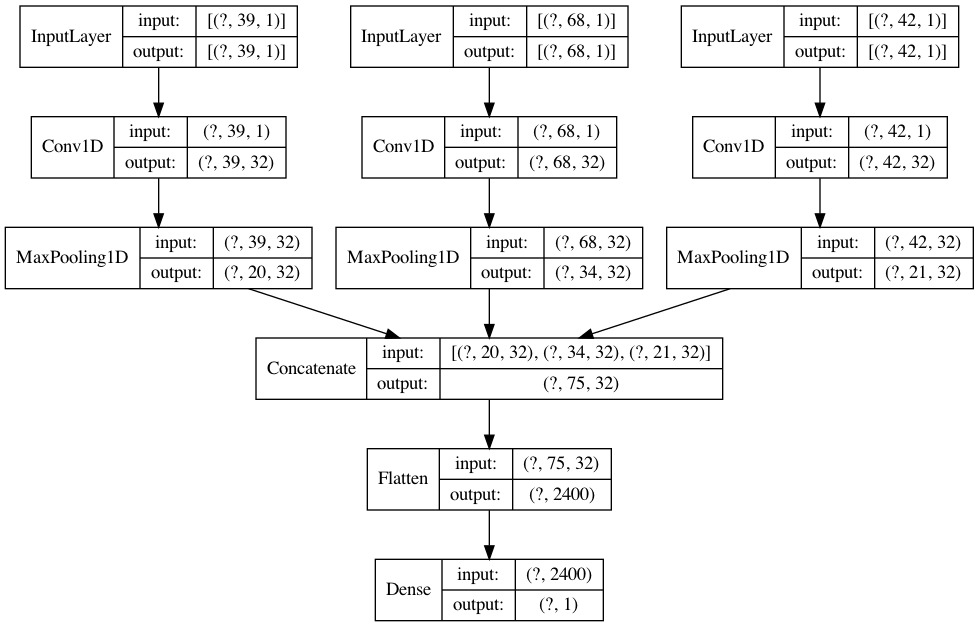

In [11]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model_size_array[0], show_shapes=True, show_layer_names=False)

In [12]:
# 学習ループ
history_size_array = []
for i in range(len(model_size_array)):
    epochs = 1000
    batch_size = 128
    history_size_array.append(model_size_array[i].fit([x_size_train_array1[i], x_size_train_array2[i], x_size_train_array3[i]], y_size_train_array[i], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test_array1[i], x_size_test_array2[i], x_size_test_array3[i]], y_size_test_array[i])))

Epoch 1/1000
1/1 [==============================] - 0s 199ms/step - loss: 11.3201 - acc: 0.0000e+00 - val_loss: 10.9279 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 44ms/step - loss: 11.2361 - acc: 0.0000e+00 - val_loss: 10.8373 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 39ms/step - loss: 11.1388 - acc: 0.0000e+00 - val_loss: 10.7290 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 37ms/step - loss: 11.0234 - acc: 0.0000e+00 - val_loss: 10.6006 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 38ms/step - loss: 10.8875 - acc: 0.0000e+00 - val_loss: 10.4505 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 40ms/step - loss: 10.7295 - acc: 0.0000e+00 - val_loss: 10.2776 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 32ms/step - loss: 10.5482 - acc: 0.0000e+00 - val_loss: 10.0812 - val_acc: 0.0000e+00
Epoch 8/1000

1/1 [==============================] - 0s 34ms/step - loss: 1.7644 - acc: 0.1333 - val_loss: 1.9873 - val_acc: 0.2000
Epoch 63/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7652 - acc: 0.1333 - val_loss: 1.9864 - val_acc: 0.2000
Epoch 64/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7638 - acc: 0.1333 - val_loss: 1.9843 - val_acc: 0.2000
Epoch 65/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7602 - acc: 0.1333 - val_loss: 1.9811 - val_acc: 0.2000
Epoch 66/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7550 - acc: 0.1333 - val_loss: 1.9773 - val_acc: 0.2000
Epoch 67/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7487 - acc: 0.1333 - val_loss: 1.9734 - val_acc: 0.2000
Epoch 68/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7418 - acc: 0.1333 - val_loss: 1.9699 - val_acc: 0.2000
Epoch 69/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7349 - acc: 0.

Epoch 124/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6795 - acc: 0.1333 - val_loss: 1.9497 - val_acc: 0.2000
Epoch 125/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6788 - acc: 0.1333 - val_loss: 1.9490 - val_acc: 0.2000
Epoch 126/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6781 - acc: 0.1333 - val_loss: 1.9484 - val_acc: 0.2000
Epoch 127/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6773 - acc: 0.1333 - val_loss: 1.9477 - val_acc: 0.2000
Epoch 128/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6766 - acc: 0.1333 - val_loss: 1.9471 - val_acc: 0.2000
Epoch 129/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6759 - acc: 0.1333 - val_loss: 1.9465 - val_acc: 0.2000
Epoch 130/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6752 - acc: 0.1333 - val_loss: 1.9459 - val_acc: 0.2000
Epoch 131/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.6335 - acc: 0.1333 - val_loss: 1.9170 - val_acc: 0.2000
Epoch 186/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6327 - acc: 0.1333 - val_loss: 1.9164 - val_acc: 0.2000
Epoch 187/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6320 - acc: 0.1333 - val_loss: 1.9158 - val_acc: 0.2000
Epoch 188/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6312 - acc: 0.1333 - val_loss: 1.9152 - val_acc: 0.2000
Epoch 189/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6305 - acc: 0.1333 - val_loss: 1.9146 - val_acc: 0.2000
Epoch 190/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6297 - acc: 0.1333 - val_loss: 1.9139 - val_acc: 0.2000
Epoch 191/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.6289 - acc: 0.1333 - val_loss: 1.9133 - val_acc: 0.2000
Epoch 192/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6282 - 

Epoch 247/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5894 - acc: 0.1333 - val_loss: 1.8764 - val_acc: 0.2000
Epoch 248/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5888 - acc: 0.1333 - val_loss: 1.8758 - val_acc: 0.2000
Epoch 249/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5881 - acc: 0.1333 - val_loss: 1.8751 - val_acc: 0.2000
Epoch 250/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5874 - acc: 0.1333 - val_loss: 1.8744 - val_acc: 0.2000
Epoch 251/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5868 - acc: 0.1333 - val_loss: 1.8737 - val_acc: 0.2000
Epoch 252/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5861 - acc: 0.1333 - val_loss: 1.8730 - val_acc: 0.2000
Epoch 253/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5855 - acc: 0.1333 - val_loss: 1.8723 - val_acc: 0.2000
Epoch 254/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.5502 - acc: 0.1333 - val_loss: 1.8323 - val_acc: 0.2000
Epoch 309/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5495 - acc: 0.1333 - val_loss: 1.8315 - val_acc: 0.2000
Epoch 310/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5489 - acc: 0.1333 - val_loss: 1.8307 - val_acc: 0.2000
Epoch 311/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5482 - acc: 0.1333 - val_loss: 1.8300 - val_acc: 0.2000
Epoch 312/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5476 - acc: 0.1333 - val_loss: 1.8292 - val_acc: 0.2000
Epoch 313/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5469 - acc: 0.1333 - val_loss: 1.8284 - val_acc: 0.2000
Epoch 314/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5463 - acc: 0.1333 - val_loss: 1.8276 - val_acc: 0.2000
Epoch 315/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5456 - 

Epoch 370/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5061 - acc: 0.1333 - val_loss: 1.7800 - val_acc: 0.2000
Epoch 371/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5053 - acc: 0.1333 - val_loss: 1.7790 - val_acc: 0.2000
Epoch 372/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5045 - acc: 0.1333 - val_loss: 1.7781 - val_acc: 0.2000
Epoch 373/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5037 - acc: 0.1333 - val_loss: 1.7771 - val_acc: 0.2000
Epoch 374/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5029 - acc: 0.1333 - val_loss: 1.7761 - val_acc: 0.2000
Epoch 375/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5021 - acc: 0.1333 - val_loss: 1.7752 - val_acc: 0.2000
Epoch 376/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5013 - acc: 0.1333 - val_loss: 1.7742 - val_acc: 0.2000
Epoch 377/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.4519 - acc: 0.1333 - val_loss: 1.7144 - val_acc: 0.2000
Epoch 432/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4509 - acc: 0.1333 - val_loss: 1.7132 - val_acc: 0.2000
Epoch 433/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4499 - acc: 0.1333 - val_loss: 1.7120 - val_acc: 0.2000
Epoch 434/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4489 - acc: 0.1333 - val_loss: 1.7108 - val_acc: 0.2000
Epoch 435/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4479 - acc: 0.1333 - val_loss: 1.7096 - val_acc: 0.2000
Epoch 436/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4469 - acc: 0.1333 - val_loss: 1.7083 - val_acc: 0.2000
Epoch 437/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4459 - acc: 0.1333 - val_loss: 1.7071 - val_acc: 0.2000
Epoch 438/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4449 - 

Epoch 493/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3843 - acc: 0.1333 - val_loss: 1.6301 - val_acc: 0.2000
Epoch 494/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3832 - acc: 0.1333 - val_loss: 1.6286 - val_acc: 0.2000
Epoch 495/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3820 - acc: 0.1333 - val_loss: 1.6271 - val_acc: 0.2000
Epoch 496/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3808 - acc: 0.1333 - val_loss: 1.6256 - val_acc: 0.2000
Epoch 497/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3796 - acc: 0.1333 - val_loss: 1.6241 - val_acc: 0.2000
Epoch 498/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3784 - acc: 0.1333 - val_loss: 1.6225 - val_acc: 0.2000
Epoch 499/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3772 - acc: 0.1333 - val_loss: 1.6210 - val_acc: 0.2000
Epoch 500/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.3084 - acc: 0.1333 - val_loss: 1.5305 - val_acc: 0.2000
Epoch 555/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3071 - acc: 0.1333 - val_loss: 1.5288 - val_acc: 0.2000
Epoch 556/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3058 - acc: 0.1333 - val_loss: 1.5270 - val_acc: 0.2000
Epoch 557/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3045 - acc: 0.1333 - val_loss: 1.5253 - val_acc: 0.2000
Epoch 558/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3032 - acc: 0.1333 - val_loss: 1.5235 - val_acc: 0.2000
Epoch 559/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3019 - acc: 0.1333 - val_loss: 1.5217 - val_acc: 0.2000
Epoch 560/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.3006 - acc: 0.1333 - val_loss: 1.5200 - val_acc: 0.2000
Epoch 561/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2993 - 

Epoch 616/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2257 - acc: 0.1333 - val_loss: 1.4172 - val_acc: 0.2000
Epoch 617/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2243 - acc: 0.1333 - val_loss: 1.4153 - val_acc: 0.2000
Epoch 618/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.2229 - acc: 0.1333 - val_loss: 1.4134 - val_acc: 0.2000
Epoch 619/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2216 - acc: 0.1333 - val_loss: 1.4115 - val_acc: 0.2000
Epoch 620/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2202 - acc: 0.1333 - val_loss: 1.4096 - val_acc: 0.2000
Epoch 621/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2188 - acc: 0.1333 - val_loss: 1.4077 - val_acc: 0.2000
Epoch 622/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2175 - acc: 0.1333 - val_loss: 1.4058 - val_acc: 0.2000
Epoch 623/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 1.1409 - acc: 0.1333 - val_loss: 1.3022 - val_acc: 0.2000
Epoch 678/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1394 - acc: 0.1333 - val_loss: 1.3003 - val_acc: 0.2000
Epoch 679/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1380 - acc: 0.1333 - val_loss: 1.2985 - val_acc: 0.2000
Epoch 680/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1366 - acc: 0.1333 - val_loss: 1.2966 - val_acc: 0.2000
Epoch 681/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1352 - acc: 0.1333 - val_loss: 1.2948 - val_acc: 0.2000
Epoch 682/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1338 - acc: 0.1333 - val_loss: 1.2929 - val_acc: 0.2000
Epoch 683/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1324 - acc: 0.1333 - val_loss: 1.2910 - val_acc: 0.2000
Epoch 684/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1309 - 

Epoch 739/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0509 - acc: 0.1333 - val_loss: 1.1901 - val_acc: 0.2000
Epoch 740/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0494 - acc: 0.1333 - val_loss: 1.1883 - val_acc: 0.2000
Epoch 741/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0479 - acc: 0.1333 - val_loss: 1.1866 - val_acc: 0.2000
Epoch 742/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0464 - acc: 0.1333 - val_loss: 1.1849 - val_acc: 0.2000
Epoch 743/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.0449 - acc: 0.1333 - val_loss: 1.1831 - val_acc: 0.2000
Epoch 744/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0434 - acc: 0.1333 - val_loss: 1.1814 - val_acc: 0.2000
Epoch 745/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0419 - acc: 0.1333 - val_loss: 1.1797 - val_acc: 0.2000
Epoch 746/1000
1/1 [==============================] - 0s 41ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 0.9569 - acc: 0.1333 - val_loss: 1.0909 - val_acc: 0.2000
Epoch 801/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9553 - acc: 0.1333 - val_loss: 1.0894 - val_acc: 0.2000
Epoch 802/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9537 - acc: 0.1333 - val_loss: 1.0879 - val_acc: 0.2000
Epoch 803/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9521 - acc: 0.1333 - val_loss: 1.0864 - val_acc: 0.2000
Epoch 804/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9505 - acc: 0.1333 - val_loss: 1.0849 - val_acc: 0.2000
Epoch 805/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.9490 - acc: 0.1333 - val_loss: 1.0835 - val_acc: 0.2000
Epoch 806/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9474 - acc: 0.1333 - val_loss: 1.0820 - val_acc: 0.2000
Epoch 807/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9458 - 

Epoch 862/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.8567 - acc: 0.1333 - val_loss: 1.0079 - val_acc: 0.2000
Epoch 863/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8551 - acc: 0.1333 - val_loss: 1.0068 - val_acc: 0.2000
Epoch 864/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8534 - acc: 0.1333 - val_loss: 1.0056 - val_acc: 0.2000
Epoch 865/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8518 - acc: 0.1333 - val_loss: 1.0045 - val_acc: 0.2000
Epoch 866/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8501 - acc: 0.1333 - val_loss: 1.0033 - val_acc: 0.2000
Epoch 867/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8485 - acc: 0.1333 - val_loss: 1.0022 - val_acc: 0.2000
Epoch 868/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.8469 - acc: 0.1333 - val_loss: 1.0011 - val_acc: 0.2000
Epoch 869/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.7567 - acc: 0.1333 - val_loss: 0.9477 - val_acc: 0.2000
Epoch 924/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7551 - acc: 0.1333 - val_loss: 0.9469 - val_acc: 0.2000
Epoch 925/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7535 - acc: 0.1333 - val_loss: 0.9461 - val_acc: 0.2000
Epoch 926/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7518 - acc: 0.1333 - val_loss: 0.9453 - val_acc: 0.2000
Epoch 927/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7502 - acc: 0.1333 - val_loss: 0.9446 - val_acc: 0.2000
Epoch 928/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7486 - acc: 0.1333 - val_loss: 0.9438 - val_acc: 0.2000
Epoch 929/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.7470 - acc: 0.1333 - val_loss: 0.9430 - val_acc: 0.2000
Epoch 930/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7454 - 

Epoch 985/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6599 - acc: 0.1333 - val_loss: 0.9112 - val_acc: 0.2000
Epoch 986/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6584 - acc: 0.1333 - val_loss: 0.9109 - val_acc: 0.2000
Epoch 987/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6569 - acc: 0.1333 - val_loss: 0.9105 - val_acc: 0.2000
Epoch 988/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6554 - acc: 0.1333 - val_loss: 0.9102 - val_acc: 0.2000
Epoch 989/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6539 - acc: 0.1333 - val_loss: 0.9098 - val_acc: 0.2000
Epoch 990/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6524 - acc: 0.1333 - val_loss: 0.9095 - val_acc: 0.2000
Epoch 991/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6509 - acc: 0.1333 - val_loss: 0.9092 - val_acc: 0.2000
Epoch 992/1000
1/1 [==============================] - 0s 27ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.6645 - acc: 0.2111 - val_loss: 2.1842 - val_acc: 0.3000
Epoch 47/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6302 - acc: 0.2111 - val_loss: 2.1635 - val_acc: 0.3000
Epoch 48/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6039 - acc: 0.2111 - val_loss: 2.1509 - val_acc: 0.3000
Epoch 49/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5860 - acc: 0.2111 - val_loss: 2.1458 - val_acc: 0.3000
Epoch 50/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5758 - acc: 0.2111 - val_loss: 2.1470 - val_acc: 0.3000
Epoch 51/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5721 - acc: 0.2111 - val_loss: 2.1527 - val_acc: 0.3000
Epoch 52/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5736 - acc: 0.2111 - val_loss: 2.1613 - val_acc: 0.3000
Epoch 53/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5785 - acc: 0.

Epoch 108/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5076 - acc: 0.2111 - val_loss: 2.0915 - val_acc: 0.3000
Epoch 109/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5063 - acc: 0.2111 - val_loss: 2.0903 - val_acc: 0.3000
Epoch 110/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5049 - acc: 0.2111 - val_loss: 2.0891 - val_acc: 0.3000
Epoch 111/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5035 - acc: 0.2111 - val_loss: 2.0879 - val_acc: 0.3000
Epoch 112/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5020 - acc: 0.2111 - val_loss: 2.0867 - val_acc: 0.3000
Epoch 113/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5006 - acc: 0.2111 - val_loss: 2.0855 - val_acc: 0.3000
Epoch 114/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4991 - acc: 0.2111 - val_loss: 2.0844 - val_acc: 0.3000
Epoch 115/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.4042 - acc: 0.2111 - val_loss: 2.0102 - val_acc: 0.3000
Epoch 170/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4022 - acc: 0.2111 - val_loss: 2.0087 - val_acc: 0.3000
Epoch 171/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4003 - acc: 0.2111 - val_loss: 2.0072 - val_acc: 0.3000
Epoch 172/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3983 - acc: 0.2111 - val_loss: 2.0057 - val_acc: 0.3000
Epoch 173/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3964 - acc: 0.2111 - val_loss: 2.0042 - val_acc: 0.3000
Epoch 174/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.3944 - acc: 0.2111 - val_loss: 2.0027 - val_acc: 0.3000
Epoch 175/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3925 - acc: 0.2111 - val_loss: 2.0012 - val_acc: 0.3000
Epoch 176/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3905 - 

Epoch 231/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2823 - acc: 0.2111 - val_loss: 1.9183 - val_acc: 0.3000
Epoch 232/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2804 - acc: 0.2111 - val_loss: 1.9169 - val_acc: 0.3000
Epoch 233/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2785 - acc: 0.2111 - val_loss: 1.9156 - val_acc: 0.3000
Epoch 234/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2767 - acc: 0.2111 - val_loss: 1.9142 - val_acc: 0.3000
Epoch 235/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2749 - acc: 0.2111 - val_loss: 1.9129 - val_acc: 0.3000
Epoch 236/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2730 - acc: 0.2111 - val_loss: 1.9116 - val_acc: 0.3000
Epoch 237/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2712 - acc: 0.2111 - val_loss: 1.9102 - val_acc: 0.3000
Epoch 238/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.1851 - acc: 0.2111 - val_loss: 1.8498 - val_acc: 0.3000
Epoch 293/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1838 - acc: 0.2111 - val_loss: 1.8490 - val_acc: 0.3000
Epoch 294/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1826 - acc: 0.2111 - val_loss: 1.8481 - val_acc: 0.3000
Epoch 295/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1813 - acc: 0.2111 - val_loss: 1.8473 - val_acc: 0.3000
Epoch 296/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1800 - acc: 0.2111 - val_loss: 1.8464 - val_acc: 0.3000
Epoch 297/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1788 - acc: 0.2111 - val_loss: 1.8456 - val_acc: 0.3000
Epoch 298/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1776 - acc: 0.2111 - val_loss: 1.8448 - val_acc: 0.3000
Epoch 299/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1763 - 

Epoch 354/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1214 - acc: 0.2111 - val_loss: 1.8099 - val_acc: 0.3000
Epoch 355/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1206 - acc: 0.2111 - val_loss: 1.8095 - val_acc: 0.3000
Epoch 356/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1198 - acc: 0.2111 - val_loss: 1.8090 - val_acc: 0.3000
Epoch 357/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1190 - acc: 0.2111 - val_loss: 1.8086 - val_acc: 0.3000
Epoch 358/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1182 - acc: 0.2111 - val_loss: 1.8081 - val_acc: 0.3000
Epoch 359/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1174 - acc: 0.2111 - val_loss: 1.8077 - val_acc: 0.3000
Epoch 360/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1166 - acc: 0.2111 - val_loss: 1.8072 - val_acc: 0.3000
Epoch 361/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 1.0805 - acc: 0.2111 - val_loss: 1.7885 - val_acc: 0.3000
Epoch 416/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0799 - acc: 0.2111 - val_loss: 1.7882 - val_acc: 0.3000
Epoch 417/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0794 - acc: 0.2111 - val_loss: 1.7880 - val_acc: 0.3000
Epoch 418/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0788 - acc: 0.2111 - val_loss: 1.7877 - val_acc: 0.3000
Epoch 419/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0783 - acc: 0.2111 - val_loss: 1.7875 - val_acc: 0.3000
Epoch 420/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0777 - acc: 0.2111 - val_loss: 1.7872 - val_acc: 0.3000
Epoch 421/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.0772 - acc: 0.2111 - val_loss: 1.7869 - val_acc: 0.3000
Epoch 422/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0766 - 

Epoch 477/1000
1/1 [==============================] - 0s 72ms/step - loss: 1.0496 - acc: 0.2111 - val_loss: 1.7742 - val_acc: 0.3000
Epoch 478/1000
1/1 [==============================] - 0s 118ms/step - loss: 1.0491 - acc: 0.2111 - val_loss: 1.7740 - val_acc: 0.3000
Epoch 479/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.0487 - acc: 0.2111 - val_loss: 1.7738 - val_acc: 0.3000
Epoch 480/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.0482 - acc: 0.2111 - val_loss: 1.7736 - val_acc: 0.3000
Epoch 481/1000
1/1 [==============================] - 0s 73ms/step - loss: 1.0478 - acc: 0.2111 - val_loss: 1.7734 - val_acc: 0.3000
Epoch 482/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.0473 - acc: 0.2111 - val_loss: 1.7732 - val_acc: 0.3000
Epoch 483/1000
1/1 [==============================] - 0s 77ms/step - loss: 1.0469 - acc: 0.2111 - val_loss: 1.7730 - val_acc: 0.3000
Epoch 484/1000
1/1 [==============================] - 0s 74ms/step -

1/1 [==============================] - 0s 37ms/step - loss: 1.0226 - acc: 0.2111 - val_loss: 1.7623 - val_acc: 0.3000
Epoch 539/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0222 - acc: 0.2111 - val_loss: 1.7621 - val_acc: 0.3000
Epoch 540/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0217 - acc: 0.2111 - val_loss: 1.7619 - val_acc: 0.3000
Epoch 541/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0213 - acc: 0.2111 - val_loss: 1.7617 - val_acc: 0.3000
Epoch 542/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0209 - acc: 0.2111 - val_loss: 1.7615 - val_acc: 0.3000
Epoch 543/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0204 - acc: 0.2111 - val_loss: 1.7613 - val_acc: 0.3000
Epoch 544/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0200 - acc: 0.2111 - val_loss: 1.7611 - val_acc: 0.3000
Epoch 545/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0195 - 

Epoch 600/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9947 - acc: 0.2111 - val_loss: 1.7513 - val_acc: 0.3000
Epoch 601/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9942 - acc: 0.2111 - val_loss: 1.7511 - val_acc: 0.3000
Epoch 602/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9937 - acc: 0.2111 - val_loss: 1.7510 - val_acc: 0.3000
Epoch 603/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9933 - acc: 0.2111 - val_loss: 1.7508 - val_acc: 0.3000
Epoch 604/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9928 - acc: 0.2111 - val_loss: 1.7506 - val_acc: 0.3000
Epoch 605/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9923 - acc: 0.2111 - val_loss: 1.7505 - val_acc: 0.3000
Epoch 606/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9919 - acc: 0.2111 - val_loss: 1.7503 - val_acc: 0.3000
Epoch 607/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 0.9653 - acc: 0.2111 - val_loss: 1.7415 - val_acc: 0.3000
Epoch 662/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9648 - acc: 0.2111 - val_loss: 1.7413 - val_acc: 0.3000
Epoch 663/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9643 - acc: 0.2111 - val_loss: 1.7412 - val_acc: 0.3000
Epoch 664/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9638 - acc: 0.2111 - val_loss: 1.7410 - val_acc: 0.3000
Epoch 665/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.9633 - acc: 0.2111 - val_loss: 1.7409 - val_acc: 0.3000
Epoch 666/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9628 - acc: 0.2111 - val_loss: 1.7407 - val_acc: 0.3000
Epoch 667/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9623 - acc: 0.2111 - val_loss: 1.7406 - val_acc: 0.3000
Epoch 668/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9618 - 

Epoch 723/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9330 - acc: 0.2111 - val_loss: 1.7322 - val_acc: 0.3000
Epoch 724/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9325 - acc: 0.2111 - val_loss: 1.7320 - val_acc: 0.3000
Epoch 725/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9319 - acc: 0.2111 - val_loss: 1.7319 - val_acc: 0.3000
Epoch 726/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9314 - acc: 0.2111 - val_loss: 1.7317 - val_acc: 0.3000
Epoch 727/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9309 - acc: 0.2111 - val_loss: 1.7316 - val_acc: 0.3000
Epoch 728/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.9303 - acc: 0.2111 - val_loss: 1.7314 - val_acc: 0.3000
Epoch 729/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9298 - acc: 0.2111 - val_loss: 1.7313 - val_acc: 0.3000
Epoch 730/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 82ms/step - loss: 0.8991 - acc: 0.2111 - val_loss: 1.7233 - val_acc: 0.3000
Epoch 785/1000
1/1 [==============================] - 0s 118ms/step - loss: 0.8985 - acc: 0.2111 - val_loss: 1.7232 - val_acc: 0.3000
Epoch 786/1000
1/1 [==============================] - 0s 81ms/step - loss: 0.8980 - acc: 0.2111 - val_loss: 1.7230 - val_acc: 0.3000
Epoch 787/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.8974 - acc: 0.2111 - val_loss: 1.7229 - val_acc: 0.3000
Epoch 788/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.8968 - acc: 0.2111 - val_loss: 1.7227 - val_acc: 0.3000
Epoch 789/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.8962 - acc: 0.2111 - val_loss: 1.7226 - val_acc: 0.3000
Epoch 790/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.8957 - acc: 0.2111 - val_loss: 1.7224 - val_acc: 0.3000
Epoch 791/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.8951 -

1/1 [==============================] - 0s 48ms/step - loss: 0.8634 - acc: 0.2111 - val_loss: 1.7142 - val_acc: 0.3000
Epoch 846/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8628 - acc: 0.2111 - val_loss: 1.7141 - val_acc: 0.3000
Epoch 847/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8622 - acc: 0.2111 - val_loss: 1.7139 - val_acc: 0.3000
Epoch 848/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8616 - acc: 0.2111 - val_loss: 1.7138 - val_acc: 0.3000
Epoch 849/1000
1/1 [==============================] - ETA: 0s - loss: 0.8611 - acc: 0.211 - 0s 40ms/step - loss: 0.8611 - acc: 0.2111 - val_loss: 1.7136 - val_acc: 0.3000
Epoch 850/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8605 - acc: 0.2111 - val_loss: 1.7135 - val_acc: 0.3000
Epoch 851/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8599 - acc: 0.2111 - val_loss: 1.7133 - val_acc: 0.3000
Epoch 852/1000
1/1 [==========================

1/1 [==============================] - 0s 49ms/step - loss: 0.8268 - acc: 0.2111 - val_loss: 1.7047 - val_acc: 0.3000
Epoch 907/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8262 - acc: 0.2111 - val_loss: 1.7045 - val_acc: 0.3000
Epoch 908/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8256 - acc: 0.2111 - val_loss: 1.7044 - val_acc: 0.3000
Epoch 909/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8250 - acc: 0.2111 - val_loss: 1.7042 - val_acc: 0.3000
Epoch 910/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8244 - acc: 0.2111 - val_loss: 1.7041 - val_acc: 0.3000
Epoch 911/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8238 - acc: 0.2111 - val_loss: 1.7039 - val_acc: 0.3000
Epoch 912/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8232 - acc: 0.2111 - val_loss: 1.7037 - val_acc: 0.3000
Epoch 913/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.8226 - 

1/1 [==============================] - 0s 38ms/step - loss: 0.7898 - acc: 0.2111 - val_loss: 1.6943 - val_acc: 0.3000
Epoch 968/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7892 - acc: 0.2111 - val_loss: 1.6941 - val_acc: 0.3000
Epoch 969/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7886 - acc: 0.2111 - val_loss: 1.6940 - val_acc: 0.3000
Epoch 970/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7879 - acc: 0.2111 - val_loss: 1.6938 - val_acc: 0.3000
Epoch 971/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7873 - acc: 0.2111 - val_loss: 1.6936 - val_acc: 0.3000
Epoch 972/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7867 - acc: 0.2111 - val_loss: 1.6934 - val_acc: 0.3000
Epoch 973/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7861 - acc: 0.2111 - val_loss: 1.6933 - val_acc: 0.3000
Epoch 974/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7855 - 

2/2 [==============================] - 0s 19ms/step - loss: 1.8289 - acc: 0.2222 - val_loss: 2.2751 - val_acc: 0.2667
Epoch 29/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.8372 - acc: 0.2222 - val_loss: 2.3107 - val_acc: 0.2667
Epoch 30/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.8447 - acc: 0.2222 - val_loss: 2.3331 - val_acc: 0.2667
Epoch 31/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.8521 - acc: 0.2222 - val_loss: 2.3498 - val_acc: 0.2667
Epoch 32/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.8579 - acc: 0.2222 - val_loss: 2.3647 - val_acc: 0.2667
Epoch 33/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.8643 - acc: 0.2222 - val_loss: 2.3659 - val_acc: 0.2667
Epoch 34/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.8646 - acc: 0.2222 - val_loss: 2.3580 - val_acc: 0.2667
Epoch 35/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.8605 - acc: 0.

2/2 [==============================] - 0s 19ms/step - loss: 1.7388 - acc: 0.2222 - val_loss: 2.1078 - val_acc: 0.2667
Epoch 91/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.7380 - acc: 0.2222 - val_loss: 2.1209 - val_acc: 0.2667
Epoch 92/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.7410 - acc: 0.2222 - val_loss: 2.1229 - val_acc: 0.2667
Epoch 93/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.7394 - acc: 0.2222 - val_loss: 2.1120 - val_acc: 0.2667
Epoch 94/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.7349 - acc: 0.2222 - val_loss: 2.0944 - val_acc: 0.2667
Epoch 95/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.7278 - acc: 0.2222 - val_loss: 2.0558 - val_acc: 0.2667
Epoch 96/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.7260 - acc: 0.2222 - val_loss: 2.0248 - val_acc: 0.2667
Epoch 97/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.7285 - acc: 0.

Epoch 152/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.5765 - acc: 0.2222 - val_loss: 1.8607 - val_acc: 0.2667
Epoch 153/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.5730 - acc: 0.2222 - val_loss: 1.8565 - val_acc: 0.2667
Epoch 154/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.5697 - acc: 0.2222 - val_loss: 1.8579 - val_acc: 0.2667
Epoch 155/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5684 - acc: 0.2222 - val_loss: 1.8591 - val_acc: 0.2667
Epoch 156/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.5670 - acc: 0.2222 - val_loss: 1.8532 - val_acc: 0.2667
Epoch 157/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.5640 - acc: 0.2222 - val_loss: 1.8499 - val_acc: 0.2667
Epoch 158/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.5610 - acc: 0.2222 - val_loss: 1.8475 - val_acc: 0.2667
Epoch 159/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 17ms/step - loss: 1.3967 - acc: 0.2222 - val_loss: 1.5549 - val_acc: 0.2667
Epoch 214/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.3996 - acc: 0.2222 - val_loss: 1.5481 - val_acc: 0.2667
Epoch 215/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.3906 - acc: 0.2222 - val_loss: 1.5375 - val_acc: 0.2667
Epoch 216/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.3743 - acc: 0.2222 - val_loss: 1.5343 - val_acc: 0.2667
Epoch 217/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.3635 - acc: 0.2222 - val_loss: 1.5428 - val_acc: 0.2667
Epoch 218/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.3652 - acc: 0.2222 - val_loss: 1.5586 - val_acc: 0.2667
Epoch 219/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.3767 - acc: 0.2222 - val_loss: 1.5680 - val_acc: 0.2667
Epoch 220/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.3836 - 

Epoch 275/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.2531 - acc: 0.2222 - val_loss: 1.3868 - val_acc: 0.2667
Epoch 276/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.2586 - acc: 0.2222 - val_loss: 1.3881 - val_acc: 0.2667
Epoch 277/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.2636 - acc: 0.2222 - val_loss: 1.3860 - val_acc: 0.2667
Epoch 278/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.2612 - acc: 0.2222 - val_loss: 1.3825 - val_acc: 0.2667
Epoch 279/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.2551 - acc: 0.2222 - val_loss: 1.3796 - val_acc: 0.2667
Epoch 280/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.2447 - acc: 0.2222 - val_loss: 1.3894 - val_acc: 0.2667
Epoch 281/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.2437 - acc: 0.2222 - val_loss: 1.4322 - val_acc: 0.2667
Epoch 282/1000
2/2 [==============================] - 0s 23ms/step - 

2/2 [==============================] - 0s 26ms/step - loss: 1.1999 - acc: 0.2222 - val_loss: 1.3302 - val_acc: 0.2667
Epoch 337/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.2069 - acc: 0.2222 - val_loss: 1.3287 - val_acc: 0.2667
Epoch 338/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.2127 - acc: 0.2222 - val_loss: 1.3278 - val_acc: 0.2667
Epoch 339/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.2110 - acc: 0.2222 - val_loss: 1.3277 - val_acc: 0.2667
Epoch 340/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.2037 - acc: 0.2222 - val_loss: 1.3322 - val_acc: 0.2667
Epoch 341/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1950 - acc: 0.2222 - val_loss: 1.3472 - val_acc: 0.2667
Epoch 342/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1924 - acc: 0.2222 - val_loss: 1.3726 - val_acc: 0.2667
Epoch 343/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.1991 - 

Epoch 398/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.1797 - acc: 0.2222 - val_loss: 1.2941 - val_acc: 0.2667
Epoch 399/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.1864 - acc: 0.2222 - val_loss: 1.2940 - val_acc: 0.2667
Epoch 400/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.1824 - acc: 0.2222 - val_loss: 1.2961 - val_acc: 0.2667
Epoch 401/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.1702 - acc: 0.2222 - val_loss: 1.3070 - val_acc: 0.2667
Epoch 402/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.1546 - acc: 0.2222 - val_loss: 1.3419 - val_acc: 0.2667
Epoch 403/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.1522 - acc: 0.2222 - val_loss: 1.3876 - val_acc: 0.2667
Epoch 404/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.1614 - acc: 0.2222 - val_loss: 1.4199 - val_acc: 0.2667
Epoch 405/1000
2/2 [==============================] - 0s 32ms/step - 

2/2 [==============================] - 0s 25ms/step - loss: 1.1095 - acc: 0.2222 - val_loss: 1.2904 - val_acc: 0.2667
Epoch 460/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.1107 - acc: 0.2222 - val_loss: 1.2871 - val_acc: 0.2667
Epoch 461/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.1102 - acc: 0.2222 - val_loss: 1.2899 - val_acc: 0.2667
Epoch 462/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1085 - acc: 0.2222 - val_loss: 1.3014 - val_acc: 0.2667
Epoch 463/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.1057 - acc: 0.2222 - val_loss: 1.3283 - val_acc: 0.2667
Epoch 464/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1068 - acc: 0.2222 - val_loss: 1.3544 - val_acc: 0.2667
Epoch 465/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1108 - acc: 0.2222 - val_loss: 1.3828 - val_acc: 0.2667
Epoch 466/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.1193 - 

Epoch 521/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0884 - acc: 0.2222 - val_loss: 1.2111 - val_acc: 0.2667
Epoch 522/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.0796 - acc: 0.2222 - val_loss: 1.2250 - val_acc: 0.2667
Epoch 523/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.0667 - acc: 0.2222 - val_loss: 1.2579 - val_acc: 0.2667
Epoch 524/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.0570 - acc: 0.2222 - val_loss: 1.3130 - val_acc: 0.2667
Epoch 525/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.0622 - acc: 0.2222 - val_loss: 1.3868 - val_acc: 0.2667
Epoch 526/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.0872 - acc: 0.2222 - val_loss: 1.4342 - val_acc: 0.2667
Epoch 527/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.1039 - acc: 0.2222 - val_loss: 1.4105 - val_acc: 0.2667
Epoch 528/1000
2/2 [==============================] - 0s 26ms/step - 

2/2 [==============================] - 0s 21ms/step - loss: 1.0109 - acc: 0.2222 - val_loss: 1.3307 - val_acc: 0.2667
Epoch 583/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.0220 - acc: 0.2222 - val_loss: 1.3695 - val_acc: 0.2667
Epoch 584/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.0329 - acc: 0.2222 - val_loss: 1.3808 - val_acc: 0.2667
Epoch 585/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.0365 - acc: 0.2222 - val_loss: 1.3569 - val_acc: 0.2667
Epoch 586/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.0289 - acc: 0.2222 - val_loss: 1.3227 - val_acc: 0.2667
Epoch 587/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.0182 - acc: 0.2222 - val_loss: 1.3121 - val_acc: 0.2667
Epoch 588/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0144 - acc: 0.2222 - val_loss: 1.2944 - val_acc: 0.2667
Epoch 589/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.0092 - 

Epoch 644/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.9703 - acc: 0.2222 - val_loss: 1.1963 - val_acc: 0.2667
Epoch 645/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.9565 - acc: 0.2222 - val_loss: 1.2642 - val_acc: 0.2667
Epoch 646/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.9544 - acc: 0.2222 - val_loss: 1.3342 - val_acc: 0.2667
Epoch 647/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.9663 - acc: 0.2222 - val_loss: 1.3815 - val_acc: 0.2667
Epoch 648/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9788 - acc: 0.2222 - val_loss: 1.3969 - val_acc: 0.2667
Epoch 649/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9831 - acc: 0.2222 - val_loss: 1.4070 - val_acc: 0.2667
Epoch 650/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9853 - acc: 0.2222 - val_loss: 1.4300 - val_acc: 0.2667
Epoch 651/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 16ms/step - loss: 0.8985 - acc: 0.2222 - val_loss: 1.1286 - val_acc: 0.2667
Epoch 706/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.8974 - acc: 0.2222 - val_loss: 1.1373 - val_acc: 0.2667
Epoch 707/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8947 - acc: 0.2222 - val_loss: 1.1482 - val_acc: 0.2667
Epoch 708/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.8916 - acc: 0.2222 - val_loss: 1.1482 - val_acc: 0.2667
Epoch 709/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.8903 - acc: 0.2222 - val_loss: 1.1436 - val_acc: 0.2667
Epoch 710/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8896 - acc: 0.2222 - val_loss: 1.1441 - val_acc: 0.2667
Epoch 711/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8883 - acc: 0.2222 - val_loss: 1.1532 - val_acc: 0.2667
Epoch 712/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.8861 - 

Epoch 767/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8457 - acc: 0.2222 - val_loss: 1.1382 - val_acc: 0.2667
Epoch 768/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.8351 - acc: 0.2222 - val_loss: 1.0994 - val_acc: 0.2667
Epoch 769/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.8370 - acc: 0.2222 - val_loss: 1.0887 - val_acc: 0.2667
Epoch 770/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.8360 - acc: 0.2222 - val_loss: 1.1033 - val_acc: 0.2667
Epoch 771/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.8334 - acc: 0.2222 - val_loss: 1.1221 - val_acc: 0.2667
Epoch 772/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.8316 - acc: 0.2222 - val_loss: 1.1390 - val_acc: 0.2667
Epoch 773/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.8315 - acc: 0.2222 - val_loss: 1.1408 - val_acc: 0.2667
Epoch 774/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 19ms/step - loss: 0.7838 - acc: 0.2222 - val_loss: 1.0821 - val_acc: 0.2667
Epoch 829/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.7803 - acc: 0.2222 - val_loss: 1.0259 - val_acc: 0.2667
Epoch 830/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.7906 - acc: 0.2222 - val_loss: 0.9928 - val_acc: 0.2667
Epoch 831/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8034 - acc: 0.2222 - val_loss: 0.9906 - val_acc: 0.2667
Epoch 832/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8025 - acc: 0.2222 - val_loss: 1.0073 - val_acc: 0.2667
Epoch 833/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7931 - acc: 0.2222 - val_loss: 1.0240 - val_acc: 0.2667
Epoch 834/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.7853 - acc: 0.2222 - val_loss: 1.0465 - val_acc: 0.2667
Epoch 835/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.7798 - 

Epoch 890/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.7271 - acc: 0.2222 - val_loss: 1.0320 - val_acc: 0.2667
Epoch 891/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.7308 - acc: 0.2222 - val_loss: 1.0008 - val_acc: 0.2667
Epoch 892/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.7411 - acc: 0.2222 - val_loss: 0.9873 - val_acc: 0.2667
Epoch 893/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7459 - acc: 0.2222 - val_loss: 0.9998 - val_acc: 0.2667
Epoch 894/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.7404 - acc: 0.2222 - val_loss: 1.0238 - val_acc: 0.2667
Epoch 895/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.7317 - acc: 0.2222 - val_loss: 1.0541 - val_acc: 0.2667
Epoch 896/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.7247 - acc: 0.2222 - val_loss: 1.0935 - val_acc: 0.2667
Epoch 897/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 19ms/step - loss: 0.6799 - acc: 0.2222 - val_loss: 1.0686 - val_acc: 0.2667
Epoch 952/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.6770 - acc: 0.2222 - val_loss: 1.0745 - val_acc: 0.2667
Epoch 953/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6763 - acc: 0.2222 - val_loss: 1.0683 - val_acc: 0.2667
Epoch 954/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.6761 - acc: 0.2222 - val_loss: 1.0660 - val_acc: 0.2667
Epoch 955/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6748 - acc: 0.2222 - val_loss: 1.0896 - val_acc: 0.2667
Epoch 956/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6736 - acc: 0.2222 - val_loss: 1.1182 - val_acc: 0.2667
Epoch 957/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6738 - acc: 0.2222 - val_loss: 1.1389 - val_acc: 0.2667
Epoch 958/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6746 - 

2/2 [==============================] - 0s 21ms/step - loss: 4.3239 - acc: 0.2333 - val_loss: 2.0442 - val_acc: 0.2000
Epoch 13/1000
2/2 [==============================] - 0s 20ms/step - loss: 3.5844 - acc: 0.2333 - val_loss: 1.6051 - val_acc: 0.2000
Epoch 14/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.9459 - acc: 0.2333 - val_loss: 1.3261 - val_acc: 0.2000
Epoch 15/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.4629 - acc: 0.2333 - val_loss: 1.2335 - val_acc: 0.2000
Epoch 16/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.2026 - acc: 0.2333 - val_loss: 1.3217 - val_acc: 0.2000
Epoch 17/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.0376 - acc: 0.2333 - val_loss: 1.5360 - val_acc: 0.2000
Epoch 18/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.0850 - acc: 0.2333 - val_loss: 1.8039 - val_acc: 0.2000
Epoch 19/1000
2/2 [==============================] - 0s 19ms/step - loss: 2.2154 - acc: 0.

2/2 [==============================] - 0s 28ms/step - loss: 1.9360 - acc: 0.2333 - val_loss: 1.2940 - val_acc: 0.2000
Epoch 75/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.9347 - acc: 0.2333 - val_loss: 1.2879 - val_acc: 0.2000
Epoch 76/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.9332 - acc: 0.2333 - val_loss: 1.2878 - val_acc: 0.2000
Epoch 77/1000
2/2 [==============================] - 0s 30ms/step - loss: 1.9303 - acc: 0.2333 - val_loss: 1.2949 - val_acc: 0.2000
Epoch 78/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.9253 - acc: 0.2333 - val_loss: 1.3010 - val_acc: 0.2000
Epoch 79/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.9215 - acc: 0.2333 - val_loss: 1.3065 - val_acc: 0.2000
Epoch 80/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.9171 - acc: 0.2333 - val_loss: 1.3118 - val_acc: 0.2000
Epoch 81/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.9136 - acc: 0.

Epoch 136/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.6753 - acc: 0.2333 - val_loss: 1.2221 - val_acc: 0.2000
Epoch 137/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.6681 - acc: 0.2333 - val_loss: 1.2256 - val_acc: 0.2000
Epoch 138/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.6625 - acc: 0.2333 - val_loss: 1.2316 - val_acc: 0.2000
Epoch 139/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.6582 - acc: 0.2333 - val_loss: 1.2399 - val_acc: 0.2000
Epoch 140/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.6534 - acc: 0.2333 - val_loss: 1.2546 - val_acc: 0.2000
Epoch 141/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.6547 - acc: 0.2333 - val_loss: 1.2608 - val_acc: 0.2000
Epoch 142/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.6465 - acc: 0.2333 - val_loss: 1.2403 - val_acc: 0.2000
Epoch 143/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 21ms/step - loss: 1.3936 - acc: 0.2333 - val_loss: 1.0927 - val_acc: 0.2000
Epoch 198/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.3894 - acc: 0.2333 - val_loss: 1.0896 - val_acc: 0.2000
Epoch 199/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.3857 - acc: 0.2333 - val_loss: 1.0832 - val_acc: 0.2000
Epoch 200/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.3828 - acc: 0.2333 - val_loss: 1.0797 - val_acc: 0.2000
Epoch 201/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.3804 - acc: 0.2333 - val_loss: 1.0763 - val_acc: 0.2000
Epoch 202/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.3767 - acc: 0.2333 - val_loss: 1.0799 - val_acc: 0.2000
Epoch 203/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.3734 - acc: 0.2333 - val_loss: 1.0855 - val_acc: 0.2000
Epoch 204/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.3702 - 

2/2 [==============================] - 0s 29ms/step - loss: 1.2448 - acc: 0.2333 - val_loss: 1.0186 - val_acc: 0.2000
Epoch 259/1000
2/2 [==============================] - 0s 61ms/step - loss: 1.2426 - acc: 0.2333 - val_loss: 1.0173 - val_acc: 0.2000
Epoch 260/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.2404 - acc: 0.2333 - val_loss: 1.0216 - val_acc: 0.2000
Epoch 261/1000
2/2 [==============================] - 0s 28ms/step - loss: 1.2371 - acc: 0.2333 - val_loss: 1.0317 - val_acc: 0.2000
Epoch 262/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.2360 - acc: 0.2333 - val_loss: 1.0477 - val_acc: 0.2000
Epoch 263/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.2370 - acc: 0.2333 - val_loss: 1.0549 - val_acc: 0.2000
Epoch 264/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.2368 - acc: 0.2333 - val_loss: 1.0478 - val_acc: 0.2000
Epoch 265/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.2321 - 

2/2 [==============================] - 0s 18ms/step - loss: 1.1341 - acc: 0.2333 - val_loss: 0.9863 - val_acc: 0.2000
Epoch 320/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1318 - acc: 0.2333 - val_loss: 0.9946 - val_acc: 0.2000
Epoch 321/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.1310 - acc: 0.2333 - val_loss: 1.0019 - val_acc: 0.2000
Epoch 322/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1319 - acc: 0.2333 - val_loss: 1.0016 - val_acc: 0.2000
Epoch 323/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1295 - acc: 0.2333 - val_loss: 0.9916 - val_acc: 0.2000
Epoch 324/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1258 - acc: 0.2333 - val_loss: 0.9842 - val_acc: 0.2000
Epoch 325/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1233 - acc: 0.2333 - val_loss: 0.9790 - val_acc: 0.2000
Epoch 326/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.1218 - 

Epoch 381/1000
2/2 [==============================] - 0s 32ms/step - loss: 1.0256 - acc: 0.2333 - val_loss: 0.9499 - val_acc: 0.2000
Epoch 382/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.0199 - acc: 0.2333 - val_loss: 0.9343 - val_acc: 0.2000
Epoch 383/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.0193 - acc: 0.2333 - val_loss: 0.9239 - val_acc: 0.2000
Epoch 384/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.0226 - acc: 0.2333 - val_loss: 0.9214 - val_acc: 0.2000
Epoch 385/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.0203 - acc: 0.2333 - val_loss: 0.9250 - val_acc: 0.2000
Epoch 386/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.0143 - acc: 0.2333 - val_loss: 0.9356 - val_acc: 0.2000
Epoch 387/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.0133 - acc: 0.2333 - val_loss: 0.9485 - val_acc: 0.2000
Epoch 388/1000
2/2 [==============================] - 0s 28ms/step - 

2/2 [==============================] - 0s 26ms/step - loss: 0.9248 - acc: 0.2333 - val_loss: 0.9013 - val_acc: 0.2000
Epoch 443/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.9209 - acc: 0.2333 - val_loss: 0.8862 - val_acc: 0.2000
Epoch 444/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.9183 - acc: 0.2333 - val_loss: 0.8803 - val_acc: 0.2000
Epoch 445/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.9194 - acc: 0.2333 - val_loss: 0.8781 - val_acc: 0.2000
Epoch 446/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.9192 - acc: 0.2333 - val_loss: 0.8767 - val_acc: 0.2000
Epoch 447/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.9193 - acc: 0.2333 - val_loss: 0.8771 - val_acc: 0.2000
Epoch 448/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.9145 - acc: 0.2333 - val_loss: 0.8828 - val_acc: 0.2000
Epoch 449/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.9128 - 

Epoch 504/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.8353 - acc: 0.2333 - val_loss: 0.8479 - val_acc: 0.2000
Epoch 505/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8306 - acc: 0.2333 - val_loss: 0.8565 - val_acc: 0.2000
Epoch 506/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.8302 - acc: 0.2333 - val_loss: 0.8695 - val_acc: 0.2000
Epoch 507/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.8340 - acc: 0.2333 - val_loss: 0.8750 - val_acc: 0.2000
Epoch 508/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.8340 - acc: 0.2333 - val_loss: 0.8676 - val_acc: 0.2000
Epoch 509/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.8305 - acc: 0.2333 - val_loss: 0.8558 - val_acc: 0.2000
Epoch 510/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.8256 - acc: 0.2333 - val_loss: 0.8480 - val_acc: 0.2000
Epoch 511/1000
2/2 [==============================] - 0s 20ms/step - 

2/2 [==============================] - 0s 21ms/step - loss: 0.7613 - acc: 0.2333 - val_loss: 0.8239 - val_acc: 0.2000
Epoch 566/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7598 - acc: 0.2333 - val_loss: 0.8208 - val_acc: 0.2000
Epoch 567/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.7586 - acc: 0.2333 - val_loss: 0.8186 - val_acc: 0.2000
Epoch 568/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.7573 - acc: 0.2333 - val_loss: 0.8180 - val_acc: 0.2000
Epoch 569/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7562 - acc: 0.2333 - val_loss: 0.8185 - val_acc: 0.2000
Epoch 570/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.7551 - acc: 0.2333 - val_loss: 0.8196 - val_acc: 0.2000
Epoch 571/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7541 - acc: 0.2333 - val_loss: 0.8205 - val_acc: 0.2000
Epoch 572/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7534 - 

Epoch 627/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6998 - acc: 0.2333 - val_loss: 0.7893 - val_acc: 0.2000
Epoch 628/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6992 - acc: 0.2333 - val_loss: 0.7891 - val_acc: 0.2000
Epoch 629/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6981 - acc: 0.2333 - val_loss: 0.7897 - val_acc: 0.2000
Epoch 630/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6960 - acc: 0.2333 - val_loss: 0.7911 - val_acc: 0.2000
Epoch 631/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6959 - acc: 0.2333 - val_loss: 0.7931 - val_acc: 0.2000
Epoch 632/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6940 - acc: 0.2333 - val_loss: 0.7921 - val_acc: 0.2000
Epoch 633/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6932 - acc: 0.2333 - val_loss: 0.7892 - val_acc: 0.2000
Epoch 634/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 33ms/step - loss: 0.6452 - acc: 0.2333 - val_loss: 0.7621 - val_acc: 0.2000
Epoch 689/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6446 - acc: 0.2333 - val_loss: 0.7661 - val_acc: 0.2000
Epoch 690/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.6414 - acc: 0.2333 - val_loss: 0.7685 - val_acc: 0.2000
Epoch 691/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.6417 - acc: 0.2333 - val_loss: 0.7712 - val_acc: 0.2000
Epoch 692/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6421 - acc: 0.2333 - val_loss: 0.7705 - val_acc: 0.2000
Epoch 693/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6410 - acc: 0.2333 - val_loss: 0.7672 - val_acc: 0.2000
Epoch 694/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6391 - acc: 0.2333 - val_loss: 0.7623 - val_acc: 0.2000
Epoch 695/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.6369 - 

Epoch 750/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5943 - acc: 0.2333 - val_loss: 0.7321 - val_acc: 0.2000
Epoch 751/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.5920 - acc: 0.2333 - val_loss: 0.7315 - val_acc: 0.2000
Epoch 752/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5928 - acc: 0.2333 - val_loss: 0.7315 - val_acc: 0.2000
Epoch 753/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5941 - acc: 0.2333 - val_loss: 0.7311 - val_acc: 0.2000
Epoch 754/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.5932 - acc: 0.2333 - val_loss: 0.7304 - val_acc: 0.2000
Epoch 755/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5932 - acc: 0.2333 - val_loss: 0.7304 - val_acc: 0.2000
Epoch 756/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5883 - acc: 0.2333 - val_loss: 0.7305 - val_acc: 0.2000
Epoch 757/1000
2/2 [==============================] - 0s 21ms/step - 

2/2 [==============================] - 0s 31ms/step - loss: 0.5438 - acc: 0.2333 - val_loss: 0.7037 - val_acc: 0.2000
Epoch 812/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.5429 - acc: 0.2333 - val_loss: 0.7033 - val_acc: 0.2000
Epoch 813/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.5421 - acc: 0.2333 - val_loss: 0.7021 - val_acc: 0.2000
Epoch 814/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5412 - acc: 0.2333 - val_loss: 0.7007 - val_acc: 0.2000
Epoch 815/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5407 - acc: 0.2333 - val_loss: 0.6995 - val_acc: 0.2000
Epoch 816/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.5404 - acc: 0.2333 - val_loss: 0.6986 - val_acc: 0.2000
Epoch 817/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.5405 - acc: 0.2333 - val_loss: 0.6979 - val_acc: 0.2000
Epoch 818/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.5397 - 

Epoch 873/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.4974 - acc: 0.2333 - val_loss: 0.6739 - val_acc: 0.2000
Epoch 874/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.4971 - acc: 0.2333 - val_loss: 0.6735 - val_acc: 0.2000
Epoch 875/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4961 - acc: 0.2333 - val_loss: 0.6732 - val_acc: 0.2000
Epoch 876/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4946 - acc: 0.2333 - val_loss: 0.6736 - val_acc: 0.2000
Epoch 877/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.4933 - acc: 0.2333 - val_loss: 0.6757 - val_acc: 0.2000
Epoch 878/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.4939 - acc: 0.2333 - val_loss: 0.6782 - val_acc: 0.2000
Epoch 879/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.4956 - acc: 0.2333 - val_loss: 0.6780 - val_acc: 0.2000
Epoch 880/1000
2/2 [==============================] - 0s 63ms/step - 

2/2 [==============================] - 0s 27ms/step - loss: 0.4542 - acc: 0.2333 - val_loss: 0.6499 - val_acc: 0.2000
Epoch 935/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.4543 - acc: 0.2333 - val_loss: 0.6500 - val_acc: 0.2000
Epoch 936/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4534 - acc: 0.2333 - val_loss: 0.6488 - val_acc: 0.2000
Epoch 937/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.4522 - acc: 0.2333 - val_loss: 0.6480 - val_acc: 0.2000
Epoch 938/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.4530 - acc: 0.2333 - val_loss: 0.6474 - val_acc: 0.2000
Epoch 939/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.4512 - acc: 0.2333 - val_loss: 0.6475 - val_acc: 0.2000
Epoch 940/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.4504 - acc: 0.2333 - val_loss: 0.6478 - val_acc: 0.2000
Epoch 941/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4501 - 

2/2 [==============================] - 0s 24ms/step - loss: 0.4175 - acc: 0.2333 - val_loss: 0.6277 - val_acc: 0.2000
Epoch 996/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.4158 - acc: 0.2333 - val_loss: 0.6282 - val_acc: 0.2000
Epoch 997/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.4155 - acc: 0.2333 - val_loss: 0.6291 - val_acc: 0.2000
Epoch 998/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.4152 - acc: 0.2333 - val_loss: 0.6282 - val_acc: 0.2000
Epoch 999/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.4143 - acc: 0.2333 - val_loss: 0.6269 - val_acc: 0.2000
Epoch 1000/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.4132 - acc: 0.2333 - val_loss: 0.6266 - val_acc: 0.2000
Epoch 1/1000
2/2 [==============================] - 0s 77ms/step - loss: 10.6435 - acc: 0.0000e+00 - val_loss: 11.4287 - val_acc: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 0s 22ms/step - loss: 10

Epoch 57/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.8642 - acc: 0.1867 - val_loss: 2.2696 - val_acc: 0.2400
Epoch 58/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.8629 - acc: 0.1867 - val_loss: 2.2678 - val_acc: 0.2400
Epoch 59/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.8630 - acc: 0.1867 - val_loss: 2.2670 - val_acc: 0.2400
Epoch 60/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.8601 - acc: 0.1867 - val_loss: 2.2649 - val_acc: 0.2400
Epoch 61/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.8591 - acc: 0.1867 - val_loss: 2.2633 - val_acc: 0.2400
Epoch 62/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.8574 - acc: 0.1867 - val_loss: 2.2613 - val_acc: 0.2400
Epoch 63/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.8560 - acc: 0.1867 - val_loss: 2.2592 - val_acc: 0.2400
Epoch 64/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.

Epoch 119/1000
2/2 [==============================] - 0s 30ms/step - loss: 1.7383 - acc: 0.1867 - val_loss: 2.1085 - val_acc: 0.2400
Epoch 120/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.7357 - acc: 0.1867 - val_loss: 2.1056 - val_acc: 0.2400
Epoch 121/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.7325 - acc: 0.1867 - val_loss: 2.1015 - val_acc: 0.2400
Epoch 122/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.7304 - acc: 0.1867 - val_loss: 2.0962 - val_acc: 0.2400
Epoch 123/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.7264 - acc: 0.1867 - val_loss: 2.0925 - val_acc: 0.2400
Epoch 124/1000
2/2 [==============================] - 0s 30ms/step - loss: 1.7234 - acc: 0.1867 - val_loss: 2.0877 - val_acc: 0.2400
Epoch 125/1000
2/2 [==============================] - 0s 31ms/step - loss: 1.7201 - acc: 0.1867 - val_loss: 2.0839 - val_acc: 0.2400
Epoch 126/1000
2/2 [==============================] - 0s 26ms/step - 

2/2 [==============================] - 0s 22ms/step - loss: 1.5143 - acc: 0.1867 - val_loss: 1.7991 - val_acc: 0.2400
Epoch 181/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.5081 - acc: 0.1867 - val_loss: 1.7943 - val_acc: 0.2400
Epoch 182/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.5033 - acc: 0.1867 - val_loss: 1.7907 - val_acc: 0.2400
Epoch 183/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.4996 - acc: 0.1867 - val_loss: 1.7874 - val_acc: 0.2400
Epoch 184/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.4979 - acc: 0.1867 - val_loss: 1.7839 - val_acc: 0.2400
Epoch 185/1000
2/2 [==============================] - 0s 29ms/step - loss: 1.4933 - acc: 0.1867 - val_loss: 1.7759 - val_acc: 0.2400
Epoch 186/1000
2/2 [==============================] - 0s 30ms/step - loss: 1.4881 - acc: 0.1867 - val_loss: 1.7686 - val_acc: 0.2400
Epoch 187/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.4851 - 

Epoch 242/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.3115 - acc: 0.1867 - val_loss: 1.4962 - val_acc: 0.2400
Epoch 243/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.3094 - acc: 0.1867 - val_loss: 1.4924 - val_acc: 0.2400
Epoch 244/1000
2/2 [==============================] - 0s 30ms/step - loss: 1.3079 - acc: 0.1867 - val_loss: 1.4895 - val_acc: 0.2400
Epoch 245/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.3052 - acc: 0.1867 - val_loss: 1.4840 - val_acc: 0.2400
Epoch 246/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.3043 - acc: 0.1867 - val_loss: 1.4787 - val_acc: 0.2400
Epoch 247/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.3005 - acc: 0.1867 - val_loss: 1.4754 - val_acc: 0.2400
Epoch 248/1000
2/2 [==============================] - 0s 28ms/step - loss: 1.2985 - acc: 0.1867 - val_loss: 1.4723 - val_acc: 0.2400
Epoch 249/1000
2/2 [==============================] - 0s 23ms/step - 

2/2 [==============================] - 0s 19ms/step - loss: 1.2210 - acc: 0.1867 - val_loss: 1.3478 - val_acc: 0.2400
Epoch 304/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.2201 - acc: 0.1867 - val_loss: 1.3469 - val_acc: 0.2400
Epoch 305/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.2178 - acc: 0.1867 - val_loss: 1.3452 - val_acc: 0.2400
Epoch 306/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.2166 - acc: 0.1867 - val_loss: 1.3430 - val_acc: 0.2400
Epoch 307/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.2162 - acc: 0.1867 - val_loss: 1.3413 - val_acc: 0.2400
Epoch 308/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.2156 - acc: 0.1867 - val_loss: 1.3408 - val_acc: 0.2400
Epoch 309/1000
2/2 [==============================] - 0s 30ms/step - loss: 1.2144 - acc: 0.1867 - val_loss: 1.3402 - val_acc: 0.2400
Epoch 310/1000
2/2 [==============================] - 0s 31ms/step - loss: 1.2139 - 

Epoch 365/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.1554 - acc: 0.1867 - val_loss: 1.2782 - val_acc: 0.2400
Epoch 366/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1548 - acc: 0.1867 - val_loss: 1.2776 - val_acc: 0.2400
Epoch 367/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.1541 - acc: 0.1867 - val_loss: 1.2755 - val_acc: 0.2400
Epoch 368/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.1520 - acc: 0.1867 - val_loss: 1.2744 - val_acc: 0.2400
Epoch 369/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.1517 - acc: 0.1867 - val_loss: 1.2730 - val_acc: 0.2400
Epoch 370/1000
2/2 [==============================] - 0s 29ms/step - loss: 1.1515 - acc: 0.1867 - val_loss: 1.2721 - val_acc: 0.2400
Epoch 371/1000
2/2 [==============================] - 0s 28ms/step - loss: 1.1511 - acc: 0.1867 - val_loss: 1.2731 - val_acc: 0.2400
Epoch 372/1000
2/2 [==============================] - 0s 26ms/step - 

2/2 [==============================] - 0s 25ms/step - loss: 1.0891 - acc: 0.1867 - val_loss: 1.2162 - val_acc: 0.2400
Epoch 427/1000
2/2 [==============================] - 0s 28ms/step - loss: 1.0883 - acc: 0.1867 - val_loss: 1.2153 - val_acc: 0.2400
Epoch 428/1000
2/2 [==============================] - 0s 28ms/step - loss: 1.0878 - acc: 0.1867 - val_loss: 1.2137 - val_acc: 0.2400
Epoch 429/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.0896 - acc: 0.1867 - val_loss: 1.2101 - val_acc: 0.2400
Epoch 430/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.0839 - acc: 0.1867 - val_loss: 1.2088 - val_acc: 0.2400
Epoch 431/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.0837 - acc: 0.1867 - val_loss: 1.2077 - val_acc: 0.2400
Epoch 432/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0838 - acc: 0.1867 - val_loss: 1.2061 - val_acc: 0.2400
Epoch 433/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.0809 - 

2/2 [==============================] - 0s 21ms/step - loss: 1.0160 - acc: 0.1867 - val_loss: 1.1364 - val_acc: 0.2400
Epoch 488/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.0146 - acc: 0.1867 - val_loss: 1.1348 - val_acc: 0.2400
Epoch 489/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.0141 - acc: 0.1867 - val_loss: 1.1335 - val_acc: 0.2400
Epoch 490/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.0124 - acc: 0.1867 - val_loss: 1.1321 - val_acc: 0.2400
Epoch 491/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0120 - acc: 0.1867 - val_loss: 1.1308 - val_acc: 0.2400
Epoch 492/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0101 - acc: 0.1867 - val_loss: 1.1293 - val_acc: 0.2400
Epoch 493/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0085 - acc: 0.1867 - val_loss: 1.1282 - val_acc: 0.2400
Epoch 494/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0071 - 

Epoch 549/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.9387 - acc: 0.1867 - val_loss: 1.0505 - val_acc: 0.2400
Epoch 550/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.9385 - acc: 0.1867 - val_loss: 1.0500 - val_acc: 0.2400
Epoch 551/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.9380 - acc: 0.1867 - val_loss: 1.0482 - val_acc: 0.2400
Epoch 552/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.9363 - acc: 0.1867 - val_loss: 1.0461 - val_acc: 0.2400
Epoch 553/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.9341 - acc: 0.1867 - val_loss: 1.0443 - val_acc: 0.2400
Epoch 554/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.9337 - acc: 0.1867 - val_loss: 1.0434 - val_acc: 0.2400
Epoch 555/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9325 - acc: 0.1867 - val_loss: 1.0422 - val_acc: 0.2400
Epoch 556/1000
2/2 [==============================] - 0s 22ms/step - 

2/2 [==============================] - 0s 21ms/step - loss: 0.8644 - acc: 0.1867 - val_loss: 0.9658 - val_acc: 0.2400
Epoch 611/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.8632 - acc: 0.1867 - val_loss: 0.9644 - val_acc: 0.2400
Epoch 612/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.8619 - acc: 0.1867 - val_loss: 0.9631 - val_acc: 0.2400
Epoch 613/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.8608 - acc: 0.1867 - val_loss: 0.9618 - val_acc: 0.2400
Epoch 614/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.8597 - acc: 0.1867 - val_loss: 0.9606 - val_acc: 0.2400
Epoch 615/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.8583 - acc: 0.1867 - val_loss: 0.9598 - val_acc: 0.2400
Epoch 616/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.8576 - acc: 0.1867 - val_loss: 0.9590 - val_acc: 0.2400
Epoch 617/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.8565 - 

Epoch 672/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.7920 - acc: 0.1867 - val_loss: 0.8897 - val_acc: 0.2400
Epoch 673/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.7912 - acc: 0.1867 - val_loss: 0.8897 - val_acc: 0.2400
Epoch 674/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7891 - acc: 0.1867 - val_loss: 0.8888 - val_acc: 0.2400
Epoch 675/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7883 - acc: 0.1867 - val_loss: 0.8882 - val_acc: 0.2400
Epoch 676/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7869 - acc: 0.1867 - val_loss: 0.8864 - val_acc: 0.2400
Epoch 677/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7856 - acc: 0.1867 - val_loss: 0.8848 - val_acc: 0.2400
Epoch 678/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.7854 - acc: 0.1867 - val_loss: 0.8829 - val_acc: 0.2400
Epoch 679/1000
2/2 [==============================] - 0s 20ms/step - 

2/2 [==============================] - 0s 22ms/step - loss: 0.7234 - acc: 0.1867 - val_loss: 0.8259 - val_acc: 0.2400
Epoch 734/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7224 - acc: 0.1867 - val_loss: 0.8254 - val_acc: 0.2400
Epoch 735/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7211 - acc: 0.1867 - val_loss: 0.8251 - val_acc: 0.2400
Epoch 736/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7227 - acc: 0.1867 - val_loss: 0.8246 - val_acc: 0.2400
Epoch 737/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7199 - acc: 0.1867 - val_loss: 0.8284 - val_acc: 0.2400
Epoch 738/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.7188 - acc: 0.1867 - val_loss: 0.8283 - val_acc: 0.2400
Epoch 739/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7179 - acc: 0.1867 - val_loss: 0.8254 - val_acc: 0.2400
Epoch 740/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7159 - 

Epoch 795/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6572 - acc: 0.1867 - val_loss: 0.7697 - val_acc: 0.2400
Epoch 796/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6562 - acc: 0.1867 - val_loss: 0.7700 - val_acc: 0.2400
Epoch 797/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6549 - acc: 0.1867 - val_loss: 0.7735 - val_acc: 0.2400
Epoch 798/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.6530 - acc: 0.1867 - val_loss: 0.7757 - val_acc: 0.2400
Epoch 799/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6522 - acc: 0.1867 - val_loss: 0.7739 - val_acc: 0.2400
Epoch 800/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6510 - acc: 0.1867 - val_loss: 0.7715 - val_acc: 0.2400
Epoch 801/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6497 - acc: 0.1867 - val_loss: 0.7698 - val_acc: 0.2400
Epoch 802/1000
2/2 [==============================] - 0s 20ms/step - 

2/2 [==============================] - 0s 19ms/step - loss: 0.5904 - acc: 0.1867 - val_loss: 0.7247 - val_acc: 0.2400
Epoch 857/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.5887 - acc: 0.1867 - val_loss: 0.7234 - val_acc: 0.2400
Epoch 858/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.5878 - acc: 0.1867 - val_loss: 0.7231 - val_acc: 0.2400
Epoch 859/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.5870 - acc: 0.1867 - val_loss: 0.7235 - val_acc: 0.2400
Epoch 860/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.5857 - acc: 0.1867 - val_loss: 0.7269 - val_acc: 0.2400
Epoch 861/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.5847 - acc: 0.1867 - val_loss: 0.7270 - val_acc: 0.2400
Epoch 862/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5838 - acc: 0.1867 - val_loss: 0.7244 - val_acc: 0.2400
Epoch 863/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5837 - 

2/2 [==============================] - 0s 19ms/step - loss: 0.5251 - acc: 0.1867 - val_loss: 0.6843 - val_acc: 0.2400
Epoch 918/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.5242 - acc: 0.1867 - val_loss: 0.6826 - val_acc: 0.2400
Epoch 919/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5229 - acc: 0.1867 - val_loss: 0.6800 - val_acc: 0.2400
Epoch 920/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5222 - acc: 0.1867 - val_loss: 0.6798 - val_acc: 0.2400
Epoch 921/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.5210 - acc: 0.1867 - val_loss: 0.6820 - val_acc: 0.2400
Epoch 922/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.5203 - acc: 0.1867 - val_loss: 0.6851 - val_acc: 0.2400
Epoch 923/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5188 - acc: 0.1867 - val_loss: 0.6838 - val_acc: 0.2400
Epoch 924/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5178 - 

Epoch 979/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.4624 - acc: 0.1867 - val_loss: 0.6567 - val_acc: 0.2400
Epoch 980/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4620 - acc: 0.1867 - val_loss: 0.6580 - val_acc: 0.2400
Epoch 981/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.4612 - acc: 0.1867 - val_loss: 0.6595 - val_acc: 0.2400
Epoch 982/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.4599 - acc: 0.1867 - val_loss: 0.6613 - val_acc: 0.2400
Epoch 983/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.4593 - acc: 0.1867 - val_loss: 0.6613 - val_acc: 0.2400
Epoch 984/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.4582 - acc: 0.1867 - val_loss: 0.6560 - val_acc: 0.2400
Epoch 985/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.4565 - acc: 0.1867 - val_loss: 0.6490 - val_acc: 0.2400
Epoch 986/1000
2/2 [==============================] - 0s 21ms/step - 

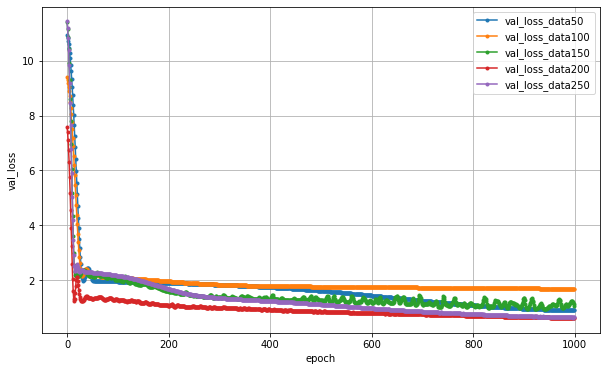

In [13]:
# 学習経過の可視化(大きさ)(validation)

val_loss_array = []
for i in range(len(history_size_array)):
    val_loss_array.append(history_size_array[i].history['val_loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(val_loss_array[i])
for i in range(len(val_loss_array)):
    plt.plot(range(nb_epoch), val_loss_array[i], marker='.', label='val_loss_data%d'%(50*(i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.show()

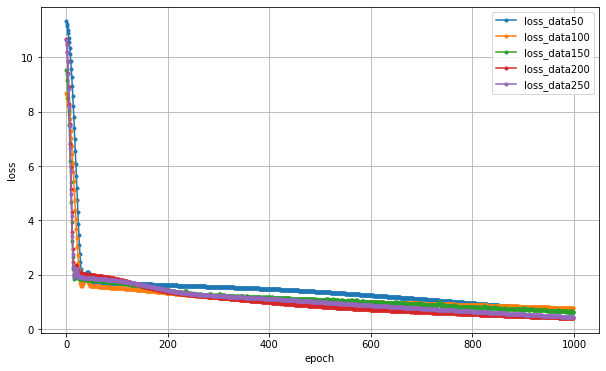

In [14]:
# 学習経過の可視化(大きさ)(train)

loss_array = []
for i in range(len(history_size_array)):
    loss_array.append(history_size_array[i].history['loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(loss_array[i])
for i in range(len(loss_array)):
    plt.plot(range(nb_epoch), loss_array[i], marker='.', label='loss_data%d'%(50*(i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
for i in range(len(val_loss_array)):
    print(val_loss_array[i][-1])

0.9066649675369263
1.6883316040039062
1.0701054334640503
0.6266234517097473
0.6479591131210327


In [16]:
for i in range(len(val_loss_array)):
    print(min(val_loss_array[i]))

0.9066649675369263
1.6883316040039062
0.944549024105072
0.6266234517097473
0.643491804599762


In [17]:
min_val_loss_array = []
for i in range(len(val_loss_array)):
    min_val_loss_array.append(min(val_loss_array[i]))

In [18]:
print(min_val_loss_array)

[0.9066649675369263, 1.6883316040039062, 0.944549024105072, 0.6266234517097473, 0.643491804599762]


In [19]:
min_loss_array = []
for i in range(len(loss_array)):
    min_loss_array.append(min(loss_array[i]))

In [20]:
print(min_loss_array)

[0.6377306580543518, 0.7696207761764526, 0.6389691233634949, 0.4131949543952942, 0.44294318556785583]


In [21]:
## データについて
# データ数50でlossの平均・標準偏差を実験2.1, 2.2の時と比較(loop20回)

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
rep_freq_array1 = []
rep_freq_array2 = []
rep_freq_array3 = []
no_hole_data1 = []
no_hole_data2 = []
no_hole_data3 = []
fft_no_hole_data1 = []
fft_no_hole_data2 = []
fft_no_hole_data3 = []
size_x_data = []
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
fft_size_x_data1 = []
fft_size_x_data2 = []
fft_size_x_data3 = []
size_y_data = []
position_x_data = []
position_x_data1 = []
position_x_data2 = []
position_x_data3 = []
position_one_data1 = []
position_one_data2 = []
position_one_data3 = []
position_two_data1 = []
position_two_data2 = []
position_two_data3 = []
position_three_data1 = []
position_three_data2 = []
position_three_data3 = []
position_four_data1 = []
position_four_data2 = []
position_four_data3 = []
position_five_data1 = []
position_five_data2 = []
position_five_data3 = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]
        
#### 大きさに関するデータ
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_one_data1.append(data_array[3:1254])
    position_one_data2.append(data_array[1254:2505])
    position_one_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(four_holes_path) as fp2:
  for line in fp2:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_two_data1.append(data_array[3:1254])
    position_two_data2.append(data_array[1254:2505])
    position_two_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(nine_holes_path) as fp3:
  for line in fp3:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_three_data1.append(data_array[3:1254])
    position_three_data2.append(data_array[1254:2505])
    position_three_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(sixteen_holes_path) as fp4:
  for line in fp4:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_four_data1.append(data_array[3:1254])
    position_four_data2.append(data_array[1254:2505])
    position_four_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(twentyfive_holes_path) as fp5:
  for line in fp5:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_five_data1.append(data_array[3:1254])
    position_five_data2.append(data_array[1254:2505])
    position_five_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])

### 各配列をnp.array型にして各要素を型変換
no_hole_data1 = np.array(no_hole_data1, dtype=float)
no_hole_data2 = np.array(no_hole_data2, dtype=float)
no_hole_data3 = np.array(no_hole_data3, dtype=float)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data1 = np.array(position_x_data1, dtype=float)
position_x_data2 = np.array(position_x_data2, dtype=float)
position_x_data3 = np.array(position_x_data3, dtype=float)
position_one_data1 = np.array(position_one_data1, dtype=float)
position_two_data1 = np.array(position_two_data1, dtype=float)
position_three_data1 = np.array(position_three_data1, dtype=float)
position_four_data1 = np.array(position_four_data1, dtype=float)
position_five_data1 = np.array(position_five_data1, dtype=float)
position_one_data2 = np.array(position_one_data2, dtype=float)
position_two_data2 = np.array(position_two_data2, dtype=float)
position_three_data2 = np.array(position_three_data2, dtype=float)
position_four_data2 = np.array(position_four_data2, dtype=float)
position_five_data2 = np.array(position_five_data2, dtype=float)
position_one_data3 = np.array(position_one_data3, dtype=float)
position_two_data3 = np.array(position_two_data3, dtype=float)
position_three_data3 = np.array(position_three_data3, dtype=float)
position_four_data3 = np.array(position_four_data3, dtype=float)
position_five_data3 = np.array(position_five_data3, dtype=float)
position_y_data = np.array(position_y_data, dtype=float)

#各振動を高速フーリエ変換→代表周波数のリスト作成→該当周波数のみの振幅を入力とする
## 欠陥なしデータ
F_no_hole1 = np.fft.fft(no_hole_data1)
N = len(no_hole_data1)
Amp_no_hole1 = np.abs(F_no_hole1/(N/2))
maxid_no_hole1 = signal.argrelmax(Amp_no_hole1[1:int(N/2)], order=1)
rep_index_no_hole1 = maxid_no_hole1[0]
for i in range(len(rep_index_no_hole1)):
    if (rep_index_no_hole1[i] in rep_freq_array1) == False:
        rep_freq_array1.append(rep_index_no_hole1[i])
F_no_hole2 = np.fft.fft(no_hole_data2)
Amp_no_hole2 = np.abs(F_no_hole2/(N/2))
maxid_no_hole2 = signal.argrelmax(Amp_no_hole2[1:int(N/2)], order=1)
rep_index_no_hole2 = maxid_no_hole2[0]
for i in range(len(rep_index_no_hole2)):
    if (rep_index_no_hole2[i] in rep_freq_array2) == False:
        rep_freq_array2.append(rep_index_no_hole2[i])
F_no_hole3 = np.fft.fft(no_hole_data3)
Amp_no_hole3 = np.abs(F_no_hole3/(N/2))
maxid_no_hole3 = signal.argrelmax(Amp_no_hole3[1:int(N/2)], order=1)
rep_index_no_hole3 = maxid_no_hole3[0]
for i in range(len(rep_index_no_hole3)):
    if (rep_index_no_hole3[i] in rep_freq_array3) == False:
        rep_freq_array3.append(rep_index_no_hole3[i])
## 欠陥ありデータ
N = len(no_hole_data1)
### 観測点1
for i in range(len(size_x_data1)):
    F = np.fft.fft(size_x_data1[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data1.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array1) == False:
            rep_freq_array1.append(rep_index[j])
### 観測点2
for i in range(len(size_x_data2)):
    F = np.fft.fft(size_x_data2[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data2.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array2) == False:
            rep_freq_array2.append(rep_index[j])
### 観測点3
for i in range(len(size_x_data3)):
    F = np.fft.fft(size_x_data3[i])
    Amp = np.abs(F/(N/2))
    fft_size_x_data3.append(Amp)
    maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
    rep_index = maxid[0]
    for j in range(len(rep_index)):
        if (rep_index[j] in rep_freq_array3) == False:
            rep_freq_array3.append(rep_index[j])

#入力値の更新(振動→代表周波数の振幅)
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
## 観測点1
for i in range(len(fft_size_x_data1)):
    rep_amp = []
    for j in range(len(rep_freq_array1)):
        rep_amp.append(fft_size_x_data1[i][j]-Amp_no_hole1[j])
    size_x_data1.append(rep_amp)
## 観測点2
for i in range(len(fft_size_x_data2)):
    rep_amp = []
    for j in range(len(rep_freq_array2)):
        rep_amp.append(fft_size_x_data2[i][j]-Amp_no_hole2[j])
    size_x_data2.append(rep_amp)
## 観測点3
for i in range(len(fft_size_x_data3)):
    rep_amp = []
    for j in range(len(rep_freq_array3)):
        rep_amp.append(fft_size_x_data3[i][j]-Amp_no_hole3[j])
    size_x_data3.append(rep_amp)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)

## データの加工
###最大値で割る
max_displacement1 = size_x_data1.max()
max_displacement2 = size_x_data2.max()
max_displacement3 = size_x_data3.max()
size_x_data1 = size_x_data1/max_displacement1
size_x_data2 = size_x_data2/max_displacement2
size_x_data3 = size_x_data3/max_displacement3
# position_x_data1 = position_x_data1/max_displacement
# position_x_data2 = position_x_data2/max_displacement
# position_x_data3 = position_x_data3/max_displacement
# position_one_data1 = position_one_data1/max_displacement
# position_one_data2 = position_one_data2/max_displacement
# position_one_data3 = position_one_data3/max_displacement
# position_two_data1 = position_two_data1/max_displacement
# position_two_data2 = position_two_data2/max_displacement
# position_two_data3 = position_two_data3/max_displacement
# position_three_data1 = position_three_data1/max_displacement
# position_three_data2 = position_three_data2/max_displacement
# position_three_data3 = position_three_data3/max_displacement
# position_four_data1 = position_four_data1/max_displacement
# position_four_data2 = position_four_data2/max_displacement
# position_four_data3 = position_four_data3/max_displacement
# position_five_data1 = position_five_data1/max_displacement
# position_five_data2 = position_five_data2/max_displacement
# position_five_data3 = position_five_data3/max_displacement
# position_y_data = position_y_data/50

### データを50個を20回選んだときのデータセット作成
x_size_data_array1 = []
x_size_data_array2 = []
x_size_data_array3 = []
# x_position_data_array1 = []
# x_position_data_array2 = []
# x_position_data_array3 = []
y_size_data_array = []
# y_position_data_array = []
x_index = []
for i in range(len(size_x_data1)):
    x_index.append(i)
for i in range(20):
    data_count = 50
    used_index = random.sample(x_index, data_count)
    used_x_size_data1 = []
    used_x_size_data2 = []
    used_x_size_data3 = []
#     used_x_position_data1 = []
#     used_x_position_data2 = []
#     used_x_position_data3 = []
    used_y_size_data = []
#     used_y_position_data = []
    for i in range(len(used_index)):
        used_x_size_data1.append(size_x_data1[used_index[i]])
        used_x_size_data2.append(size_x_data2[used_index[i]])
        used_x_size_data3.append(size_x_data3[used_index[i]])
#         used_x_position_data1.append(position_x_data1[used_index[i]])
#         used_x_position_data2.append(position_x_data2[used_index[i]])
#         used_x_position_data3.append(position_x_data3[used_index[i]])
        used_y_size_data.append(size_y_data[used_index[i]])
#         used_y_position_data.append(position_y_data[used_index[i]])
    y_size_data_array.append(used_y_size_data)
#     y_position_data_array.append(used_y_position_data)
    x_size_data_array1.append(used_x_size_data1)
    x_size_data_array2.append(used_x_size_data2)
    x_size_data_array3.append(used_x_size_data3)
#     x_position_data_array1.append(used_x_position_data1)
#     x_position_data_array2.append(used_x_position_data2)
#     x_position_data_array3.append(used_x_position_data3)

### train用とtest用に分割(9:1)
x_size_train_array1 = []
x_size_train_array2 = []
x_size_train_array3 = []
x_size_test_array1 = []
x_size_test_array2 = []
x_size_test_array3 = []
# x_position_train_array1 = []
# x_position_train_array2 = []
# x_position_train_array3 = []
# x_position_test_array1 = []
# x_position_test_array2 = []
# x_position_test_array3 = []
y_size_train_array = []
y_size_test_array = []
# y_position_train_array = []
# y_position_test_array = []
for i in range(20):
    x_size_train1, x_size_test1, x_size_train2, x_size_test2, x_size_train3, x_size_test3, y_size_train, y_size_test = train_test_split(x_size_data_array1[i], x_size_data_array2[i], x_size_data_array3[i], y_size_data_array[i], test_size=0.10)
#     x_position_train1, x_position_test1, x_position_train2, x_position_test2, x_position_train3, x_position_test3, y_position_train, y_position_test = train_test_split(x_position_data_array1[i], x_position_data_array2[i], x_position_data_array3[i], y_position_data_array[i], test_size=0.10)
    x_size_train_array1.append(np.array(x_size_train1))
    x_size_train_array2.append(np.array(x_size_train2))
    x_size_train_array3.append(np.array(x_size_train3))
    x_size_test_array1.append(np.array(x_size_test1))
    x_size_test_array2.append(np.array(x_size_test2))
    x_size_test_array3.append(np.array(x_size_test3))
#     x_position_train_array1.append(np.array(x_position_train1))
#     x_position_train_array2.append(np.array(x_position_train2))
#     x_position_train_array3.append(np.array(x_position_train3))
#     x_position_test_array1.append(np.array(x_position_test1))
#     x_position_test_array2.append(np.array(x_position_test2))
#     x_position_test_array3.append(np.array(x_position_test3))
    y_size_train_array.append(np.array(y_size_train))
    y_size_test_array.append(np.array(y_size_test))
#     y_position_train_array.append(np.array(y_position_train))
#     y_position_test_array.append(np.array(y_position_test))

In [22]:
# 大きさ推定のモデル
model_size_array = []

for i in range(20):
    # 入力を定義
    input1 = Input(shape=(39,1))
    input2 = Input(shape=(68,1))
    input3 = Input(shape=(42,1))

    # 入力1から結合前まで
    x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
    x = MaxPooling1D(2, padding='same')(x)
    x = Model(inputs=input1, outputs=x)
    # 入力2から結合前まで
    y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
    y = MaxPooling1D(2, padding='same')(y)
    y = Model(inputs=input2, outputs=y)
    # 入力3から結合前まで
    z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
    z = MaxPooling1D(2, padding='same')(z)
    z = Model(inputs=input3, outputs=z)

    # 結合
    combined = concatenate([x.output, y.output, z.output], axis = 1)

    # 密結合
    cnn = Flatten()(combined)
    cnn = Dense(1, activation="linear")(cnn)

    # モデル定義とコンパイル
    cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
    cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
    model_size_array.append(cnn_size_model)

In [23]:
# 学習ループ
history_size_array = []
for i in range(len(model_size_array)):
    epochs = 1000
    batch_size = 128
    history_size_array.append(model_size_array[i].fit([x_size_train_array1[i], x_size_train_array2[i], x_size_train_array3[i]], y_size_train_array[i], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test_array1[i], x_size_test_array2[i], x_size_test_array3[i]], y_size_test_array[i])))

Epoch 1/1000
1/1 [==============================] - 0s 162ms/step - loss: 12.0000 - acc: 0.0000e+00 - val_loss: 9.9139 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 50ms/step - loss: 11.9062 - acc: 0.0000e+00 - val_loss: 9.8159 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 51ms/step - loss: 11.7975 - acc: 0.0000e+00 - val_loss: 9.7006 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 57ms/step - loss: 11.6689 - acc: 0.0000e+00 - val_loss: 9.5661 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 46ms/step - loss: 11.5183 - acc: 0.0000e+00 - val_loss: 9.4110 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 44ms/step - loss: 11.3441 - acc: 0.0000e+00 - val_loss: 9.2346 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 52ms/step - loss: 11.1454 - acc: 0.0000e+00 - val_loss: 9.0364 - val_acc: 0.0000e+00
Epoch 8/1000
1/1 [=

1/1 [==============================] - 0s 29ms/step - loss: 2.0195 - acc: 0.1556 - val_loss: 2.0872 - val_acc: 0.2000
Epoch 63/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.0205 - acc: 0.1556 - val_loss: 2.0867 - val_acc: 0.2000
Epoch 64/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0192 - acc: 0.1556 - val_loss: 2.0876 - val_acc: 0.2000
Epoch 65/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0158 - acc: 0.1556 - val_loss: 2.0899 - val_acc: 0.2000
Epoch 66/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0106 - acc: 0.1556 - val_loss: 2.0938 - val_acc: 0.2000
Epoch 67/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0043 - acc: 0.1556 - val_loss: 2.0993 - val_acc: 0.2000
Epoch 68/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.9973 - acc: 0.1556 - val_loss: 2.1065 - val_acc: 0.2000
Epoch 69/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.9902 - acc: 0.

Epoch 124/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9185 - acc: 0.1556 - val_loss: 2.1313 - val_acc: 0.2000
Epoch 125/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9174 - acc: 0.1556 - val_loss: 2.1286 - val_acc: 0.2000
Epoch 126/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9162 - acc: 0.1556 - val_loss: 2.1260 - val_acc: 0.2000
Epoch 127/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.9151 - acc: 0.1556 - val_loss: 2.1234 - val_acc: 0.2000
Epoch 128/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.9139 - acc: 0.1556 - val_loss: 2.1208 - val_acc: 0.2000
Epoch 129/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9127 - acc: 0.1556 - val_loss: 2.1184 - val_acc: 0.2000
Epoch 130/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9116 - acc: 0.1556 - val_loss: 2.1162 - val_acc: 0.2000
Epoch 131/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 41ms/step - loss: 1.8318 - acc: 0.1556 - val_loss: 2.0154 - val_acc: 0.2000
Epoch 186/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8300 - acc: 0.1556 - val_loss: 2.0131 - val_acc: 0.2000
Epoch 187/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8282 - acc: 0.1556 - val_loss: 2.0107 - val_acc: 0.2000
Epoch 188/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8264 - acc: 0.1556 - val_loss: 2.0082 - val_acc: 0.2000
Epoch 189/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.8246 - acc: 0.1556 - val_loss: 2.0058 - val_acc: 0.2000
Epoch 190/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8228 - acc: 0.1556 - val_loss: 2.0033 - val_acc: 0.2000
Epoch 191/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8210 - acc: 0.1556 - val_loss: 2.0008 - val_acc: 0.2000
Epoch 192/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8192 - 

Epoch 247/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7020 - acc: 0.1556 - val_loss: 1.8367 - val_acc: 0.2000
Epoch 248/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6996 - acc: 0.1556 - val_loss: 1.8333 - val_acc: 0.2000
Epoch 249/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6972 - acc: 0.1556 - val_loss: 1.8298 - val_acc: 0.2000
Epoch 250/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6948 - acc: 0.1556 - val_loss: 1.8264 - val_acc: 0.2000
Epoch 251/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6924 - acc: 0.1556 - val_loss: 1.8229 - val_acc: 0.2000
Epoch 252/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6899 - acc: 0.1556 - val_loss: 1.8194 - val_acc: 0.2000
Epoch 253/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6875 - acc: 0.1556 - val_loss: 1.8159 - val_acc: 0.2000
Epoch 254/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 1.5468 - acc: 0.1556 - val_loss: 1.6051 - val_acc: 0.2000
Epoch 309/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.5442 - acc: 0.1556 - val_loss: 1.6011 - val_acc: 0.2000
Epoch 310/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5416 - acc: 0.1556 - val_loss: 1.5971 - val_acc: 0.2000
Epoch 311/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5390 - acc: 0.1556 - val_loss: 1.5930 - val_acc: 0.2000
Epoch 312/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5364 - acc: 0.1556 - val_loss: 1.5890 - val_acc: 0.2000
Epoch 313/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5338 - acc: 0.1556 - val_loss: 1.5850 - val_acc: 0.2000
Epoch 314/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5312 - acc: 0.1556 - val_loss: 1.5809 - val_acc: 0.2000
Epoch 315/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.5286 - 

Epoch 370/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3926 - acc: 0.1556 - val_loss: 1.3631 - val_acc: 0.2000
Epoch 371/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3903 - acc: 0.1556 - val_loss: 1.3595 - val_acc: 0.2000
Epoch 372/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3880 - acc: 0.1556 - val_loss: 1.3560 - val_acc: 0.2000
Epoch 373/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.3857 - acc: 0.1556 - val_loss: 1.3524 - val_acc: 0.2000
Epoch 374/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.3835 - acc: 0.1556 - val_loss: 1.3489 - val_acc: 0.2000
Epoch 375/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3812 - acc: 0.1556 - val_loss: 1.3454 - val_acc: 0.2000
Epoch 376/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3789 - acc: 0.1556 - val_loss: 1.3419 - val_acc: 0.2000
Epoch 377/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 1.2676 - acc: 0.1556 - val_loss: 1.1832 - val_acc: 0.2000
Epoch 432/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2658 - acc: 0.1556 - val_loss: 1.1810 - val_acc: 0.2000
Epoch 433/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2640 - acc: 0.1556 - val_loss: 1.1788 - val_acc: 0.2000
Epoch 434/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2622 - acc: 0.1556 - val_loss: 1.1766 - val_acc: 0.2000
Epoch 435/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2604 - acc: 0.1556 - val_loss: 1.1744 - val_acc: 0.2000
Epoch 436/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2586 - acc: 0.1556 - val_loss: 1.1723 - val_acc: 0.2000
Epoch 437/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2568 - acc: 0.1556 - val_loss: 1.1702 - val_acc: 0.2000
Epoch 438/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2550 - 

Epoch 493/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1673 - acc: 0.1556 - val_loss: 1.0928 - val_acc: 0.2000
Epoch 494/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1659 - acc: 0.1556 - val_loss: 1.0921 - val_acc: 0.2000
Epoch 495/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1644 - acc: 0.1556 - val_loss: 1.0913 - val_acc: 0.2000
Epoch 496/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1630 - acc: 0.1556 - val_loss: 1.0907 - val_acc: 0.2000
Epoch 497/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1615 - acc: 0.1556 - val_loss: 1.0900 - val_acc: 0.2000
Epoch 498/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1601 - acc: 0.1556 - val_loss: 1.0893 - val_acc: 0.2000
Epoch 499/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1587 - acc: 0.1556 - val_loss: 1.0887 - val_acc: 0.2000
Epoch 500/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.0858 - acc: 0.1556 - val_loss: 1.0803 - val_acc: 0.2000
Epoch 555/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0846 - acc: 0.1556 - val_loss: 1.0806 - val_acc: 0.2000
Epoch 556/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0834 - acc: 0.1556 - val_loss: 1.0808 - val_acc: 0.2000
Epoch 557/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0821 - acc: 0.1556 - val_loss: 1.0810 - val_acc: 0.2000
Epoch 558/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0809 - acc: 0.1556 - val_loss: 1.0813 - val_acc: 0.2000
Epoch 559/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.0797 - acc: 0.1556 - val_loss: 1.0815 - val_acc: 0.2000
Epoch 560/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0784 - acc: 0.1556 - val_loss: 1.0818 - val_acc: 0.2000
Epoch 561/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0772 - 

Epoch 616/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0122 - acc: 0.1556 - val_loss: 1.1061 - val_acc: 0.2000
Epoch 617/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0110 - acc: 0.1556 - val_loss: 1.1066 - val_acc: 0.2000
Epoch 618/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0099 - acc: 0.1556 - val_loss: 1.1072 - val_acc: 0.2000
Epoch 619/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0087 - acc: 0.1556 - val_loss: 1.1077 - val_acc: 0.2000
Epoch 620/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0076 - acc: 0.1556 - val_loss: 1.1083 - val_acc: 0.2000
Epoch 621/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.0064 - acc: 0.1556 - val_loss: 1.1088 - val_acc: 0.2000
Epoch 622/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0053 - acc: 0.1556 - val_loss: 1.1094 - val_acc: 0.2000
Epoch 623/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 0.9437 - acc: 0.1556 - val_loss: 1.1389 - val_acc: 0.2000
Epoch 678/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9426 - acc: 0.1556 - val_loss: 1.1394 - val_acc: 0.2000
Epoch 679/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9415 - acc: 0.1556 - val_loss: 1.1399 - val_acc: 0.2000
Epoch 680/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9404 - acc: 0.1556 - val_loss: 1.1404 - val_acc: 0.2000
Epoch 681/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9393 - acc: 0.1556 - val_loss: 1.1409 - val_acc: 0.2000
Epoch 682/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9382 - acc: 0.1556 - val_loss: 1.1414 - val_acc: 0.2000
Epoch 683/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9370 - acc: 0.1556 - val_loss: 1.1419 - val_acc: 0.2000
Epoch 684/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9359 - 

Epoch 739/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8750 - acc: 0.1556 - val_loss: 1.1671 - val_acc: 0.2000
Epoch 740/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8739 - acc: 0.1556 - val_loss: 1.1675 - val_acc: 0.2000
Epoch 741/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8728 - acc: 0.1556 - val_loss: 1.1678 - val_acc: 0.2000
Epoch 742/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8717 - acc: 0.1556 - val_loss: 1.1682 - val_acc: 0.2000
Epoch 743/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8706 - acc: 0.1556 - val_loss: 1.1686 - val_acc: 0.2000
Epoch 744/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8695 - acc: 0.1556 - val_loss: 1.1690 - val_acc: 0.2000
Epoch 745/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8684 - acc: 0.1556 - val_loss: 1.1694 - val_acc: 0.2000
Epoch 746/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 0.8076 - acc: 0.1556 - val_loss: 1.1881 - val_acc: 0.2000
Epoch 801/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.8065 - acc: 0.1556 - val_loss: 1.1884 - val_acc: 0.2000
Epoch 802/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.8054 - acc: 0.1556 - val_loss: 1.1888 - val_acc: 0.2000
Epoch 803/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.8043 - acc: 0.1556 - val_loss: 1.1892 - val_acc: 0.2000
Epoch 804/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.8032 - acc: 0.1556 - val_loss: 1.1895 - val_acc: 0.2000
Epoch 805/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.8021 - acc: 0.1556 - val_loss: 1.1899 - val_acc: 0.2000
Epoch 806/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.8011 - acc: 0.1556 - val_loss: 1.1903 - val_acc: 0.2000
Epoch 807/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.8000 - 

Epoch 862/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7404 - acc: 0.1556 - val_loss: 1.2127 - val_acc: 0.2000
Epoch 863/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7394 - acc: 0.1556 - val_loss: 1.2131 - val_acc: 0.2000
Epoch 864/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7383 - acc: 0.1556 - val_loss: 1.2135 - val_acc: 0.2000
Epoch 865/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7373 - acc: 0.1556 - val_loss: 1.2140 - val_acc: 0.2000
Epoch 866/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7362 - acc: 0.1556 - val_loss: 1.2144 - val_acc: 0.2000
Epoch 867/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7351 - acc: 0.1556 - val_loss: 1.2148 - val_acc: 0.2000
Epoch 868/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7341 - acc: 0.1556 - val_loss: 1.2153 - val_acc: 0.2000
Epoch 869/1000
1/1 [==============================] - 0s 41ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 0.6774 - acc: 0.1556 - val_loss: 1.2441 - val_acc: 0.2000
Epoch 924/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6764 - acc: 0.1556 - val_loss: 1.2447 - val_acc: 0.2000
Epoch 925/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6754 - acc: 0.1556 - val_loss: 1.2453 - val_acc: 0.2000
Epoch 926/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6744 - acc: 0.1556 - val_loss: 1.2458 - val_acc: 0.2000
Epoch 927/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6734 - acc: 0.1556 - val_loss: 1.2464 - val_acc: 0.2000
Epoch 928/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6724 - acc: 0.1556 - val_loss: 1.2470 - val_acc: 0.2000
Epoch 929/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6714 - acc: 0.1556 - val_loss: 1.2476 - val_acc: 0.2000
Epoch 930/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6704 - 

Epoch 985/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6172 - acc: 0.1556 - val_loss: 1.2828 - val_acc: 0.2000
Epoch 986/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6162 - acc: 0.1556 - val_loss: 1.2834 - val_acc: 0.2000
Epoch 987/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6153 - acc: 0.1556 - val_loss: 1.2841 - val_acc: 0.2000
Epoch 988/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6143 - acc: 0.1556 - val_loss: 1.2847 - val_acc: 0.2000
Epoch 989/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6134 - acc: 0.1556 - val_loss: 1.2854 - val_acc: 0.2000
Epoch 990/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6125 - acc: 0.1556 - val_loss: 1.2860 - val_acc: 0.2000
Epoch 991/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6116 - acc: 0.1556 - val_loss: 1.2867 - val_acc: 0.2000
Epoch 992/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.9116 - acc: 0.2000 - val_loss: 2.9320 - val_acc: 0.4000
Epoch 47/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8616 - acc: 0.2000 - val_loss: 2.8281 - val_acc: 0.4000
Epoch 48/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8162 - acc: 0.2000 - val_loss: 2.7296 - val_acc: 0.4000
Epoch 49/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.7780 - acc: 0.2000 - val_loss: 2.6400 - val_acc: 0.4000
Epoch 50/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7483 - acc: 0.2000 - val_loss: 2.5610 - val_acc: 0.4000
Epoch 51/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7275 - acc: 0.2000 - val_loss: 2.4935 - val_acc: 0.4000
Epoch 52/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7152 - acc: 0.2000 - val_loss: 2.4374 - val_acc: 0.4000
Epoch 53/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7101 - acc: 0.

1/1 [==============================] - 0s 120ms/step - loss: 1.6455 - acc: 0.2000 - val_loss: 2.3880 - val_acc: 0.4000
Epoch 109/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6440 - acc: 0.2000 - val_loss: 2.3901 - val_acc: 0.4000
Epoch 110/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6426 - acc: 0.2000 - val_loss: 2.3917 - val_acc: 0.4000
Epoch 111/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6412 - acc: 0.2000 - val_loss: 2.3929 - val_acc: 0.4000
Epoch 112/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6398 - acc: 0.2000 - val_loss: 2.3936 - val_acc: 0.4000
Epoch 113/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.6384 - acc: 0.2000 - val_loss: 2.3938 - val_acc: 0.4000
Epoch 114/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.6369 - acc: 0.2000 - val_loss: 2.3934 - val_acc: 0.4000
Epoch 115/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.6355 -

Epoch 170/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5374 - acc: 0.2000 - val_loss: 2.3131 - val_acc: 0.4000
Epoch 171/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5354 - acc: 0.2000 - val_loss: 2.3118 - val_acc: 0.4000
Epoch 172/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5334 - acc: 0.2000 - val_loss: 2.3104 - val_acc: 0.4000
Epoch 173/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5313 - acc: 0.2000 - val_loss: 2.3090 - val_acc: 0.4000
Epoch 174/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5292 - acc: 0.2000 - val_loss: 2.3076 - val_acc: 0.4000
Epoch 175/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5272 - acc: 0.2000 - val_loss: 2.3062 - val_acc: 0.4000
Epoch 176/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.5251 - acc: 0.2000 - val_loss: 2.3047 - val_acc: 0.4000
Epoch 177/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 1.4066 - acc: 0.2000 - val_loss: 2.2126 - val_acc: 0.4000
Epoch 232/1000
1/1 [==============================] - 0s 102ms/step - loss: 1.4045 - acc: 0.2000 - val_loss: 2.2108 - val_acc: 0.4000
Epoch 233/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.4023 - acc: 0.2000 - val_loss: 2.2090 - val_acc: 0.4000
Epoch 234/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4002 - acc: 0.2000 - val_loss: 2.2073 - val_acc: 0.4000
Epoch 235/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.3981 - acc: 0.2000 - val_loss: 2.2055 - val_acc: 0.4000
Epoch 236/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3960 - acc: 0.2000 - val_loss: 2.2038 - val_acc: 0.4000
Epoch 237/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.3939 - acc: 0.2000 - val_loss: 2.2020 - val_acc: 0.4000
Epoch 238/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.3918 -

Epoch 293/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2867 - acc: 0.2000 - val_loss: 2.1100 - val_acc: 0.4000
Epoch 294/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2850 - acc: 0.2000 - val_loss: 2.1085 - val_acc: 0.4000
Epoch 295/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.2833 - acc: 0.2000 - val_loss: 2.1071 - val_acc: 0.4000
Epoch 296/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2817 - acc: 0.2000 - val_loss: 2.1057 - val_acc: 0.4000
Epoch 297/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.2800 - acc: 0.2000 - val_loss: 2.1042 - val_acc: 0.4000
Epoch 298/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2783 - acc: 0.2000 - val_loss: 2.1028 - val_acc: 0.4000
Epoch 299/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2767 - acc: 0.2000 - val_loss: 2.1014 - val_acc: 0.4000
Epoch 300/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.1963 - acc: 0.2000 - val_loss: 2.0403 - val_acc: 0.4000
Epoch 355/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1949 - acc: 0.2000 - val_loss: 2.0395 - val_acc: 0.4000
Epoch 356/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1936 - acc: 0.2000 - val_loss: 2.0387 - val_acc: 0.4000
Epoch 357/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1923 - acc: 0.2000 - val_loss: 2.0379 - val_acc: 0.4000
Epoch 358/1000
1/1 [==============================] - 0s 75ms/step - loss: 1.1910 - acc: 0.2000 - val_loss: 2.0371 - val_acc: 0.4000
Epoch 359/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1897 - acc: 0.2000 - val_loss: 2.0363 - val_acc: 0.4000
Epoch 360/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1884 - acc: 0.2000 - val_loss: 2.0355 - val_acc: 0.4000
Epoch 361/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1871 - 

Epoch 416/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.1195 - acc: 0.2000 - val_loss: 2.0053 - val_acc: 0.4000
Epoch 417/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1183 - acc: 0.2000 - val_loss: 2.0049 - val_acc: 0.4000
Epoch 418/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1172 - acc: 0.2000 - val_loss: 2.0046 - val_acc: 0.4000
Epoch 419/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1160 - acc: 0.2000 - val_loss: 2.0042 - val_acc: 0.4000
Epoch 420/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1148 - acc: 0.2000 - val_loss: 2.0039 - val_acc: 0.4000
Epoch 421/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1136 - acc: 0.2000 - val_loss: 2.0035 - val_acc: 0.4000
Epoch 422/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1125 - acc: 0.2000 - val_loss: 2.0032 - val_acc: 0.4000
Epoch 423/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 1.0504 - acc: 0.2000 - val_loss: 1.9906 - val_acc: 0.4000
Epoch 478/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0493 - acc: 0.2000 - val_loss: 1.9905 - val_acc: 0.4000
Epoch 479/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0482 - acc: 0.2000 - val_loss: 1.9903 - val_acc: 0.4000
Epoch 480/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0471 - acc: 0.2000 - val_loss: 1.9902 - val_acc: 0.4000
Epoch 481/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0460 - acc: 0.2000 - val_loss: 1.9900 - val_acc: 0.4000
Epoch 482/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0449 - acc: 0.2000 - val_loss: 1.9899 - val_acc: 0.4000
Epoch 483/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.0439 - acc: 0.2000 - val_loss: 1.9897 - val_acc: 0.4000
Epoch 484/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0428 - 

Epoch 539/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9857 - acc: 0.2000 - val_loss: 1.9833 - val_acc: 0.4000
Epoch 540/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9847 - acc: 0.2000 - val_loss: 1.9832 - val_acc: 0.4000
Epoch 541/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9837 - acc: 0.2000 - val_loss: 1.9831 - val_acc: 0.4000
Epoch 542/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9827 - acc: 0.2000 - val_loss: 1.9830 - val_acc: 0.4000
Epoch 543/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9817 - acc: 0.2000 - val_loss: 1.9829 - val_acc: 0.4000
Epoch 544/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.9807 - acc: 0.2000 - val_loss: 1.9828 - val_acc: 0.4000
Epoch 545/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9797 - acc: 0.2000 - val_loss: 1.9827 - val_acc: 0.4000
Epoch 546/1000
1/1 [==============================] - 0s 25ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 0.9266 - acc: 0.2000 - val_loss: 1.9754 - val_acc: 0.4000
Epoch 601/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9257 - acc: 0.2000 - val_loss: 1.9752 - val_acc: 0.4000
Epoch 602/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9247 - acc: 0.2000 - val_loss: 1.9749 - val_acc: 0.4000
Epoch 603/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9238 - acc: 0.2000 - val_loss: 1.9747 - val_acc: 0.4000
Epoch 604/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9229 - acc: 0.2000 - val_loss: 1.9745 - val_acc: 0.4000
Epoch 605/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9219 - acc: 0.2000 - val_loss: 1.9743 - val_acc: 0.4000
Epoch 606/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9210 - acc: 0.2000 - val_loss: 1.9741 - val_acc: 0.4000
Epoch 607/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9201 - 

Epoch 662/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8695 - acc: 0.2000 - val_loss: 1.9594 - val_acc: 0.4000
Epoch 663/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8686 - acc: 0.2000 - val_loss: 1.9591 - val_acc: 0.4000
Epoch 664/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8677 - acc: 0.2000 - val_loss: 1.9588 - val_acc: 0.4000
Epoch 665/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8667 - acc: 0.2000 - val_loss: 1.9585 - val_acc: 0.4000
Epoch 666/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.8658 - acc: 0.2000 - val_loss: 1.9582 - val_acc: 0.4000
Epoch 667/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8649 - acc: 0.2000 - val_loss: 1.9579 - val_acc: 0.4000
Epoch 668/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8640 - acc: 0.2000 - val_loss: 1.9575 - val_acc: 0.4000
Epoch 669/1000
1/1 [==============================] - 0s 27ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 0.8144 - acc: 0.2000 - val_loss: 1.9374 - val_acc: 0.4000
Epoch 724/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8135 - acc: 0.2000 - val_loss: 1.9370 - val_acc: 0.4000
Epoch 725/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8126 - acc: 0.2000 - val_loss: 1.9366 - val_acc: 0.4000
Epoch 726/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8117 - acc: 0.2000 - val_loss: 1.9362 - val_acc: 0.4000
Epoch 727/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8108 - acc: 0.2000 - val_loss: 1.9358 - val_acc: 0.4000
Epoch 728/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8099 - acc: 0.2000 - val_loss: 1.9354 - val_acc: 0.4000
Epoch 729/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8091 - acc: 0.2000 - val_loss: 1.9350 - val_acc: 0.4000
Epoch 730/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8082 - 

Epoch 785/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.7607 - acc: 0.2000 - val_loss: 1.9111 - val_acc: 0.4000
Epoch 786/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.7599 - acc: 0.2000 - val_loss: 1.9106 - val_acc: 0.4000
Epoch 787/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.7591 - acc: 0.2000 - val_loss: 1.9102 - val_acc: 0.4000
Epoch 788/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7582 - acc: 0.2000 - val_loss: 1.9097 - val_acc: 0.4000
Epoch 789/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.7574 - acc: 0.2000 - val_loss: 1.9093 - val_acc: 0.4000
Epoch 790/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.7565 - acc: 0.2000 - val_loss: 1.9088 - val_acc: 0.4000
Epoch 791/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.7557 - acc: 0.2000 - val_loss: 1.9084 - val_acc: 0.4000
Epoch 792/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 0.7112 - acc: 0.2000 - val_loss: 1.8835 - val_acc: 0.4000
Epoch 847/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7104 - acc: 0.2000 - val_loss: 1.8830 - val_acc: 0.4000
Epoch 848/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7097 - acc: 0.2000 - val_loss: 1.8826 - val_acc: 0.4000
Epoch 849/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7089 - acc: 0.2000 - val_loss: 1.8821 - val_acc: 0.4000
Epoch 850/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7081 - acc: 0.2000 - val_loss: 1.8817 - val_acc: 0.4000
Epoch 851/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7073 - acc: 0.2000 - val_loss: 1.8812 - val_acc: 0.4000
Epoch 852/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7066 - acc: 0.2000 - val_loss: 1.8807 - val_acc: 0.4000
Epoch 853/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7058 - 

Epoch 908/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6647 - acc: 0.2000 - val_loss: 1.8551 - val_acc: 0.4000
Epoch 909/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6640 - acc: 0.2000 - val_loss: 1.8546 - val_acc: 0.4000
Epoch 910/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6633 - acc: 0.2000 - val_loss: 1.8542 - val_acc: 0.4000
Epoch 911/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6625 - acc: 0.2000 - val_loss: 1.8537 - val_acc: 0.4000
Epoch 912/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6618 - acc: 0.2000 - val_loss: 1.8533 - val_acc: 0.4000
Epoch 913/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6611 - acc: 0.2000 - val_loss: 1.8529 - val_acc: 0.4000
Epoch 914/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6604 - acc: 0.2000 - val_loss: 1.8524 - val_acc: 0.4000
Epoch 915/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 0.6216 - acc: 0.2000 - val_loss: 1.8291 - val_acc: 0.4000
Epoch 970/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6209 - acc: 0.2000 - val_loss: 1.8287 - val_acc: 0.4000
Epoch 971/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6202 - acc: 0.2000 - val_loss: 1.8283 - val_acc: 0.4000
Epoch 972/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6195 - acc: 0.2000 - val_loss: 1.8279 - val_acc: 0.4000
Epoch 973/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6188 - acc: 0.2000 - val_loss: 1.8275 - val_acc: 0.4000
Epoch 974/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6182 - acc: 0.2000 - val_loss: 1.8271 - val_acc: 0.4000
Epoch 975/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6175 - acc: 0.2000 - val_loss: 1.8268 - val_acc: 0.4000
Epoch 976/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6168 - 

1/1 [==============================] - 0s 34ms/step - loss: 2.3693 - acc: 0.2667 - val_loss: 3.0025 - val_acc: 0.6000
Epoch 31/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.2333 - acc: 0.2667 - val_loss: 3.0650 - val_acc: 0.6000
Epoch 32/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.1456 - acc: 0.2667 - val_loss: 3.1679 - val_acc: 0.6000
Epoch 33/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.1040 - acc: 0.2667 - val_loss: 3.3034 - val_acc: 0.6000
Epoch 34/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.1034 - acc: 0.2667 - val_loss: 3.4608 - val_acc: 0.6000
Epoch 35/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.1357 - acc: 0.2667 - val_loss: 3.6271 - val_acc: 0.6000
Epoch 36/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.1910 - acc: 0.2667 - val_loss: 3.7885 - val_acc: 0.6000
Epoch 37/1000
1/1 [==============================] - 0s 50ms/step - loss: 2.2578 - acc: 0.

1/1 [==============================] - 0s 61ms/step - loss: 1.9936 - acc: 0.2667 - val_loss: 3.1229 - val_acc: 0.6000
Epoch 93/1000
1/1 [==============================] - 0s 90ms/step - loss: 1.9914 - acc: 0.2667 - val_loss: 3.1145 - val_acc: 0.6000
Epoch 94/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.9893 - acc: 0.2667 - val_loss: 3.1074 - val_acc: 0.6000
Epoch 95/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.9871 - acc: 0.2667 - val_loss: 3.1013 - val_acc: 0.6000
Epoch 96/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.9850 - acc: 0.2667 - val_loss: 3.0965 - val_acc: 0.6000
Epoch 97/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9827 - acc: 0.2667 - val_loss: 3.0927 - val_acc: 0.6000
Epoch 98/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9804 - acc: 0.2667 - val_loss: 3.0900 - val_acc: 0.6000
Epoch 99/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9780 - acc: 0.

Epoch 154/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8004 - acc: 0.2667 - val_loss: 2.9531 - val_acc: 0.6000
Epoch 155/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7964 - acc: 0.2667 - val_loss: 2.9490 - val_acc: 0.6000
Epoch 156/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7923 - acc: 0.2667 - val_loss: 2.9449 - val_acc: 0.6000
Epoch 157/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7883 - acc: 0.2667 - val_loss: 2.9407 - val_acc: 0.6000
Epoch 158/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7842 - acc: 0.2667 - val_loss: 2.9366 - val_acc: 0.6000
Epoch 159/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7800 - acc: 0.2667 - val_loss: 2.9324 - val_acc: 0.6000
Epoch 160/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7759 - acc: 0.2667 - val_loss: 2.9283 - val_acc: 0.6000
Epoch 161/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.5155 - acc: 0.2667 - val_loss: 2.6664 - val_acc: 0.6000
Epoch 216/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.5104 - acc: 0.2667 - val_loss: 2.6609 - val_acc: 0.6000
Epoch 217/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5054 - acc: 0.2667 - val_loss: 2.6555 - val_acc: 0.6000
Epoch 218/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5003 - acc: 0.2667 - val_loss: 2.6500 - val_acc: 0.6000
Epoch 219/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4952 - acc: 0.2667 - val_loss: 2.6445 - val_acc: 0.6000
Epoch 220/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4902 - acc: 0.2667 - val_loss: 2.6389 - val_acc: 0.6000
Epoch 221/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4851 - acc: 0.2667 - val_loss: 2.6334 - val_acc: 0.6000
Epoch 222/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4801 - 

Epoch 277/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.2247 - acc: 0.2667 - val_loss: 2.3147 - val_acc: 0.6000
Epoch 278/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2207 - acc: 0.2667 - val_loss: 2.3092 - val_acc: 0.6000
Epoch 279/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2168 - acc: 0.2667 - val_loss: 2.3036 - val_acc: 0.6000
Epoch 280/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2130 - acc: 0.2667 - val_loss: 2.2981 - val_acc: 0.6000
Epoch 281/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2091 - acc: 0.2667 - val_loss: 2.2926 - val_acc: 0.6000
Epoch 282/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2053 - acc: 0.2667 - val_loss: 2.2871 - val_acc: 0.6000
Epoch 283/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2015 - acc: 0.2667 - val_loss: 2.2816 - val_acc: 0.6000
Epoch 284/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 50ms/step - loss: 1.0433 - acc: 0.2667 - val_loss: 2.0157 - val_acc: 0.6000
Epoch 339/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.0412 - acc: 0.2667 - val_loss: 2.0116 - val_acc: 0.6000
Epoch 340/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.0392 - acc: 0.2667 - val_loss: 2.0075 - val_acc: 0.6000
Epoch 341/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.0372 - acc: 0.2667 - val_loss: 2.0035 - val_acc: 0.6000
Epoch 342/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0352 - acc: 0.2667 - val_loss: 1.9995 - val_acc: 0.6000
Epoch 343/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0332 - acc: 0.2667 - val_loss: 1.9955 - val_acc: 0.6000
Epoch 344/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0313 - acc: 0.2667 - val_loss: 1.9915 - val_acc: 0.6000
Epoch 345/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0294 - 

Epoch 400/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9475 - acc: 0.2667 - val_loss: 1.8105 - val_acc: 0.6000
Epoch 401/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.9463 - acc: 0.2667 - val_loss: 1.8079 - val_acc: 0.6000
Epoch 402/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9451 - acc: 0.2667 - val_loss: 1.8052 - val_acc: 0.6000
Epoch 403/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9439 - acc: 0.2667 - val_loss: 1.8026 - val_acc: 0.6000
Epoch 404/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9427 - acc: 0.2667 - val_loss: 1.8000 - val_acc: 0.6000
Epoch 405/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9415 - acc: 0.2667 - val_loss: 1.7975 - val_acc: 0.6000
Epoch 406/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9403 - acc: 0.2667 - val_loss: 1.7949 - val_acc: 0.6000
Epoch 407/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.8808 - acc: 0.2667 - val_loss: 1.6712 - val_acc: 0.6000
Epoch 462/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8798 - acc: 0.2667 - val_loss: 1.6692 - val_acc: 0.6000
Epoch 463/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8788 - acc: 0.2667 - val_loss: 1.6671 - val_acc: 0.6000
Epoch 464/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8778 - acc: 0.2667 - val_loss: 1.6651 - val_acc: 0.6000
Epoch 465/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8768 - acc: 0.2667 - val_loss: 1.6631 - val_acc: 0.6000
Epoch 466/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8758 - acc: 0.2667 - val_loss: 1.6610 - val_acc: 0.6000
Epoch 467/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8747 - acc: 0.2667 - val_loss: 1.6590 - val_acc: 0.6000
Epoch 468/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8737 - 

Epoch 523/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8206 - acc: 0.2667 - val_loss: 1.5488 - val_acc: 0.6000
Epoch 524/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8197 - acc: 0.2667 - val_loss: 1.5469 - val_acc: 0.6000
Epoch 525/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8187 - acc: 0.2667 - val_loss: 1.5449 - val_acc: 0.6000
Epoch 526/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8178 - acc: 0.2667 - val_loss: 1.5430 - val_acc: 0.6000
Epoch 527/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8169 - acc: 0.2667 - val_loss: 1.5410 - val_acc: 0.6000
Epoch 528/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8160 - acc: 0.2667 - val_loss: 1.5391 - val_acc: 0.6000
Epoch 529/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8151 - acc: 0.2667 - val_loss: 1.5371 - val_acc: 0.6000
Epoch 530/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 43ms/step - loss: 0.7668 - acc: 0.2667 - val_loss: 1.4277 - val_acc: 0.6000
Epoch 585/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7660 - acc: 0.2667 - val_loss: 1.4257 - val_acc: 0.6000
Epoch 586/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7652 - acc: 0.2667 - val_loss: 1.4237 - val_acc: 0.6000
Epoch 587/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7643 - acc: 0.2667 - val_loss: 1.4216 - val_acc: 0.6000
Epoch 588/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7635 - acc: 0.2667 - val_loss: 1.4196 - val_acc: 0.6000
Epoch 589/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7627 - acc: 0.2667 - val_loss: 1.4176 - val_acc: 0.6000
Epoch 590/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7619 - acc: 0.2667 - val_loss: 1.4156 - val_acc: 0.6000
Epoch 591/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7610 - 

Epoch 646/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7182 - acc: 0.2667 - val_loss: 1.3012 - val_acc: 0.6000
Epoch 647/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7175 - acc: 0.2667 - val_loss: 1.2992 - val_acc: 0.6000
Epoch 648/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7167 - acc: 0.2667 - val_loss: 1.2972 - val_acc: 0.6000
Epoch 649/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7160 - acc: 0.2667 - val_loss: 1.2951 - val_acc: 0.6000
Epoch 650/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7152 - acc: 0.2667 - val_loss: 1.2931 - val_acc: 0.6000
Epoch 651/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7145 - acc: 0.2667 - val_loss: 1.2910 - val_acc: 0.6000
Epoch 652/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7138 - acc: 0.2667 - val_loss: 1.2890 - val_acc: 0.6000
Epoch 653/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 0.6758 - acc: 0.2667 - val_loss: 1.1789 - val_acc: 0.6000
Epoch 708/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.6752 - acc: 0.2667 - val_loss: 1.1769 - val_acc: 0.6000
Epoch 709/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.6745 - acc: 0.2667 - val_loss: 1.1749 - val_acc: 0.6000
Epoch 710/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.6738 - acc: 0.2667 - val_loss: 1.1730 - val_acc: 0.6000
Epoch 711/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6732 - acc: 0.2667 - val_loss: 1.1710 - val_acc: 0.6000
Epoch 712/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6725 - acc: 0.2667 - val_loss: 1.1690 - val_acc: 0.6000
Epoch 713/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6719 - acc: 0.2667 - val_loss: 1.1671 - val_acc: 0.6000
Epoch 714/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.6712 - 

Epoch 769/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6368 - acc: 0.2667 - val_loss: 1.0583 - val_acc: 0.6000
Epoch 770/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6362 - acc: 0.2667 - val_loss: 1.0565 - val_acc: 0.6000
Epoch 771/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6356 - acc: 0.2667 - val_loss: 1.0546 - val_acc: 0.6000
Epoch 772/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6350 - acc: 0.2667 - val_loss: 1.0527 - val_acc: 0.6000
Epoch 773/1000
1/1 [==============================] - 0s 130ms/step - loss: 0.6344 - acc: 0.2667 - val_loss: 1.0508 - val_acc: 0.6000
Epoch 774/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.6338 - acc: 0.2667 - val_loss: 1.0489 - val_acc: 0.6000
Epoch 775/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6332 - acc: 0.2667 - val_loss: 1.0470 - val_acc: 0.6000
Epoch 776/1000
1/1 [==============================] - 0s 293ms/step 

1/1 [==============================] - 0s 34ms/step - loss: 0.6018 - acc: 0.2667 - val_loss: 0.9463 - val_acc: 0.6000
Epoch 831/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.6012 - acc: 0.2667 - val_loss: 0.9445 - val_acc: 0.6000
Epoch 832/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.6007 - acc: 0.2667 - val_loss: 0.9428 - val_acc: 0.6000
Epoch 833/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6001 - acc: 0.2667 - val_loss: 0.9410 - val_acc: 0.6000
Epoch 834/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5996 - acc: 0.2667 - val_loss: 0.9393 - val_acc: 0.6000
Epoch 835/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5990 - acc: 0.2667 - val_loss: 0.9375 - val_acc: 0.6000
Epoch 836/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5985 - acc: 0.2667 - val_loss: 0.9358 - val_acc: 0.6000
Epoch 837/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5979 - 

Epoch 892/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5688 - acc: 0.2667 - val_loss: 0.8426 - val_acc: 0.6000
Epoch 893/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5683 - acc: 0.2667 - val_loss: 0.8410 - val_acc: 0.6000
Epoch 894/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5678 - acc: 0.2667 - val_loss: 0.8394 - val_acc: 0.6000
Epoch 895/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5673 - acc: 0.2667 - val_loss: 0.8379 - val_acc: 0.6000
Epoch 896/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.5667 - acc: 0.2667 - val_loss: 0.8363 - val_acc: 0.6000
Epoch 897/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5662 - acc: 0.2667 - val_loss: 0.8347 - val_acc: 0.6000
Epoch 898/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5657 - acc: 0.2667 - val_loss: 0.8332 - val_acc: 0.6000
Epoch 899/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 0.5385 - acc: 0.2667 - val_loss: 0.7518 - val_acc: 0.6000
Epoch 954/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5380 - acc: 0.2667 - val_loss: 0.7504 - val_acc: 0.6000
Epoch 955/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5375 - acc: 0.2667 - val_loss: 0.7490 - val_acc: 0.6000
Epoch 956/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5370 - acc: 0.2667 - val_loss: 0.7476 - val_acc: 0.6000
Epoch 957/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5366 - acc: 0.2667 - val_loss: 0.7462 - val_acc: 0.6000
Epoch 958/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5361 - acc: 0.2667 - val_loss: 0.7448 - val_acc: 0.6000
Epoch 959/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5356 - acc: 0.2667 - val_loss: 0.7434 - val_acc: 0.6000
Epoch 960/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5351 - 

1/1 [==============================] - 0s 55ms/step - loss: 6.4623 - acc: 0.0000e+00 - val_loss: 6.4768 - val_acc: 0.6000
Epoch 15/1000
1/1 [==============================] - 0s 39ms/step - loss: 6.1526 - acc: 0.2444 - val_loss: 6.1905 - val_acc: 0.6000
Epoch 16/1000
1/1 [==============================] - 0s 29ms/step - loss: 5.8281 - acc: 0.2444 - val_loss: 5.8948 - val_acc: 0.6000
Epoch 17/1000
1/1 [==============================] - 0s 35ms/step - loss: 5.4911 - acc: 0.2444 - val_loss: 5.5925 - val_acc: 0.6000
Epoch 18/1000
1/1 [==============================] - 0s 40ms/step - loss: 5.1445 - acc: 0.2444 - val_loss: 5.2870 - val_acc: 0.6000
Epoch 19/1000
1/1 [==============================] - 0s 34ms/step - loss: 4.7916 - acc: 0.2444 - val_loss: 4.9819 - val_acc: 0.6000
Epoch 20/1000
1/1 [==============================] - 0s 34ms/step - loss: 4.4360 - acc: 0.2444 - val_loss: 4.6815 - val_acc: 0.6000
Epoch 21/1000
1/1 [==============================] - 0s 34ms/step - loss: 4.0821 - acc

1/1 [==============================] - 0s 34ms/step - loss: 1.6506 - acc: 0.2444 - val_loss: 2.9908 - val_acc: 0.6000
Epoch 77/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6501 - acc: 0.2444 - val_loss: 2.9908 - val_acc: 0.6000
Epoch 78/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6493 - acc: 0.2444 - val_loss: 2.9890 - val_acc: 0.6000
Epoch 79/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6480 - acc: 0.2444 - val_loss: 2.9856 - val_acc: 0.6000
Epoch 80/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6462 - acc: 0.2444 - val_loss: 2.9808 - val_acc: 0.6000
Epoch 81/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6441 - acc: 0.2444 - val_loss: 2.9748 - val_acc: 0.6000
Epoch 82/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6418 - acc: 0.2444 - val_loss: 2.9679 - val_acc: 0.6000
Epoch 83/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6394 - acc: 0.

Epoch 138/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5295 - acc: 0.2444 - val_loss: 2.7666 - val_acc: 0.6000
Epoch 139/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5270 - acc: 0.2444 - val_loss: 2.7628 - val_acc: 0.6000
Epoch 140/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5245 - acc: 0.2444 - val_loss: 2.7590 - val_acc: 0.6000
Epoch 141/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5220 - acc: 0.2444 - val_loss: 2.7551 - val_acc: 0.6000
Epoch 142/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5194 - acc: 0.2444 - val_loss: 2.7510 - val_acc: 0.6000
Epoch 143/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5169 - acc: 0.2444 - val_loss: 2.7469 - val_acc: 0.6000
Epoch 144/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.5143 - acc: 0.2444 - val_loss: 2.7426 - val_acc: 0.6000
Epoch 145/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.3388 - acc: 0.2444 - val_loss: 2.4399 - val_acc: 0.6000
Epoch 200/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.3351 - acc: 0.2444 - val_loss: 2.4331 - val_acc: 0.6000
Epoch 201/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.3313 - acc: 0.2444 - val_loss: 2.4263 - val_acc: 0.6000
Epoch 202/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3276 - acc: 0.2444 - val_loss: 2.4195 - val_acc: 0.6000
Epoch 203/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3238 - acc: 0.2444 - val_loss: 2.4126 - val_acc: 0.6000
Epoch 204/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.3200 - acc: 0.2444 - val_loss: 2.4057 - val_acc: 0.6000
Epoch 205/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3162 - acc: 0.2444 - val_loss: 2.3987 - val_acc: 0.6000
Epoch 206/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3124 - 

Epoch 261/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0947 - acc: 0.2444 - val_loss: 1.9545 - val_acc: 0.6000
Epoch 262/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0908 - acc: 0.2444 - val_loss: 1.9459 - val_acc: 0.6000
Epoch 263/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0870 - acc: 0.2444 - val_loss: 1.9373 - val_acc: 0.6000
Epoch 264/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0831 - acc: 0.2444 - val_loss: 1.9287 - val_acc: 0.6000
Epoch 265/1000
1/1 [==============================] - 0s 221ms/step - loss: 1.0793 - acc: 0.2444 - val_loss: 1.9201 - val_acc: 0.6000
Epoch 266/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0755 - acc: 0.2444 - val_loss: 1.9115 - val_acc: 0.6000
Epoch 267/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0717 - acc: 0.2444 - val_loss: 1.9029 - val_acc: 0.6000
Epoch 268/1000
1/1 [==============================] - 0s 39ms/step -

1/1 [==============================] - 0s 37ms/step - loss: 0.8928 - acc: 0.2444 - val_loss: 1.4492 - val_acc: 0.6000
Epoch 323/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8902 - acc: 0.2444 - val_loss: 1.4418 - val_acc: 0.6000
Epoch 324/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8877 - acc: 0.2444 - val_loss: 1.4344 - val_acc: 0.6000
Epoch 325/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8851 - acc: 0.2444 - val_loss: 1.4271 - val_acc: 0.6000
Epoch 326/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8826 - acc: 0.2444 - val_loss: 1.4198 - val_acc: 0.6000
Epoch 327/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8801 - acc: 0.2444 - val_loss: 1.4125 - val_acc: 0.6000
Epoch 328/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8777 - acc: 0.2444 - val_loss: 1.4053 - val_acc: 0.6000
Epoch 329/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8752 - 

Epoch 384/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7724 - acc: 0.2444 - val_loss: 1.0840 - val_acc: 0.6000
Epoch 385/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7709 - acc: 0.2444 - val_loss: 1.0798 - val_acc: 0.6000
Epoch 386/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7695 - acc: 0.2444 - val_loss: 1.0757 - val_acc: 0.6000
Epoch 387/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7681 - acc: 0.2444 - val_loss: 1.0716 - val_acc: 0.6000
Epoch 388/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7667 - acc: 0.2444 - val_loss: 1.0675 - val_acc: 0.6000
Epoch 389/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7654 - acc: 0.2444 - val_loss: 1.0635 - val_acc: 0.6000
Epoch 390/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7640 - acc: 0.2444 - val_loss: 1.0596 - val_acc: 0.6000
Epoch 391/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 52ms/step - loss: 0.7006 - acc: 0.2444 - val_loss: 0.9116 - val_acc: 0.6000
Epoch 446/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6996 - acc: 0.2444 - val_loss: 0.9100 - val_acc: 0.6000
Epoch 447/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6986 - acc: 0.2444 - val_loss: 0.9084 - val_acc: 0.6000
Epoch 448/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6977 - acc: 0.2444 - val_loss: 0.9068 - val_acc: 0.6000
Epoch 449/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6967 - acc: 0.2444 - val_loss: 0.9053 - val_acc: 0.6000
Epoch 450/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6957 - acc: 0.2444 - val_loss: 0.9038 - val_acc: 0.6000
Epoch 451/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6947 - acc: 0.2444 - val_loss: 0.9023 - val_acc: 0.6000
Epoch 452/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6938 - 

Epoch 507/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6469 - acc: 0.2444 - val_loss: 0.8591 - val_acc: 0.6000
Epoch 508/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6462 - acc: 0.2444 - val_loss: 0.8589 - val_acc: 0.6000
Epoch 509/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6454 - acc: 0.2444 - val_loss: 0.8587 - val_acc: 0.6000
Epoch 510/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6447 - acc: 0.2444 - val_loss: 0.8585 - val_acc: 0.6000
Epoch 511/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6439 - acc: 0.2444 - val_loss: 0.8583 - val_acc: 0.6000
Epoch 512/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6432 - acc: 0.2444 - val_loss: 0.8581 - val_acc: 0.6000
Epoch 513/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6425 - acc: 0.2444 - val_loss: 0.8579 - val_acc: 0.6000
Epoch 514/1000
1/1 [==============================] - 0s 42ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 0.6068 - acc: 0.2444 - val_loss: 0.8636 - val_acc: 0.6000
Epoch 569/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.6062 - acc: 0.2444 - val_loss: 0.8639 - val_acc: 0.6000
Epoch 570/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6057 - acc: 0.2444 - val_loss: 0.8642 - val_acc: 0.6000
Epoch 571/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.6051 - acc: 0.2444 - val_loss: 0.8644 - val_acc: 0.6000
Epoch 572/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6045 - acc: 0.2444 - val_loss: 0.8647 - val_acc: 0.6000
Epoch 573/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6039 - acc: 0.2444 - val_loss: 0.8650 - val_acc: 0.6000
Epoch 574/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6034 - acc: 0.2444 - val_loss: 0.8653 - val_acc: 0.6000
Epoch 575/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6028 - 

Epoch 630/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5744 - acc: 0.2444 - val_loss: 0.8805 - val_acc: 0.6000
Epoch 631/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5740 - acc: 0.2444 - val_loss: 0.8807 - val_acc: 0.6000
Epoch 632/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5735 - acc: 0.2444 - val_loss: 0.8809 - val_acc: 0.6000
Epoch 633/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5730 - acc: 0.2444 - val_loss: 0.8811 - val_acc: 0.6000
Epoch 634/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.5725 - acc: 0.2444 - val_loss: 0.8813 - val_acc: 0.6000
Epoch 635/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5721 - acc: 0.2444 - val_loss: 0.8815 - val_acc: 0.6000
Epoch 636/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5716 - acc: 0.2444 - val_loss: 0.8817 - val_acc: 0.6000
Epoch 637/1000
1/1 [==============================] - 0s 46ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 0.5466 - acc: 0.2444 - val_loss: 0.8854 - val_acc: 0.6000
Epoch 692/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5461 - acc: 0.2444 - val_loss: 0.8853 - val_acc: 0.6000
Epoch 693/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5457 - acc: 0.2444 - val_loss: 0.8852 - val_acc: 0.6000
Epoch 694/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.5453 - acc: 0.2444 - val_loss: 0.8851 - val_acc: 0.6000
Epoch 695/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5448 - acc: 0.2444 - val_loss: 0.8851 - val_acc: 0.6000
Epoch 696/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5444 - acc: 0.2444 - val_loss: 0.8850 - val_acc: 0.6000
Epoch 697/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5439 - acc: 0.2444 - val_loss: 0.8849 - val_acc: 0.6000
Epoch 698/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5435 - 

Epoch 753/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5198 - acc: 0.2444 - val_loss: 0.8712 - val_acc: 0.6000
Epoch 754/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5194 - acc: 0.2444 - val_loss: 0.8708 - val_acc: 0.6000
Epoch 755/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5189 - acc: 0.2444 - val_loss: 0.8704 - val_acc: 0.6000
Epoch 756/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5185 - acc: 0.2444 - val_loss: 0.8700 - val_acc: 0.6000
Epoch 757/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5181 - acc: 0.2444 - val_loss: 0.8697 - val_acc: 0.6000
Epoch 758/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5177 - acc: 0.2444 - val_loss: 0.8693 - val_acc: 0.6000
Epoch 759/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5172 - acc: 0.2444 - val_loss: 0.8688 - val_acc: 0.6000
Epoch 760/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 0.4939 - acc: 0.2444 - val_loss: 0.8401 - val_acc: 0.6000
Epoch 815/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.4935 - acc: 0.2444 - val_loss: 0.8395 - val_acc: 0.6000
Epoch 816/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4931 - acc: 0.2444 - val_loss: 0.8389 - val_acc: 0.6000
Epoch 817/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4927 - acc: 0.2444 - val_loss: 0.8383 - val_acc: 0.6000
Epoch 818/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4922 - acc: 0.2444 - val_loss: 0.8377 - val_acc: 0.6000
Epoch 819/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4918 - acc: 0.2444 - val_loss: 0.8371 - val_acc: 0.6000
Epoch 820/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4914 - acc: 0.2444 - val_loss: 0.8365 - val_acc: 0.6000
Epoch 821/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4910 - 

Epoch 876/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4681 - acc: 0.2444 - val_loss: 0.7980 - val_acc: 0.6000
Epoch 877/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4677 - acc: 0.2444 - val_loss: 0.7973 - val_acc: 0.6000
Epoch 878/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4673 - acc: 0.2444 - val_loss: 0.7965 - val_acc: 0.6000
Epoch 879/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.4669 - acc: 0.2444 - val_loss: 0.7958 - val_acc: 0.6000
Epoch 880/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4665 - acc: 0.2444 - val_loss: 0.7950 - val_acc: 0.6000
Epoch 881/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4660 - acc: 0.2444 - val_loss: 0.7943 - val_acc: 0.6000
Epoch 882/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4656 - acc: 0.2444 - val_loss: 0.7935 - val_acc: 0.6000
Epoch 883/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.4434 - acc: 0.2444 - val_loss: 0.7484 - val_acc: 0.6000
Epoch 938/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4430 - acc: 0.2444 - val_loss: 0.7475 - val_acc: 0.6000
Epoch 939/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4426 - acc: 0.2444 - val_loss: 0.7466 - val_acc: 0.6000
Epoch 940/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4422 - acc: 0.2444 - val_loss: 0.7457 - val_acc: 0.6000
Epoch 941/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4418 - acc: 0.2444 - val_loss: 0.7449 - val_acc: 0.6000
Epoch 942/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4414 - acc: 0.2444 - val_loss: 0.7440 - val_acc: 0.6000
Epoch 943/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4410 - acc: 0.2444 - val_loss: 0.7431 - val_acc: 0.6000
Epoch 944/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.4406 - 

Epoch 999/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4191 - acc: 0.2444 - val_loss: 0.6915 - val_acc: 0.6000
Epoch 1000/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4187 - acc: 0.2444 - val_loss: 0.6906 - val_acc: 0.6000
Epoch 1/1000
1/1 [==============================] - 0s 126ms/step - loss: 9.9515 - acc: 0.0000e+00 - val_loss: 14.6939 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 33ms/step - loss: 9.8654 - acc: 0.0000e+00 - val_loss: 14.5601 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 35ms/step - loss: 9.7662 - acc: 0.0000e+00 - val_loss: 14.4038 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 31ms/step - loss: 9.6486 - acc: 0.0000e+00 - val_loss: 14.2222 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 32ms/step - loss: 9.5106 - acc: 0.0000e+00 - val_loss: 14.0133 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============

Epoch 59/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8595 - acc: 0.2667 - val_loss: 2.6413 - val_acc: 0.0000e+00
Epoch 60/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8618 - acc: 0.2667 - val_loss: 2.6417 - val_acc: 0.0000e+00
Epoch 61/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8617 - acc: 0.2667 - val_loss: 2.6321 - val_acc: 0.0000e+00
Epoch 62/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8594 - acc: 0.2667 - val_loss: 2.6136 - val_acc: 0.0000e+00
Epoch 63/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8553 - acc: 0.2667 - val_loss: 2.5876 - val_acc: 0.0000e+00
Epoch 64/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8497 - acc: 0.2667 - val_loss: 2.5557 - val_acc: 0.0000e+00
Epoch 65/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8433 - acc: 0.2667 - val_loss: 2.5192 - val_acc: 0.0000e+00
Epoch 66/1000
1/1 [=============================

1/1 [==============================] - 0s 33ms/step - loss: 1.7755 - acc: 0.2667 - val_loss: 2.1472 - val_acc: 0.0000e+00
Epoch 120/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7746 - acc: 0.2667 - val_loss: 2.1470 - val_acc: 0.0000e+00
Epoch 121/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7736 - acc: 0.2667 - val_loss: 2.1469 - val_acc: 0.0000e+00
Epoch 122/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7727 - acc: 0.2667 - val_loss: 2.1468 - val_acc: 0.0000e+00
Epoch 123/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7718 - acc: 0.2667 - val_loss: 2.1465 - val_acc: 0.0000e+00
Epoch 124/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7708 - acc: 0.2667 - val_loss: 2.1461 - val_acc: 0.0000e+00
Epoch 125/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7699 - acc: 0.2667 - val_loss: 2.1453 - val_acc: 0.0000e+00
Epoch 126/1000
1/1 [==============================] - 0s

Epoch 179/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7060 - acc: 0.2667 - val_loss: 1.9607 - val_acc: 0.0000e+00
Epoch 180/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7045 - acc: 0.2667 - val_loss: 1.9568 - val_acc: 0.0000e+00
Epoch 181/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7030 - acc: 0.2667 - val_loss: 1.9529 - val_acc: 0.0000e+00
Epoch 182/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7016 - acc: 0.2667 - val_loss: 1.9490 - val_acc: 0.0000e+00
Epoch 183/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7001 - acc: 0.2667 - val_loss: 1.9450 - val_acc: 0.0000e+00
Epoch 184/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6986 - acc: 0.2667 - val_loss: 1.9411 - val_acc: 0.0000e+00
Epoch 185/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6971 - acc: 0.2667 - val_loss: 1.9371 - val_acc: 0.0000e+00
Epoch 186/1000
1/1 [=====================

1/1 [==============================] - 0s 33ms/step - loss: 1.6025 - acc: 0.2667 - val_loss: 1.6960 - val_acc: 0.0000e+00
Epoch 239/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6005 - acc: 0.2667 - val_loss: 1.6912 - val_acc: 0.0000e+00
Epoch 240/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5984 - acc: 0.2667 - val_loss: 1.6865 - val_acc: 0.0000e+00
Epoch 241/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5964 - acc: 0.2667 - val_loss: 1.6818 - val_acc: 0.0000e+00
Epoch 242/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5943 - acc: 0.2667 - val_loss: 1.6771 - val_acc: 0.0000e+00
Epoch 243/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5923 - acc: 0.2667 - val_loss: 1.6723 - val_acc: 0.0000e+00
Epoch 244/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5902 - acc: 0.2667 - val_loss: 1.6676 - val_acc: 0.0000e+00
Epoch 245/1000
1/1 [==============================] - 0s

Epoch 298/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4701 - acc: 0.2667 - val_loss: 1.4447 - val_acc: 0.0000e+00
Epoch 299/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4678 - acc: 0.2667 - val_loss: 1.4415 - val_acc: 0.0000e+00
Epoch 300/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4655 - acc: 0.2667 - val_loss: 1.4384 - val_acc: 0.0000e+00
Epoch 301/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4632 - acc: 0.2667 - val_loss: 1.4354 - val_acc: 0.0000e+00
Epoch 302/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4609 - acc: 0.2667 - val_loss: 1.4323 - val_acc: 0.0000e+00
Epoch 303/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4585 - acc: 0.2667 - val_loss: 1.4294 - val_acc: 0.0000e+00
Epoch 304/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4562 - acc: 0.2667 - val_loss: 1.4265 - val_acc: 0.0000e+00
Epoch 305/1000
1/1 [=====================

Epoch 358/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3342 - acc: 0.2667 - val_loss: 1.3575 - val_acc: 0.0000e+00
Epoch 359/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3321 - acc: 0.2667 - val_loss: 1.3580 - val_acc: 0.0000e+00
Epoch 360/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3299 - acc: 0.2667 - val_loss: 1.3586 - val_acc: 0.0000e+00
Epoch 361/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3278 - acc: 0.2667 - val_loss: 1.3593 - val_acc: 0.0000e+00
Epoch 362/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3256 - acc: 0.2667 - val_loss: 1.3600 - val_acc: 0.0000e+00
Epoch 363/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3235 - acc: 0.2667 - val_loss: 1.3608 - val_acc: 0.0000e+00
Epoch 364/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.3214 - acc: 0.2667 - val_loss: 1.3617 - val_acc: 0.0000e+00
Epoch 365/1000
1/1 [=====================

Epoch 418/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2171 - acc: 0.2667 - val_loss: 1.5044 - val_acc: 0.0000e+00
Epoch 419/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2154 - acc: 0.2667 - val_loss: 1.5087 - val_acc: 0.0000e+00
Epoch 420/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2137 - acc: 0.2667 - val_loss: 1.5130 - val_acc: 0.0000e+00
Epoch 421/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2120 - acc: 0.2667 - val_loss: 1.5174 - val_acc: 0.0000e+00
Epoch 422/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2103 - acc: 0.2667 - val_loss: 1.5218 - val_acc: 0.0000e+00
Epoch 423/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2087 - acc: 0.2667 - val_loss: 1.5263 - val_acc: 0.0000e+00
Epoch 424/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.2070 - acc: 0.2667 - val_loss: 1.5308 - val_acc: 0.0000e+00
Epoch 425/1000
1/1 [=====================

Epoch 478/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1279 - acc: 0.2667 - val_loss: 1.8342 - val_acc: 0.0000e+00
Epoch 479/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1266 - acc: 0.2667 - val_loss: 1.8406 - val_acc: 0.0000e+00
Epoch 480/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1253 - acc: 0.2667 - val_loss: 1.8471 - val_acc: 0.0000e+00
Epoch 481/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1241 - acc: 0.2667 - val_loss: 1.8536 - val_acc: 0.0000e+00
Epoch 482/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1228 - acc: 0.2667 - val_loss: 1.8601 - val_acc: 0.0000e+00
Epoch 483/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1216 - acc: 0.2667 - val_loss: 1.8666 - val_acc: 0.0000e+00
Epoch 484/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.1203 - acc: 0.2667 - val_loss: 1.8731 - val_acc: 0.0000e+00
Epoch 485/1000
1/1 [=====================

Epoch 538/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0588 - acc: 0.2667 - val_loss: 2.2413 - val_acc: 0.0000e+00
Epoch 539/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0578 - acc: 0.2667 - val_loss: 2.2482 - val_acc: 0.0000e+00
Epoch 540/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0567 - acc: 0.2667 - val_loss: 2.2551 - val_acc: 0.0000e+00
Epoch 541/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0556 - acc: 0.2667 - val_loss: 2.2620 - val_acc: 0.0000e+00
Epoch 542/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0546 - acc: 0.2667 - val_loss: 2.2689 - val_acc: 0.0000e+00
Epoch 543/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0535 - acc: 0.2667 - val_loss: 2.2757 - val_acc: 0.0000e+00
Epoch 544/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.0525 - acc: 0.2667 - val_loss: 2.2826 - val_acc: 0.0000e+00
Epoch 545/1000
1/1 [=====================

Epoch 598/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9977 - acc: 0.2667 - val_loss: 2.6584 - val_acc: 0.0000e+00
Epoch 599/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9967 - acc: 0.2667 - val_loss: 2.6654 - val_acc: 0.0000e+00
Epoch 600/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9957 - acc: 0.2667 - val_loss: 2.6725 - val_acc: 0.0000e+00
Epoch 601/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9947 - acc: 0.2667 - val_loss: 2.6795 - val_acc: 0.0000e+00
Epoch 602/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9937 - acc: 0.2667 - val_loss: 2.6866 - val_acc: 0.0000e+00
Epoch 603/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9928 - acc: 0.2667 - val_loss: 2.6937 - val_acc: 0.0000e+00
Epoch 604/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9918 - acc: 0.2667 - val_loss: 2.7008 - val_acc: 0.0000e+00
Epoch 605/1000
1/1 [=====================

1/1 [==============================] - 0s 33ms/step - loss: 0.9403 - acc: 0.2667 - val_loss: 3.0922 - val_acc: 0.0000e+00
Epoch 658/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9393 - acc: 0.2667 - val_loss: 3.1000 - val_acc: 0.0000e+00
Epoch 659/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9384 - acc: 0.2667 - val_loss: 3.1077 - val_acc: 0.0000e+00
Epoch 660/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9374 - acc: 0.2667 - val_loss: 3.1155 - val_acc: 0.0000e+00
Epoch 661/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9365 - acc: 0.2667 - val_loss: 3.1234 - val_acc: 0.0000e+00
Epoch 662/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9355 - acc: 0.2667 - val_loss: 3.1312 - val_acc: 0.0000e+00
Epoch 663/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9345 - acc: 0.2667 - val_loss: 3.1391 - val_acc: 0.0000e+00
Epoch 664/1000
1/1 [==============================] - 0s

Epoch 717/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8839 - acc: 0.2667 - val_loss: 3.5991 - val_acc: 0.0000e+00
Epoch 718/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8830 - acc: 0.2667 - val_loss: 3.6083 - val_acc: 0.0000e+00
Epoch 719/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8820 - acc: 0.2667 - val_loss: 3.6175 - val_acc: 0.0000e+00
Epoch 720/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8811 - acc: 0.2667 - val_loss: 3.6268 - val_acc: 0.0000e+00
Epoch 721/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8802 - acc: 0.2667 - val_loss: 3.6360 - val_acc: 0.0000e+00
Epoch 722/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8793 - acc: 0.2667 - val_loss: 3.6454 - val_acc: 0.0000e+00
Epoch 723/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8784 - acc: 0.2667 - val_loss: 3.6547 - val_acc: 0.0000e+00
Epoch 724/1000
1/1 [=====================

Epoch 777/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8304 - acc: 0.2667 - val_loss: 4.1979 - val_acc: 0.0000e+00
Epoch 778/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8295 - acc: 0.2667 - val_loss: 4.2085 - val_acc: 0.0000e+00
Epoch 779/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8287 - acc: 0.2667 - val_loss: 4.2191 - val_acc: 0.0000e+00
Epoch 780/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8278 - acc: 0.2667 - val_loss: 4.2297 - val_acc: 0.0000e+00
Epoch 781/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8269 - acc: 0.2667 - val_loss: 4.2404 - val_acc: 0.0000e+00
Epoch 782/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8261 - acc: 0.2667 - val_loss: 4.2510 - val_acc: 0.0000e+00
Epoch 783/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8252 - acc: 0.2667 - val_loss: 4.2618 - val_acc: 0.0000e+00
Epoch 784/1000
1/1 [=====================

1/1 [==============================] - 0s 33ms/step - loss: 0.7813 - acc: 0.2667 - val_loss: 4.8648 - val_acc: 0.0000e+00
Epoch 837/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7805 - acc: 0.2667 - val_loss: 4.8769 - val_acc: 0.0000e+00
Epoch 838/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7797 - acc: 0.2667 - val_loss: 4.8890 - val_acc: 0.0000e+00
Epoch 839/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7789 - acc: 0.2667 - val_loss: 4.9012 - val_acc: 0.0000e+00
Epoch 840/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7781 - acc: 0.2667 - val_loss: 4.9134 - val_acc: 0.0000e+00
Epoch 841/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7773 - acc: 0.2667 - val_loss: 4.9256 - val_acc: 0.0000e+00
Epoch 842/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7765 - acc: 0.2667 - val_loss: 4.9378 - val_acc: 0.0000e+00
Epoch 843/1000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 35ms/step - loss: 0.7361 - acc: 0.2667 - val_loss: 5.6204 - val_acc: 0.0000e+00
Epoch 896/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7353 - acc: 0.2667 - val_loss: 5.6339 - val_acc: 0.0000e+00
Epoch 897/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7346 - acc: 0.2667 - val_loss: 5.6475 - val_acc: 0.0000e+00
Epoch 898/1000
1/1 [==============================] - 0s 226ms/step - loss: 0.7339 - acc: 0.2667 - val_loss: 5.6611 - val_acc: 0.0000e+00
Epoch 899/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7331 - acc: 0.2667 - val_loss: 5.6746 - val_acc: 0.0000e+00
Epoch 900/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7324 - acc: 0.2667 - val_loss: 5.6882 - val_acc: 0.0000e+00
Epoch 901/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7317 - acc: 0.2667 - val_loss: 5.7017 - val_acc: 0.0000e+00
Epoch 902/1000
1/1 [==============================] - 0

Epoch 955/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6938 - acc: 0.2667 - val_loss: 6.4495 - val_acc: 0.0000e+00
Epoch 956/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6931 - acc: 0.2667 - val_loss: 6.4635 - val_acc: 0.0000e+00
Epoch 957/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6924 - acc: 0.2667 - val_loss: 6.4776 - val_acc: 0.0000e+00
Epoch 958/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6918 - acc: 0.2667 - val_loss: 6.4916 - val_acc: 0.0000e+00
Epoch 959/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6911 - acc: 0.2667 - val_loss: 6.5056 - val_acc: 0.0000e+00
Epoch 960/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6904 - acc: 0.2667 - val_loss: 6.5196 - val_acc: 0.0000e+00
Epoch 961/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6897 - acc: 0.2667 - val_loss: 6.5337 - val_acc: 0.0000e+00
Epoch 962/1000
1/1 [=====================

1/1 [==============================] - 0s 40ms/step - loss: 8.2812 - acc: 0.0000e+00 - val_loss: 5.6122 - val_acc: 0.4000
Epoch 15/1000
1/1 [==============================] - 0s 32ms/step - loss: 7.9085 - acc: 0.1778 - val_loss: 5.3214 - val_acc: 0.4000
Epoch 16/1000
1/1 [==============================] - 0s 42ms/step - loss: 7.5168 - acc: 0.1778 - val_loss: 5.0220 - val_acc: 0.4000
Epoch 17/1000
1/1 [==============================] - 0s 31ms/step - loss: 7.1088 - acc: 0.1778 - val_loss: 4.7169 - val_acc: 0.4000
Epoch 18/1000
1/1 [==============================] - 0s 33ms/step - loss: 6.6872 - acc: 0.1778 - val_loss: 4.4096 - val_acc: 0.4000
Epoch 19/1000
1/1 [==============================] - 0s 30ms/step - loss: 6.2554 - acc: 0.1778 - val_loss: 4.1039 - val_acc: 0.4000
Epoch 20/1000
1/1 [==============================] - 0s 39ms/step - loss: 5.8172 - acc: 0.1778 - val_loss: 3.8042 - val_acc: 0.4000
Epoch 21/1000
1/1 [==============================] - 0s 34ms/step - loss: 5.3769 - acc

1/1 [==============================] - 0s 44ms/step - loss: 1.8240 - acc: 0.1778 - val_loss: 2.6035 - val_acc: 0.4000
Epoch 77/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8246 - acc: 0.1778 - val_loss: 2.6192 - val_acc: 0.4000
Epoch 78/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8252 - acc: 0.1778 - val_loss: 2.6314 - val_acc: 0.4000
Epoch 79/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8258 - acc: 0.1778 - val_loss: 2.6398 - val_acc: 0.4000
Epoch 80/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8261 - acc: 0.1778 - val_loss: 2.6443 - val_acc: 0.4000
Epoch 81/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8260 - acc: 0.1778 - val_loss: 2.6451 - val_acc: 0.4000
Epoch 82/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8255 - acc: 0.1778 - val_loss: 2.6424 - val_acc: 0.4000
Epoch 83/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8245 - acc: 0.

Epoch 138/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7698 - acc: 0.1778 - val_loss: 2.4821 - val_acc: 0.4000
Epoch 139/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7687 - acc: 0.1778 - val_loss: 2.4818 - val_acc: 0.4000
Epoch 140/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7676 - acc: 0.1778 - val_loss: 2.4815 - val_acc: 0.4000
Epoch 141/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7664 - acc: 0.1778 - val_loss: 2.4811 - val_acc: 0.4000
Epoch 142/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7653 - acc: 0.1778 - val_loss: 2.4807 - val_acc: 0.4000
Epoch 143/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7642 - acc: 0.1778 - val_loss: 2.4802 - val_acc: 0.4000
Epoch 144/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7630 - acc: 0.1778 - val_loss: 2.4796 - val_acc: 0.4000
Epoch 145/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.6846 - acc: 0.1778 - val_loss: 2.3879 - val_acc: 0.4000
Epoch 200/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6829 - acc: 0.1778 - val_loss: 2.3860 - val_acc: 0.4000
Epoch 201/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6812 - acc: 0.1778 - val_loss: 2.3840 - val_acc: 0.4000
Epoch 202/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6795 - acc: 0.1778 - val_loss: 2.3820 - val_acc: 0.4000
Epoch 203/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6777 - acc: 0.1778 - val_loss: 2.3800 - val_acc: 0.4000
Epoch 204/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.6760 - acc: 0.1778 - val_loss: 2.3779 - val_acc: 0.4000
Epoch 205/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.6742 - acc: 0.1778 - val_loss: 2.3759 - val_acc: 0.4000
Epoch 206/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.6724 - 

Epoch 261/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5608 - acc: 0.1778 - val_loss: 2.2367 - val_acc: 0.4000
Epoch 262/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5586 - acc: 0.1778 - val_loss: 2.2339 - val_acc: 0.4000
Epoch 263/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5563 - acc: 0.1778 - val_loss: 2.2310 - val_acc: 0.4000
Epoch 264/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5541 - acc: 0.1778 - val_loss: 2.2281 - val_acc: 0.4000
Epoch 265/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.5518 - acc: 0.1778 - val_loss: 2.2252 - val_acc: 0.4000
Epoch 266/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.5496 - acc: 0.1778 - val_loss: 2.2223 - val_acc: 0.4000
Epoch 267/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5473 - acc: 0.1778 - val_loss: 2.2194 - val_acc: 0.4000
Epoch 268/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 1.4215 - acc: 0.1778 - val_loss: 2.0451 - val_acc: 0.4000
Epoch 323/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4192 - acc: 0.1778 - val_loss: 2.0418 - val_acc: 0.4000
Epoch 324/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4170 - acc: 0.1778 - val_loss: 2.0385 - val_acc: 0.4000
Epoch 325/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4148 - acc: 0.1778 - val_loss: 2.0352 - val_acc: 0.4000
Epoch 326/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4125 - acc: 0.1778 - val_loss: 2.0318 - val_acc: 0.4000
Epoch 327/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4103 - acc: 0.1778 - val_loss: 2.0285 - val_acc: 0.4000
Epoch 328/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4081 - acc: 0.1778 - val_loss: 2.0252 - val_acc: 0.4000
Epoch 329/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4059 - 

Epoch 384/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2957 - acc: 0.1778 - val_loss: 1.8434 - val_acc: 0.4000
Epoch 385/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2939 - acc: 0.1778 - val_loss: 1.8403 - val_acc: 0.4000
Epoch 386/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.2922 - acc: 0.1778 - val_loss: 1.8373 - val_acc: 0.4000
Epoch 387/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2904 - acc: 0.1778 - val_loss: 1.8342 - val_acc: 0.4000
Epoch 388/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2887 - acc: 0.1778 - val_loss: 1.8312 - val_acc: 0.4000
Epoch 389/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2869 - acc: 0.1778 - val_loss: 1.8282 - val_acc: 0.4000
Epoch 390/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2852 - acc: 0.1778 - val_loss: 1.8252 - val_acc: 0.4000
Epoch 391/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.2021 - acc: 0.1778 - val_loss: 1.6765 - val_acc: 0.4000
Epoch 446/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.2007 - acc: 0.1778 - val_loss: 1.6741 - val_acc: 0.4000
Epoch 447/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1994 - acc: 0.1778 - val_loss: 1.6718 - val_acc: 0.4000
Epoch 448/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1981 - acc: 0.1778 - val_loss: 1.6694 - val_acc: 0.4000
Epoch 449/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1968 - acc: 0.1778 - val_loss: 1.6671 - val_acc: 0.4000
Epoch 450/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1954 - acc: 0.1778 - val_loss: 1.6648 - val_acc: 0.4000
Epoch 451/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1941 - acc: 0.1778 - val_loss: 1.6624 - val_acc: 0.4000
Epoch 452/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1928 - 

Epoch 507/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1249 - acc: 0.1778 - val_loss: 1.5507 - val_acc: 0.4000
Epoch 508/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1237 - acc: 0.1778 - val_loss: 1.5489 - val_acc: 0.4000
Epoch 509/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.1226 - acc: 0.1778 - val_loss: 1.5472 - val_acc: 0.4000
Epoch 510/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.1214 - acc: 0.1778 - val_loss: 1.5455 - val_acc: 0.4000
Epoch 511/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.1202 - acc: 0.1778 - val_loss: 1.5438 - val_acc: 0.4000
Epoch 512/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1190 - acc: 0.1778 - val_loss: 1.5420 - val_acc: 0.4000
Epoch 513/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1178 - acc: 0.1778 - val_loss: 1.5403 - val_acc: 0.4000
Epoch 514/1000
1/1 [==============================] - 0s 45ms/step - 

1/1 [==============================] - 0s 41ms/step - loss: 1.0524 - acc: 0.1778 - val_loss: 1.4547 - val_acc: 0.4000
Epoch 569/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0512 - acc: 0.1778 - val_loss: 1.4533 - val_acc: 0.4000
Epoch 570/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0500 - acc: 0.1778 - val_loss: 1.4518 - val_acc: 0.4000
Epoch 571/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0488 - acc: 0.1778 - val_loss: 1.4504 - val_acc: 0.4000
Epoch 572/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.0476 - acc: 0.1778 - val_loss: 1.4490 - val_acc: 0.4000
Epoch 573/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0464 - acc: 0.1778 - val_loss: 1.4476 - val_acc: 0.4000
Epoch 574/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.0452 - acc: 0.1778 - val_loss: 1.4462 - val_acc: 0.4000
Epoch 575/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.0440 - 

Epoch 630/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9775 - acc: 0.1778 - val_loss: 1.3700 - val_acc: 0.4000
Epoch 631/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9762 - acc: 0.1778 - val_loss: 1.3686 - val_acc: 0.4000
Epoch 632/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9750 - acc: 0.1778 - val_loss: 1.3673 - val_acc: 0.4000
Epoch 633/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9738 - acc: 0.1778 - val_loss: 1.3659 - val_acc: 0.4000
Epoch 634/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9726 - acc: 0.1778 - val_loss: 1.3646 - val_acc: 0.4000
Epoch 635/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.9714 - acc: 0.1778 - val_loss: 1.3632 - val_acc: 0.4000
Epoch 636/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.9702 - acc: 0.1778 - val_loss: 1.3619 - val_acc: 0.4000
Epoch 637/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 0.9042 - acc: 0.1778 - val_loss: 1.2868 - val_acc: 0.4000
Epoch 692/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9030 - acc: 0.1778 - val_loss: 1.2855 - val_acc: 0.4000
Epoch 693/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9018 - acc: 0.1778 - val_loss: 1.2841 - val_acc: 0.4000
Epoch 694/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9006 - acc: 0.1778 - val_loss: 1.2827 - val_acc: 0.4000
Epoch 695/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8994 - acc: 0.1778 - val_loss: 1.2813 - val_acc: 0.4000
Epoch 696/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8983 - acc: 0.1778 - val_loss: 1.2800 - val_acc: 0.4000
Epoch 697/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.8971 - acc: 0.1778 - val_loss: 1.2786 - val_acc: 0.4000
Epoch 698/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8959 - 

Epoch 753/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8328 - acc: 0.1778 - val_loss: 1.2031 - val_acc: 0.4000
Epoch 754/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8317 - acc: 0.1778 - val_loss: 1.2017 - val_acc: 0.4000
Epoch 755/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8306 - acc: 0.1778 - val_loss: 1.2004 - val_acc: 0.4000
Epoch 756/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8295 - acc: 0.1778 - val_loss: 1.1991 - val_acc: 0.4000
Epoch 757/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8284 - acc: 0.1778 - val_loss: 1.1978 - val_acc: 0.4000
Epoch 758/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8273 - acc: 0.1778 - val_loss: 1.1965 - val_acc: 0.4000
Epoch 759/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8261 - acc: 0.1778 - val_loss: 1.1951 - val_acc: 0.4000
Epoch 760/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 0.7676 - acc: 0.1778 - val_loss: 1.1237 - val_acc: 0.4000
Epoch 815/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7665 - acc: 0.1778 - val_loss: 1.1225 - val_acc: 0.4000
Epoch 816/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.7655 - acc: 0.1778 - val_loss: 1.1212 - val_acc: 0.4000
Epoch 817/1000
1/1 [==============================] - ETA: 0s - loss: 0.7645 - acc: 0.177 - 0s 44ms/step - loss: 0.7645 - acc: 0.1778 - val_loss: 1.1199 - val_acc: 0.4000
Epoch 818/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7635 - acc: 0.1778 - val_loss: 1.1186 - val_acc: 0.4000
Epoch 819/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7625 - acc: 0.1778 - val_loss: 1.1174 - val_acc: 0.4000
Epoch 820/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7615 - acc: 0.1778 - val_loss: 1.1161 - val_acc: 0.4000
Epoch 821/1000
1/1 [==========================

1/1 [==============================] - 0s 36ms/step - loss: 0.7082 - acc: 0.1778 - val_loss: 1.0493 - val_acc: 0.4000
Epoch 876/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.7073 - acc: 0.1778 - val_loss: 1.0481 - val_acc: 0.4000
Epoch 877/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7063 - acc: 0.1778 - val_loss: 1.0470 - val_acc: 0.4000
Epoch 878/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7054 - acc: 0.1778 - val_loss: 1.0458 - val_acc: 0.4000
Epoch 879/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7045 - acc: 0.1778 - val_loss: 1.0447 - val_acc: 0.4000
Epoch 880/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7035 - acc: 0.1778 - val_loss: 1.0436 - val_acc: 0.4000
Epoch 881/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7026 - acc: 0.1778 - val_loss: 1.0425 - val_acc: 0.4000
Epoch 882/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7017 - 

Epoch 937/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6524 - acc: 0.1778 - val_loss: 0.9829 - val_acc: 0.4000
Epoch 938/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6516 - acc: 0.1778 - val_loss: 0.9819 - val_acc: 0.4000
Epoch 939/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6507 - acc: 0.1778 - val_loss: 0.9809 - val_acc: 0.4000
Epoch 940/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6499 - acc: 0.1778 - val_loss: 0.9799 - val_acc: 0.4000
Epoch 941/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6490 - acc: 0.1778 - val_loss: 0.9788 - val_acc: 0.4000
Epoch 942/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6482 - acc: 0.1778 - val_loss: 0.9778 - val_acc: 0.4000
Epoch 943/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6473 - acc: 0.1778 - val_loss: 0.9768 - val_acc: 0.4000
Epoch 944/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 44ms/step - loss: 0.6030 - acc: 0.1778 - val_loss: 0.9234 - val_acc: 0.4000
Epoch 999/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6023 - acc: 0.1778 - val_loss: 0.9225 - val_acc: 0.4000
Epoch 1000/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6015 - acc: 0.1778 - val_loss: 0.9216 - val_acc: 0.4000
Epoch 1/1000
1/1 [==============================] - 0s 130ms/step - loss: 10.2002 - acc: 0.0000e+00 - val_loss: 9.3371 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 38ms/step - loss: 10.1192 - acc: 0.0000e+00 - val_loss: 9.2446 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 38ms/step - loss: 10.0267 - acc: 0.0000e+00 - val_loss: 9.1378 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 34ms/step - loss: 9.9177 - acc: 0.0000e+00 - val_loss: 9.0145 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 32ms/step - loss: 1.9195 - acc: 0.2444 - val_loss: 2.4333 - val_acc: 0.4000
Epoch 60/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9224 - acc: 0.2444 - val_loss: 2.4293 - val_acc: 0.4000
Epoch 61/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9231 - acc: 0.2444 - val_loss: 2.4260 - val_acc: 0.4000
Epoch 62/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9213 - acc: 0.2444 - val_loss: 2.4235 - val_acc: 0.4000
Epoch 63/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9175 - acc: 0.2444 - val_loss: 2.4219 - val_acc: 0.4000
Epoch 64/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9120 - acc: 0.2444 - val_loss: 2.4212 - val_acc: 0.4000
Epoch 65/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9052 - acc: 0.2444 - val_loss: 2.4217 - val_acc: 0.4000
Epoch 66/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8977 - acc: 0.

Epoch 121/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7634 - acc: 0.2444 - val_loss: 2.2539 - val_acc: 0.4000
Epoch 122/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7608 - acc: 0.2444 - val_loss: 2.2473 - val_acc: 0.4000
Epoch 123/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7583 - acc: 0.2444 - val_loss: 2.2407 - val_acc: 0.4000
Epoch 124/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.7558 - acc: 0.2444 - val_loss: 2.2341 - val_acc: 0.4000
Epoch 125/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7532 - acc: 0.2444 - val_loss: 2.2275 - val_acc: 0.4000
Epoch 126/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7506 - acc: 0.2444 - val_loss: 2.2210 - val_acc: 0.4000
Epoch 127/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7480 - acc: 0.2444 - val_loss: 2.2146 - val_acc: 0.4000
Epoch 128/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 1.5706 - acc: 0.2444 - val_loss: 1.8321 - val_acc: 0.4000
Epoch 183/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5667 - acc: 0.2444 - val_loss: 1.8239 - val_acc: 0.4000
Epoch 184/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.5629 - acc: 0.2444 - val_loss: 1.8156 - val_acc: 0.4000
Epoch 185/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5591 - acc: 0.2444 - val_loss: 1.8073 - val_acc: 0.4000
Epoch 186/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5552 - acc: 0.2444 - val_loss: 1.7989 - val_acc: 0.4000
Epoch 187/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5513 - acc: 0.2444 - val_loss: 1.7906 - val_acc: 0.4000
Epoch 188/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5474 - acc: 0.2444 - val_loss: 1.7822 - val_acc: 0.4000
Epoch 189/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5435 - 

Epoch 244/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.3135 - acc: 0.2444 - val_loss: 1.2961 - val_acc: 0.4000
Epoch 245/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3092 - acc: 0.2444 - val_loss: 1.2877 - val_acc: 0.4000
Epoch 246/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3050 - acc: 0.2444 - val_loss: 1.2794 - val_acc: 0.4000
Epoch 247/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3008 - acc: 0.2444 - val_loss: 1.2711 - val_acc: 0.4000
Epoch 248/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2965 - acc: 0.2444 - val_loss: 1.2629 - val_acc: 0.4000
Epoch 249/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2923 - acc: 0.2444 - val_loss: 1.2547 - val_acc: 0.4000
Epoch 250/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2881 - acc: 0.2444 - val_loss: 1.2466 - val_acc: 0.4000
Epoch 251/1000
1/1 [==============================] - 0s 48ms/step - 

1/1 [==============================] - 0s 58ms/step - loss: 1.0810 - acc: 0.2444 - val_loss: 0.9045 - val_acc: 0.4000
Epoch 306/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0779 - acc: 0.2444 - val_loss: 0.9007 - val_acc: 0.4000
Epoch 307/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0747 - acc: 0.2444 - val_loss: 0.8970 - val_acc: 0.4000
Epoch 308/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0716 - acc: 0.2444 - val_loss: 0.8933 - val_acc: 0.4000
Epoch 309/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0685 - acc: 0.2444 - val_loss: 0.8898 - val_acc: 0.4000
Epoch 310/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0654 - acc: 0.2444 - val_loss: 0.8864 - val_acc: 0.4000
Epoch 311/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0623 - acc: 0.2444 - val_loss: 0.8831 - val_acc: 0.4000
Epoch 312/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0593 - 

Epoch 367/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9277 - acc: 0.2444 - val_loss: 0.8376 - val_acc: 0.4000
Epoch 368/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9259 - acc: 0.2444 - val_loss: 0.8388 - val_acc: 0.4000
Epoch 369/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9241 - acc: 0.2444 - val_loss: 0.8402 - val_acc: 0.4000
Epoch 370/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9223 - acc: 0.2444 - val_loss: 0.8415 - val_acc: 0.4000
Epoch 371/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9205 - acc: 0.2444 - val_loss: 0.8430 - val_acc: 0.4000
Epoch 372/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9187 - acc: 0.2444 - val_loss: 0.8445 - val_acc: 0.4000
Epoch 373/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.9170 - acc: 0.2444 - val_loss: 0.8460 - val_acc: 0.4000
Epoch 374/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 0.8380 - acc: 0.2444 - val_loss: 0.9731 - val_acc: 0.4000
Epoch 429/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8367 - acc: 0.2444 - val_loss: 0.9758 - val_acc: 0.4000
Epoch 430/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8355 - acc: 0.2444 - val_loss: 0.9785 - val_acc: 0.4000
Epoch 431/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8343 - acc: 0.2444 - val_loss: 0.9812 - val_acc: 0.4000
Epoch 432/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8332 - acc: 0.2444 - val_loss: 0.9839 - val_acc: 0.4000
Epoch 433/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8320 - acc: 0.2444 - val_loss: 0.9866 - val_acc: 0.4000
Epoch 434/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8308 - acc: 0.2444 - val_loss: 0.9893 - val_acc: 0.4000
Epoch 435/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8296 - 

Epoch 490/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7712 - acc: 0.2444 - val_loss: 1.1264 - val_acc: 0.4000
Epoch 491/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7702 - acc: 0.2444 - val_loss: 1.1284 - val_acc: 0.4000
Epoch 492/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7692 - acc: 0.2444 - val_loss: 1.1303 - val_acc: 0.4000
Epoch 493/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7683 - acc: 0.2444 - val_loss: 1.1323 - val_acc: 0.4000
Epoch 494/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7673 - acc: 0.2444 - val_loss: 1.1342 - val_acc: 0.4000
Epoch 495/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7663 - acc: 0.2444 - val_loss: 1.1362 - val_acc: 0.4000
Epoch 496/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7654 - acc: 0.2444 - val_loss: 1.1381 - val_acc: 0.4000
Epoch 497/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 0.7151 - acc: 0.2444 - val_loss: 1.2208 - val_acc: 0.4000
Epoch 552/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7142 - acc: 0.2444 - val_loss: 1.2219 - val_acc: 0.4000
Epoch 553/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7133 - acc: 0.2444 - val_loss: 1.2230 - val_acc: 0.4000
Epoch 554/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7124 - acc: 0.2444 - val_loss: 1.2241 - val_acc: 0.4000
Epoch 555/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7116 - acc: 0.2444 - val_loss: 1.2252 - val_acc: 0.4000
Epoch 556/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7107 - acc: 0.2444 - val_loss: 1.2262 - val_acc: 0.4000
Epoch 557/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7098 - acc: 0.2444 - val_loss: 1.2272 - val_acc: 0.4000
Epoch 558/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7089 - 

Epoch 613/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6626 - acc: 0.2444 - val_loss: 1.2649 - val_acc: 0.4000
Epoch 614/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6618 - acc: 0.2444 - val_loss: 1.2653 - val_acc: 0.4000
Epoch 615/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6610 - acc: 0.2444 - val_loss: 1.2656 - val_acc: 0.4000
Epoch 616/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6601 - acc: 0.2444 - val_loss: 1.2659 - val_acc: 0.4000
Epoch 617/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6593 - acc: 0.2444 - val_loss: 1.2662 - val_acc: 0.4000
Epoch 618/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6585 - acc: 0.2444 - val_loss: 1.2665 - val_acc: 0.4000
Epoch 619/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6577 - acc: 0.2444 - val_loss: 1.2668 - val_acc: 0.4000
Epoch 620/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 47ms/step - loss: 0.6136 - acc: 0.2444 - val_loss: 1.2671 - val_acc: 0.4000
Epoch 675/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6128 - acc: 0.2444 - val_loss: 1.2669 - val_acc: 0.4000
Epoch 676/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6120 - acc: 0.2444 - val_loss: 1.2667 - val_acc: 0.4000
Epoch 677/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.6112 - acc: 0.2444 - val_loss: 1.2664 - val_acc: 0.4000
Epoch 678/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.6104 - acc: 0.2444 - val_loss: 1.2661 - val_acc: 0.4000
Epoch 679/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6096 - acc: 0.2444 - val_loss: 1.2658 - val_acc: 0.4000
Epoch 680/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6089 - acc: 0.2444 - val_loss: 1.2656 - val_acc: 0.4000
Epoch 681/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6081 - 

Epoch 736/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5657 - acc: 0.2444 - val_loss: 1.2421 - val_acc: 0.4000
Epoch 737/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.5650 - acc: 0.2444 - val_loss: 1.2416 - val_acc: 0.4000
Epoch 738/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5642 - acc: 0.2444 - val_loss: 1.2412 - val_acc: 0.4000
Epoch 739/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5635 - acc: 0.2444 - val_loss: 1.2407 - val_acc: 0.4000
Epoch 740/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5627 - acc: 0.2444 - val_loss: 1.2403 - val_acc: 0.4000
Epoch 741/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5619 - acc: 0.2444 - val_loss: 1.2398 - val_acc: 0.4000
Epoch 742/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5612 - acc: 0.2444 - val_loss: 1.2393 - val_acc: 0.4000
Epoch 743/1000
1/1 [==============================] - 0s 42ms/step - 

1/1 [==============================] - 0s 40ms/step - loss: 0.5205 - acc: 0.2444 - val_loss: 1.2064 - val_acc: 0.4000
Epoch 798/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5197 - acc: 0.2444 - val_loss: 1.2058 - val_acc: 0.4000
Epoch 799/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5190 - acc: 0.2444 - val_loss: 1.2051 - val_acc: 0.4000
Epoch 800/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5183 - acc: 0.2444 - val_loss: 1.2045 - val_acc: 0.4000
Epoch 801/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5176 - acc: 0.2444 - val_loss: 1.2038 - val_acc: 0.4000
Epoch 802/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5169 - acc: 0.2444 - val_loss: 1.2032 - val_acc: 0.4000
Epoch 803/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5161 - acc: 0.2444 - val_loss: 1.2025 - val_acc: 0.4000
Epoch 804/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5154 - 

Epoch 859/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4766 - acc: 0.2444 - val_loss: 1.1642 - val_acc: 0.4000
Epoch 860/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4759 - acc: 0.2444 - val_loss: 1.1635 - val_acc: 0.4000
Epoch 861/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4752 - acc: 0.2444 - val_loss: 1.1629 - val_acc: 0.4000
Epoch 862/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4745 - acc: 0.2444 - val_loss: 1.1622 - val_acc: 0.4000
Epoch 863/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4738 - acc: 0.2444 - val_loss: 1.1615 - val_acc: 0.4000
Epoch 864/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.4732 - acc: 0.2444 - val_loss: 1.1609 - val_acc: 0.4000
Epoch 865/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4725 - acc: 0.2444 - val_loss: 1.1602 - val_acc: 0.4000
Epoch 866/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 0.4364 - acc: 0.2444 - val_loss: 1.1230 - val_acc: 0.4000
Epoch 921/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4358 - acc: 0.2444 - val_loss: 1.1223 - val_acc: 0.4000
Epoch 922/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4352 - acc: 0.2444 - val_loss: 1.1216 - val_acc: 0.4000
Epoch 923/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4345 - acc: 0.2444 - val_loss: 1.1209 - val_acc: 0.4000
Epoch 924/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.4339 - acc: 0.2444 - val_loss: 1.1202 - val_acc: 0.4000
Epoch 925/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.4333 - acc: 0.2444 - val_loss: 1.1195 - val_acc: 0.4000
Epoch 926/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4326 - acc: 0.2444 - val_loss: 1.1188 - val_acc: 0.4000
Epoch 927/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4320 - 

Epoch 982/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3991 - acc: 0.2444 - val_loss: 1.0774 - val_acc: 0.4000
Epoch 983/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3985 - acc: 0.2444 - val_loss: 1.0767 - val_acc: 0.4000
Epoch 984/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.3980 - acc: 0.2444 - val_loss: 1.0760 - val_acc: 0.4000
Epoch 985/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3974 - acc: 0.2444 - val_loss: 1.0752 - val_acc: 0.4000
Epoch 986/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3968 - acc: 0.2444 - val_loss: 1.0745 - val_acc: 0.4000
Epoch 987/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.3963 - acc: 0.2444 - val_loss: 1.0738 - val_acc: 0.4000
Epoch 988/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3957 - acc: 0.2444 - val_loss: 1.0730 - val_acc: 0.4000
Epoch 989/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 2.3859 - acc: 0.1333 - val_loss: 4.4772 - val_acc: 0.4000
Epoch 44/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.3952 - acc: 0.1333 - val_loss: 4.4451 - val_acc: 0.4000
Epoch 45/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.3823 - acc: 0.1333 - val_loss: 4.3640 - val_acc: 0.4000
Epoch 46/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.3508 - acc: 0.1333 - val_loss: 4.2432 - val_acc: 0.4000
Epoch 47/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.3055 - acc: 0.1333 - val_loss: 4.0930 - val_acc: 0.4000
Epoch 48/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.2517 - acc: 0.1333 - val_loss: 3.9235 - val_acc: 0.4000
Epoch 49/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.1948 - acc: 0.1333 - val_loss: 3.7439 - val_acc: 0.4000
Epoch 50/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.1396 - acc: 0.

1/1 [==============================] - 0s 34ms/step - loss: 1.9427 - acc: 0.1333 - val_loss: 2.6597 - val_acc: 0.4000
Epoch 106/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9420 - acc: 0.1333 - val_loss: 2.6633 - val_acc: 0.4000
Epoch 107/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9412 - acc: 0.1333 - val_loss: 2.6681 - val_acc: 0.4000
Epoch 108/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9404 - acc: 0.1333 - val_loss: 2.6737 - val_acc: 0.4000
Epoch 109/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9395 - acc: 0.1333 - val_loss: 2.6800 - val_acc: 0.4000
Epoch 110/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9387 - acc: 0.1333 - val_loss: 2.6865 - val_acc: 0.4000
Epoch 111/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.9379 - acc: 0.1333 - val_loss: 2.6931 - val_acc: 0.4000
Epoch 112/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9372 - 

Epoch 167/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8911 - acc: 0.1333 - val_loss: 2.6383 - val_acc: 0.4000
Epoch 168/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8901 - acc: 0.1333 - val_loss: 2.6366 - val_acc: 0.4000
Epoch 169/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8891 - acc: 0.1333 - val_loss: 2.6351 - val_acc: 0.4000
Epoch 170/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8881 - acc: 0.1333 - val_loss: 2.6335 - val_acc: 0.4000
Epoch 171/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8871 - acc: 0.1333 - val_loss: 2.6321 - val_acc: 0.4000
Epoch 172/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8860 - acc: 0.1333 - val_loss: 2.6307 - val_acc: 0.4000
Epoch 173/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8850 - acc: 0.1333 - val_loss: 2.6294 - val_acc: 0.4000
Epoch 174/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.8150 - acc: 0.1333 - val_loss: 2.5317 - val_acc: 0.4000
Epoch 229/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8135 - acc: 0.1333 - val_loss: 2.5296 - val_acc: 0.4000
Epoch 230/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8120 - acc: 0.1333 - val_loss: 2.5275 - val_acc: 0.4000
Epoch 231/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8104 - acc: 0.1333 - val_loss: 2.5254 - val_acc: 0.4000
Epoch 232/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.8089 - acc: 0.1333 - val_loss: 2.5232 - val_acc: 0.4000
Epoch 233/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8074 - acc: 0.1333 - val_loss: 2.5211 - val_acc: 0.4000
Epoch 234/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8058 - acc: 0.1333 - val_loss: 2.5190 - val_acc: 0.4000
Epoch 235/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8042 - 

Epoch 290/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7050 - acc: 0.1333 - val_loss: 2.3827 - val_acc: 0.4000
Epoch 291/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7030 - acc: 0.1333 - val_loss: 2.3801 - val_acc: 0.4000
Epoch 292/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.7009 - acc: 0.1333 - val_loss: 2.3774 - val_acc: 0.4000
Epoch 293/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6989 - acc: 0.1333 - val_loss: 2.3747 - val_acc: 0.4000
Epoch 294/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6969 - acc: 0.1333 - val_loss: 2.3721 - val_acc: 0.4000
Epoch 295/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6948 - acc: 0.1333 - val_loss: 2.3694 - val_acc: 0.4000
Epoch 296/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6928 - acc: 0.1333 - val_loss: 2.3667 - val_acc: 0.4000
Epoch 297/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.5729 - acc: 0.1333 - val_loss: 2.2196 - val_acc: 0.4000
Epoch 352/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.5707 - acc: 0.1333 - val_loss: 2.2171 - val_acc: 0.4000
Epoch 353/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5684 - acc: 0.1333 - val_loss: 2.2146 - val_acc: 0.4000
Epoch 354/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5662 - acc: 0.1333 - val_loss: 2.2121 - val_acc: 0.4000
Epoch 355/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5639 - acc: 0.1333 - val_loss: 2.2096 - val_acc: 0.4000
Epoch 356/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5616 - acc: 0.1333 - val_loss: 2.2071 - val_acc: 0.4000
Epoch 357/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5594 - acc: 0.1333 - val_loss: 2.2046 - val_acc: 0.4000
Epoch 358/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5571 - 

1/1 [==============================] - 0s 112ms/step - loss: 1.4374 - acc: 0.1333 - val_loss: 2.0955 - val_acc: 0.4000
Epoch 413/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4353 - acc: 0.1333 - val_loss: 2.0942 - val_acc: 0.4000
Epoch 414/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4331 - acc: 0.1333 - val_loss: 2.0929 - val_acc: 0.4000
Epoch 415/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4310 - acc: 0.1333 - val_loss: 2.0916 - val_acc: 0.4000
Epoch 416/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4289 - acc: 0.1333 - val_loss: 2.0904 - val_acc: 0.4000
Epoch 417/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4267 - acc: 0.1333 - val_loss: 2.0891 - val_acc: 0.4000
Epoch 418/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4246 - acc: 0.1333 - val_loss: 2.0880 - val_acc: 0.4000
Epoch 419/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4225 -

Epoch 474/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3124 - acc: 0.1333 - val_loss: 2.0756 - val_acc: 0.4000
Epoch 475/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3105 - acc: 0.1333 - val_loss: 2.0764 - val_acc: 0.4000
Epoch 476/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3086 - acc: 0.1333 - val_loss: 2.0773 - val_acc: 0.4000
Epoch 477/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3067 - acc: 0.1333 - val_loss: 2.0782 - val_acc: 0.4000
Epoch 478/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3049 - acc: 0.1333 - val_loss: 2.0791 - val_acc: 0.4000
Epoch 479/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3030 - acc: 0.1333 - val_loss: 2.0801 - val_acc: 0.4000
Epoch 480/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.3011 - acc: 0.1333 - val_loss: 2.0812 - val_acc: 0.4000
Epoch 481/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.2024 - acc: 0.1333 - val_loss: 2.1990 - val_acc: 0.4000
Epoch 536/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2007 - acc: 0.1333 - val_loss: 2.2022 - val_acc: 0.4000
Epoch 537/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1990 - acc: 0.1333 - val_loss: 2.2055 - val_acc: 0.4000
Epoch 538/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1972 - acc: 0.1333 - val_loss: 2.2088 - val_acc: 0.4000
Epoch 539/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1955 - acc: 0.1333 - val_loss: 2.2121 - val_acc: 0.4000
Epoch 540/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1938 - acc: 0.1333 - val_loss: 2.2154 - val_acc: 0.4000
Epoch 541/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.1921 - acc: 0.1333 - val_loss: 2.2188 - val_acc: 0.4000
Epoch 542/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1904 - 

Epoch 597/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0987 - acc: 0.1333 - val_loss: 2.4584 - val_acc: 0.4000
Epoch 598/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0971 - acc: 0.1333 - val_loss: 2.4635 - val_acc: 0.4000
Epoch 599/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0955 - acc: 0.1333 - val_loss: 2.4685 - val_acc: 0.4000
Epoch 600/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0938 - acc: 0.1333 - val_loss: 2.4736 - val_acc: 0.4000
Epoch 601/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0922 - acc: 0.1333 - val_loss: 2.4788 - val_acc: 0.4000
Epoch 602/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0906 - acc: 0.1333 - val_loss: 2.4839 - val_acc: 0.4000
Epoch 603/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0890 - acc: 0.1333 - val_loss: 2.4891 - val_acc: 0.4000
Epoch 604/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 1.0036 - acc: 0.1333 - val_loss: 2.8025 - val_acc: 0.4000
Epoch 659/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0021 - acc: 0.1333 - val_loss: 2.8086 - val_acc: 0.4000
Epoch 660/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0006 - acc: 0.1333 - val_loss: 2.8148 - val_acc: 0.4000
Epoch 661/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9991 - acc: 0.1333 - val_loss: 2.8209 - val_acc: 0.4000
Epoch 662/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.9976 - acc: 0.1333 - val_loss: 2.8271 - val_acc: 0.4000
Epoch 663/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9961 - acc: 0.1333 - val_loss: 2.8333 - val_acc: 0.4000
Epoch 664/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9946 - acc: 0.1333 - val_loss: 2.8395 - val_acc: 0.4000
Epoch 665/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9932 - 

Epoch 720/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9154 - acc: 0.1333 - val_loss: 3.2014 - val_acc: 0.4000
Epoch 721/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9141 - acc: 0.1333 - val_loss: 3.2080 - val_acc: 0.4000
Epoch 722/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9127 - acc: 0.1333 - val_loss: 3.2146 - val_acc: 0.4000
Epoch 723/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9114 - acc: 0.1333 - val_loss: 3.2212 - val_acc: 0.4000
Epoch 724/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9101 - acc: 0.1333 - val_loss: 3.2278 - val_acc: 0.4000
Epoch 725/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9087 - acc: 0.1333 - val_loss: 3.2344 - val_acc: 0.4000
Epoch 726/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9074 - acc: 0.1333 - val_loss: 3.2410 - val_acc: 0.4000
Epoch 727/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 0.8384 - acc: 0.1333 - val_loss: 3.6005 - val_acc: 0.4000
Epoch 782/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8372 - acc: 0.1333 - val_loss: 3.6069 - val_acc: 0.4000
Epoch 783/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8360 - acc: 0.1333 - val_loss: 3.6134 - val_acc: 0.4000
Epoch 784/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8348 - acc: 0.1333 - val_loss: 3.6198 - val_acc: 0.4000
Epoch 785/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8336 - acc: 0.1333 - val_loss: 3.6262 - val_acc: 0.4000
Epoch 786/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8325 - acc: 0.1333 - val_loss: 3.6327 - val_acc: 0.4000
Epoch 787/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8313 - acc: 0.1333 - val_loss: 3.6391 - val_acc: 0.4000
Epoch 788/1000
1/1 [==============================] - ETA: 0s - loss: 0.8301 - acc: 

1/1 [==============================] - 0s 37ms/step - loss: 0.7703 - acc: 0.1333 - val_loss: 3.9845 - val_acc: 0.4000
Epoch 843/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7693 - acc: 0.1333 - val_loss: 3.9907 - val_acc: 0.4000
Epoch 844/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7682 - acc: 0.1333 - val_loss: 3.9969 - val_acc: 0.4000
Epoch 845/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7672 - acc: 0.1333 - val_loss: 4.0031 - val_acc: 0.4000
Epoch 846/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7662 - acc: 0.1333 - val_loss: 4.0093 - val_acc: 0.4000
Epoch 847/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7651 - acc: 0.1333 - val_loss: 4.0154 - val_acc: 0.4000
Epoch 848/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7641 - acc: 0.1333 - val_loss: 4.0216 - val_acc: 0.4000
Epoch 849/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7631 - 

1/1 [==============================] - 0s 45ms/step - loss: 0.7107 - acc: 0.1333 - val_loss: 4.3591 - val_acc: 0.4000
Epoch 904/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7098 - acc: 0.1333 - val_loss: 4.3651 - val_acc: 0.4000
Epoch 905/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7089 - acc: 0.1333 - val_loss: 4.3710 - val_acc: 0.4000
Epoch 906/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7079 - acc: 0.1333 - val_loss: 4.3770 - val_acc: 0.4000
Epoch 907/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7070 - acc: 0.1333 - val_loss: 4.3829 - val_acc: 0.4000
Epoch 908/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7061 - acc: 0.1333 - val_loss: 4.3889 - val_acc: 0.4000
Epoch 909/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7052 - acc: 0.1333 - val_loss: 4.3949 - val_acc: 0.4000
Epoch 910/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7043 - 

Epoch 965/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6569 - acc: 0.1333 - val_loss: 4.7270 - val_acc: 0.4000
Epoch 966/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6561 - acc: 0.1333 - val_loss: 4.7329 - val_acc: 0.4000
Epoch 967/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6552 - acc: 0.1333 - val_loss: 4.7389 - val_acc: 0.4000
Epoch 968/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6544 - acc: 0.1333 - val_loss: 4.7448 - val_acc: 0.4000
Epoch 969/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6536 - acc: 0.1333 - val_loss: 4.7508 - val_acc: 0.4000
Epoch 970/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6528 - acc: 0.1333 - val_loss: 4.7567 - val_acc: 0.4000
Epoch 971/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6520 - acc: 0.1333 - val_loss: 4.7627 - val_acc: 0.4000
Epoch 972/1000
1/1 [==============================] - 0s 44ms/step - 

Epoch 26/1000
1/1 [==============================] - 0s 33ms/step - loss: 3.2553 - acc: 0.1556 - val_loss: 1.5756 - val_acc: 0.6000
Epoch 27/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.9064 - acc: 0.1556 - val_loss: 1.5920 - val_acc: 0.6000
Epoch 28/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.5950 - acc: 0.1556 - val_loss: 1.6573 - val_acc: 0.6000
Epoch 29/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.3264 - acc: 0.1556 - val_loss: 1.7731 - val_acc: 0.6000
Epoch 30/1000
1/1 [==============================] - 0s 42ms/step - loss: 2.1049 - acc: 0.1556 - val_loss: 1.9390 - val_acc: 0.6000
Epoch 31/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9335 - acc: 0.1556 - val_loss: 2.1519 - val_acc: 0.6000
Epoch 32/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8134 - acc: 0.1556 - val_loss: 2.4057 - val_acc: 0.6000
Epoch 33/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.

1/1 [==============================] - 0s 34ms/step - loss: 1.7019 - acc: 0.1556 - val_loss: 2.7718 - val_acc: 0.6000
Epoch 89/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7006 - acc: 0.1556 - val_loss: 2.7496 - val_acc: 0.6000
Epoch 90/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6995 - acc: 0.1556 - val_loss: 2.7278 - val_acc: 0.6000
Epoch 91/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.6986 - acc: 0.1556 - val_loss: 2.7070 - val_acc: 0.6000
Epoch 92/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6979 - acc: 0.1556 - val_loss: 2.6876 - val_acc: 0.6000
Epoch 93/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6973 - acc: 0.1556 - val_loss: 2.6702 - val_acc: 0.6000
Epoch 94/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6969 - acc: 0.1556 - val_loss: 2.6551 - val_acc: 0.6000
Epoch 95/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6966 - acc: 0.

Epoch 150/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.6650 - acc: 0.1556 - val_loss: 2.6567 - val_acc: 0.6000
Epoch 151/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.6643 - acc: 0.1556 - val_loss: 2.6556 - val_acc: 0.6000
Epoch 152/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6636 - acc: 0.1556 - val_loss: 2.6545 - val_acc: 0.6000
Epoch 153/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6629 - acc: 0.1556 - val_loss: 2.6531 - val_acc: 0.6000
Epoch 154/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.6621 - acc: 0.1556 - val_loss: 2.6517 - val_acc: 0.6000
Epoch 155/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.6614 - acc: 0.1556 - val_loss: 2.6501 - val_acc: 0.6000
Epoch 156/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.6607 - acc: 0.1556 - val_loss: 2.6486 - val_acc: 0.6000
Epoch 157/1000
1/1 [==============================] - 0s 50ms/step - 

1/1 [==============================] - 0s 49ms/step - loss: 1.6103 - acc: 0.1556 - val_loss: 2.5904 - val_acc: 0.6000
Epoch 212/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6092 - acc: 0.1556 - val_loss: 2.5891 - val_acc: 0.6000
Epoch 213/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.6081 - acc: 0.1556 - val_loss: 2.5878 - val_acc: 0.6000
Epoch 214/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6070 - acc: 0.1556 - val_loss: 2.5865 - val_acc: 0.6000
Epoch 215/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6058 - acc: 0.1556 - val_loss: 2.5852 - val_acc: 0.6000
Epoch 216/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6047 - acc: 0.1556 - val_loss: 2.5839 - val_acc: 0.6000
Epoch 217/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6036 - acc: 0.1556 - val_loss: 2.5825 - val_acc: 0.6000
Epoch 218/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.6024 - 

Epoch 273/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5287 - acc: 0.1556 - val_loss: 2.4961 - val_acc: 0.6000
Epoch 274/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5272 - acc: 0.1556 - val_loss: 2.4944 - val_acc: 0.6000
Epoch 275/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5257 - acc: 0.1556 - val_loss: 2.4926 - val_acc: 0.6000
Epoch 276/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.5242 - acc: 0.1556 - val_loss: 2.4908 - val_acc: 0.6000
Epoch 277/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.5226 - acc: 0.1556 - val_loss: 2.4890 - val_acc: 0.6000
Epoch 278/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.5211 - acc: 0.1556 - val_loss: 2.4872 - val_acc: 0.6000
Epoch 279/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5196 - acc: 0.1556 - val_loss: 2.4854 - val_acc: 0.6000
Epoch 280/1000
1/1 [==============================] - 0s 45ms/step - 

1/1 [==============================] - 0s 51ms/step - loss: 1.4295 - acc: 0.1556 - val_loss: 2.3800 - val_acc: 0.6000
Epoch 335/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.4278 - acc: 0.1556 - val_loss: 2.3780 - val_acc: 0.6000
Epoch 336/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.4261 - acc: 0.1556 - val_loss: 2.3760 - val_acc: 0.6000
Epoch 337/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.4244 - acc: 0.1556 - val_loss: 2.3741 - val_acc: 0.6000
Epoch 338/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.4227 - acc: 0.1556 - val_loss: 2.3721 - val_acc: 0.6000
Epoch 339/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.4210 - acc: 0.1556 - val_loss: 2.3701 - val_acc: 0.6000
Epoch 340/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.4193 - acc: 0.1556 - val_loss: 2.3681 - val_acc: 0.6000
Epoch 341/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.4176 - 

1/1 [==============================] - 0s 41ms/step - loss: 1.3275 - acc: 0.1556 - val_loss: 2.2614 - val_acc: 0.6000
Epoch 396/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.3259 - acc: 0.1556 - val_loss: 2.2596 - val_acc: 0.6000
Epoch 397/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3243 - acc: 0.1556 - val_loss: 2.2577 - val_acc: 0.6000
Epoch 398/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3227 - acc: 0.1556 - val_loss: 2.2559 - val_acc: 0.6000
Epoch 399/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3211 - acc: 0.1556 - val_loss: 2.2541 - val_acc: 0.6000
Epoch 400/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.3195 - acc: 0.1556 - val_loss: 2.2522 - val_acc: 0.6000
Epoch 401/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3179 - acc: 0.1556 - val_loss: 2.2504 - val_acc: 0.6000
Epoch 402/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3163 - 

Epoch 457/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2328 - acc: 0.1556 - val_loss: 2.1584 - val_acc: 0.6000
Epoch 458/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2313 - acc: 0.1556 - val_loss: 2.1569 - val_acc: 0.6000
Epoch 459/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2299 - acc: 0.1556 - val_loss: 2.1554 - val_acc: 0.6000
Epoch 460/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.2284 - acc: 0.1556 - val_loss: 2.1539 - val_acc: 0.6000
Epoch 461/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2270 - acc: 0.1556 - val_loss: 2.1525 - val_acc: 0.6000
Epoch 462/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2255 - acc: 0.1556 - val_loss: 2.1510 - val_acc: 0.6000
Epoch 463/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2241 - acc: 0.1556 - val_loss: 2.1496 - val_acc: 0.6000
Epoch 464/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.1465 - acc: 0.1556 - val_loss: 2.0757 - val_acc: 0.6000
Epoch 519/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1451 - acc: 0.1556 - val_loss: 2.0744 - val_acc: 0.6000
Epoch 520/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1437 - acc: 0.1556 - val_loss: 2.0732 - val_acc: 0.6000
Epoch 521/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.1423 - acc: 0.1556 - val_loss: 2.0719 - val_acc: 0.6000
Epoch 522/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1409 - acc: 0.1556 - val_loss: 2.0707 - val_acc: 0.6000
Epoch 523/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1395 - acc: 0.1556 - val_loss: 2.0694 - val_acc: 0.6000
Epoch 524/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1381 - acc: 0.1556 - val_loss: 2.0682 - val_acc: 0.6000
Epoch 525/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1367 - 

Epoch 580/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0601 - acc: 0.1556 - val_loss: 1.9984 - val_acc: 0.6000
Epoch 581/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0587 - acc: 0.1556 - val_loss: 1.9972 - val_acc: 0.6000
Epoch 582/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0573 - acc: 0.1556 - val_loss: 1.9960 - val_acc: 0.6000
Epoch 583/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0559 - acc: 0.1556 - val_loss: 1.9947 - val_acc: 0.6000
Epoch 584/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0545 - acc: 0.1556 - val_loss: 1.9935 - val_acc: 0.6000
Epoch 585/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0532 - acc: 0.1556 - val_loss: 1.9922 - val_acc: 0.6000
Epoch 586/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0518 - acc: 0.1556 - val_loss: 1.9910 - val_acc: 0.6000
Epoch 587/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 48ms/step - loss: 0.9761 - acc: 0.1556 - val_loss: 1.9211 - val_acc: 0.6000
Epoch 642/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9747 - acc: 0.1556 - val_loss: 1.9198 - val_acc: 0.6000
Epoch 643/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9734 - acc: 0.1556 - val_loss: 1.9185 - val_acc: 0.6000
Epoch 644/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.9720 - acc: 0.1556 - val_loss: 1.9172 - val_acc: 0.6000
Epoch 645/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9707 - acc: 0.1556 - val_loss: 1.9159 - val_acc: 0.6000
Epoch 646/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9693 - acc: 0.1556 - val_loss: 1.9146 - val_acc: 0.6000
Epoch 647/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9680 - acc: 0.1556 - val_loss: 1.9133 - val_acc: 0.6000
Epoch 648/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9667 - 

Epoch 703/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8956 - acc: 0.1556 - val_loss: 1.8423 - val_acc: 0.6000
Epoch 704/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8943 - acc: 0.1556 - val_loss: 1.8410 - val_acc: 0.6000
Epoch 705/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8931 - acc: 0.1556 - val_loss: 1.8398 - val_acc: 0.6000
Epoch 706/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8919 - acc: 0.1556 - val_loss: 1.8386 - val_acc: 0.6000
Epoch 707/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8907 - acc: 0.1556 - val_loss: 1.8374 - val_acc: 0.6000
Epoch 708/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8894 - acc: 0.1556 - val_loss: 1.8362 - val_acc: 0.6000
Epoch 709/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8882 - acc: 0.1556 - val_loss: 1.8350 - val_acc: 0.6000
Epoch 710/1000
1/1 [==============================] - 0s 44ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 0.8249 - acc: 0.1556 - val_loss: 1.7724 - val_acc: 0.6000
Epoch 765/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8238 - acc: 0.1556 - val_loss: 1.7713 - val_acc: 0.6000
Epoch 766/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8228 - acc: 0.1556 - val_loss: 1.7703 - val_acc: 0.6000
Epoch 767/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8217 - acc: 0.1556 - val_loss: 1.7693 - val_acc: 0.6000
Epoch 768/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8206 - acc: 0.1556 - val_loss: 1.7682 - val_acc: 0.6000
Epoch 769/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8195 - acc: 0.1556 - val_loss: 1.7672 - val_acc: 0.6000
Epoch 770/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8185 - acc: 0.1556 - val_loss: 1.7662 - val_acc: 0.6000
Epoch 771/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8174 - 

Epoch 826/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7618 - acc: 0.1556 - val_loss: 1.7162 - val_acc: 0.6000
Epoch 827/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7609 - acc: 0.1556 - val_loss: 1.7154 - val_acc: 0.6000
Epoch 828/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7599 - acc: 0.1556 - val_loss: 1.7146 - val_acc: 0.6000
Epoch 829/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7590 - acc: 0.1556 - val_loss: 1.7139 - val_acc: 0.6000
Epoch 830/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7580 - acc: 0.1556 - val_loss: 1.7131 - val_acc: 0.6000
Epoch 831/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7571 - acc: 0.1556 - val_loss: 1.7124 - val_acc: 0.6000
Epoch 832/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7561 - acc: 0.1556 - val_loss: 1.7117 - val_acc: 0.6000
Epoch 833/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 0.7061 - acc: 0.1556 - val_loss: 1.6793 - val_acc: 0.6000
Epoch 888/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7052 - acc: 0.1556 - val_loss: 1.6789 - val_acc: 0.6000
Epoch 889/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7043 - acc: 0.1556 - val_loss: 1.6785 - val_acc: 0.6000
Epoch 890/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7034 - acc: 0.1556 - val_loss: 1.6780 - val_acc: 0.6000
Epoch 891/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7026 - acc: 0.1556 - val_loss: 1.6776 - val_acc: 0.6000
Epoch 892/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7017 - acc: 0.1556 - val_loss: 1.6772 - val_acc: 0.6000
Epoch 893/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7008 - acc: 0.1556 - val_loss: 1.6768 - val_acc: 0.6000
Epoch 894/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7000 - 

Epoch 949/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6534 - acc: 0.1556 - val_loss: 1.6611 - val_acc: 0.6000
Epoch 950/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6526 - acc: 0.1556 - val_loss: 1.6610 - val_acc: 0.6000
Epoch 951/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6517 - acc: 0.1556 - val_loss: 1.6608 - val_acc: 0.6000
Epoch 952/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6509 - acc: 0.1556 - val_loss: 1.6607 - val_acc: 0.6000
Epoch 953/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6501 - acc: 0.1556 - val_loss: 1.6605 - val_acc: 0.6000
Epoch 954/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6493 - acc: 0.1556 - val_loss: 1.6604 - val_acc: 0.6000
Epoch 955/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6484 - acc: 0.1556 - val_loss: 1.6602 - val_acc: 0.6000
Epoch 956/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 6.9063 - acc: 0.0000e+00 - val_loss: 6.7172 - val_acc: 0.0000e+00
Epoch 11/1000
1/1 [==============================] - 0s 39ms/step - loss: 6.6915 - acc: 0.0000e+00 - val_loss: 6.4923 - val_acc: 0.0000e+00
Epoch 12/1000
1/1 [==============================] - 0s 42ms/step - loss: 6.4580 - acc: 0.0000e+00 - val_loss: 6.2501 - val_acc: 0.0000e+00
Epoch 13/1000
1/1 [==============================] - 0s 43ms/step - loss: 6.2066 - acc: 0.0000e+00 - val_loss: 5.9920 - val_acc: 0.0000e+00
Epoch 14/1000
1/1 [==============================] - 0s 39ms/step - loss: 5.9386 - acc: 0.0000e+00 - val_loss: 5.7196 - val_acc: 0.4000
Epoch 15/1000
1/1 [==============================] - 0s 44ms/step - loss: 5.6556 - acc: 0.2889 - val_loss: 5.4349 - val_acc: 0.4000
Epoch 16/1000
1/1 [==============================] - 0s 45ms/step - loss: 5.3596 - acc: 0.2889 - val_loss: 5.1405 - val_acc: 0.4000
Epoch 17/1000
1/1 [==============================] - 0

Epoch 72/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.8473 - acc: 0.2889 - val_loss: 2.2184 - val_acc: 0.4000
Epoch 73/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.8474 - acc: 0.2889 - val_loss: 2.2206 - val_acc: 0.4000
Epoch 74/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8474 - acc: 0.2889 - val_loss: 2.2223 - val_acc: 0.4000
Epoch 75/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8471 - acc: 0.2889 - val_loss: 2.2231 - val_acc: 0.4000
Epoch 76/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.8465 - acc: 0.2889 - val_loss: 2.2231 - val_acc: 0.4000
Epoch 77/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.8454 - acc: 0.2889 - val_loss: 2.2222 - val_acc: 0.4000
Epoch 78/1000
1/1 [==============================] - 0s 67ms/step - loss: 1.8438 - acc: 0.2889 - val_loss: 2.2207 - val_acc: 0.4000
Epoch 79/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.

Epoch 134/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7379 - acc: 0.2889 - val_loss: 2.1713 - val_acc: 0.4000
Epoch 135/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7356 - acc: 0.2889 - val_loss: 2.1706 - val_acc: 0.4000
Epoch 136/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7333 - acc: 0.2889 - val_loss: 2.1699 - val_acc: 0.4000
Epoch 137/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7309 - acc: 0.2889 - val_loss: 2.1691 - val_acc: 0.4000
Epoch 138/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7286 - acc: 0.2889 - val_loss: 2.1683 - val_acc: 0.4000
Epoch 139/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.7262 - acc: 0.2889 - val_loss: 2.1676 - val_acc: 0.4000
Epoch 140/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7238 - acc: 0.2889 - val_loss: 2.1667 - val_acc: 0.4000
Epoch 141/1000
1/1 [==============================] - 0s 41ms/step - 

1/1 [==============================] - 0s 40ms/step - loss: 1.5597 - acc: 0.2889 - val_loss: 2.1077 - val_acc: 0.4000
Epoch 196/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5562 - acc: 0.2889 - val_loss: 2.1064 - val_acc: 0.4000
Epoch 197/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.5526 - acc: 0.2889 - val_loss: 2.1051 - val_acc: 0.4000
Epoch 198/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.5491 - acc: 0.2889 - val_loss: 2.1038 - val_acc: 0.4000
Epoch 199/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.5455 - acc: 0.2889 - val_loss: 2.1025 - val_acc: 0.4000
Epoch 200/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5420 - acc: 0.2889 - val_loss: 2.1011 - val_acc: 0.4000
Epoch 201/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5384 - acc: 0.2889 - val_loss: 2.0998 - val_acc: 0.4000
Epoch 202/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.5348 - 

Epoch 257/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3239 - acc: 0.2889 - val_loss: 2.0173 - val_acc: 0.4000
Epoch 258/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3201 - acc: 0.2889 - val_loss: 2.0157 - val_acc: 0.4000
Epoch 259/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.3162 - acc: 0.2889 - val_loss: 2.0141 - val_acc: 0.4000
Epoch 260/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3124 - acc: 0.2889 - val_loss: 2.0126 - val_acc: 0.4000
Epoch 261/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.3086 - acc: 0.2889 - val_loss: 2.0110 - val_acc: 0.4000
Epoch 262/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.3048 - acc: 0.2889 - val_loss: 2.0094 - val_acc: 0.4000
Epoch 263/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.3010 - acc: 0.2889 - val_loss: 2.0079 - val_acc: 0.4000
Epoch 264/1000
1/1 [==============================] - 0s 57ms/step - 

1/1 [==============================] - 0s 45ms/step - loss: 1.1143 - acc: 0.2889 - val_loss: 1.9266 - val_acc: 0.4000
Epoch 319/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.1114 - acc: 0.2889 - val_loss: 1.9253 - val_acc: 0.4000
Epoch 320/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1086 - acc: 0.2889 - val_loss: 1.9240 - val_acc: 0.4000
Epoch 321/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.1057 - acc: 0.2889 - val_loss: 1.9227 - val_acc: 0.4000
Epoch 322/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.1029 - acc: 0.2889 - val_loss: 1.9214 - val_acc: 0.4000
Epoch 323/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1001 - acc: 0.2889 - val_loss: 1.9201 - val_acc: 0.4000
Epoch 324/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0974 - acc: 0.2889 - val_loss: 1.9188 - val_acc: 0.4000
Epoch 325/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.0946 - 

Epoch 380/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9708 - acc: 0.2889 - val_loss: 1.8590 - val_acc: 0.4000
Epoch 381/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9689 - acc: 0.2889 - val_loss: 1.8582 - val_acc: 0.4000
Epoch 382/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9671 - acc: 0.2889 - val_loss: 1.8574 - val_acc: 0.4000
Epoch 383/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9653 - acc: 0.2889 - val_loss: 1.8566 - val_acc: 0.4000
Epoch 384/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9634 - acc: 0.2889 - val_loss: 1.8558 - val_acc: 0.4000
Epoch 385/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9616 - acc: 0.2889 - val_loss: 1.8550 - val_acc: 0.4000
Epoch 386/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9598 - acc: 0.2889 - val_loss: 1.8542 - val_acc: 0.4000
Epoch 387/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 0.8718 - acc: 0.2889 - val_loss: 1.8213 - val_acc: 0.4000
Epoch 442/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8704 - acc: 0.2889 - val_loss: 1.8208 - val_acc: 0.4000
Epoch 443/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8689 - acc: 0.2889 - val_loss: 1.8203 - val_acc: 0.4000
Epoch 444/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8674 - acc: 0.2889 - val_loss: 1.8199 - val_acc: 0.4000
Epoch 445/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8660 - acc: 0.2889 - val_loss: 1.8194 - val_acc: 0.4000
Epoch 446/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8645 - acc: 0.2889 - val_loss: 1.8189 - val_acc: 0.4000
Epoch 447/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8631 - acc: 0.2889 - val_loss: 1.8185 - val_acc: 0.4000
Epoch 448/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8616 - 

Epoch 503/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7856 - acc: 0.2889 - val_loss: 1.7942 - val_acc: 0.4000
Epoch 504/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7842 - acc: 0.2889 - val_loss: 1.7937 - val_acc: 0.4000
Epoch 505/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7829 - acc: 0.2889 - val_loss: 1.7933 - val_acc: 0.4000
Epoch 506/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7816 - acc: 0.2889 - val_loss: 1.7928 - val_acc: 0.4000
Epoch 507/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7803 - acc: 0.2889 - val_loss: 1.7923 - val_acc: 0.4000
Epoch 508/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7789 - acc: 0.2889 - val_loss: 1.7919 - val_acc: 0.4000
Epoch 509/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7776 - acc: 0.2889 - val_loss: 1.7914 - val_acc: 0.4000
Epoch 510/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 0.7083 - acc: 0.2889 - val_loss: 1.7632 - val_acc: 0.4000
Epoch 565/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7071 - acc: 0.2889 - val_loss: 1.7626 - val_acc: 0.4000
Epoch 566/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7059 - acc: 0.2889 - val_loss: 1.7620 - val_acc: 0.4000
Epoch 567/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7047 - acc: 0.2889 - val_loss: 1.7613 - val_acc: 0.4000
Epoch 568/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7035 - acc: 0.2889 - val_loss: 1.7607 - val_acc: 0.4000
Epoch 569/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7023 - acc: 0.2889 - val_loss: 1.7601 - val_acc: 0.4000
Epoch 570/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7011 - acc: 0.2889 - val_loss: 1.7594 - val_acc: 0.4000
Epoch 571/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6999 - 

Epoch 626/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6364 - acc: 0.2889 - val_loss: 1.7184 - val_acc: 0.4000
Epoch 627/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6353 - acc: 0.2889 - val_loss: 1.7176 - val_acc: 0.4000
Epoch 628/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6341 - acc: 0.2889 - val_loss: 1.7167 - val_acc: 0.4000
Epoch 629/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.6330 - acc: 0.2889 - val_loss: 1.7159 - val_acc: 0.4000
Epoch 630/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6319 - acc: 0.2889 - val_loss: 1.7150 - val_acc: 0.4000
Epoch 631/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6308 - acc: 0.2889 - val_loss: 1.7142 - val_acc: 0.4000
Epoch 632/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6297 - acc: 0.2889 - val_loss: 1.7133 - val_acc: 0.4000
Epoch 633/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 0.5714 - acc: 0.2889 - val_loss: 1.6598 - val_acc: 0.4000
Epoch 688/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5704 - acc: 0.2889 - val_loss: 1.6587 - val_acc: 0.4000
Epoch 689/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5694 - acc: 0.2889 - val_loss: 1.6576 - val_acc: 0.4000
Epoch 690/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5684 - acc: 0.2889 - val_loss: 1.6565 - val_acc: 0.4000
Epoch 691/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5673 - acc: 0.2889 - val_loss: 1.6554 - val_acc: 0.4000
Epoch 692/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5663 - acc: 0.2889 - val_loss: 1.6543 - val_acc: 0.4000
Epoch 693/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5653 - acc: 0.2889 - val_loss: 1.6532 - val_acc: 0.4000
Epoch 694/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5643 - 

Epoch 749/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5109 - acc: 0.2889 - val_loss: 1.5860 - val_acc: 0.4000
Epoch 750/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5100 - acc: 0.2889 - val_loss: 1.5847 - val_acc: 0.4000
Epoch 751/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5090 - acc: 0.2889 - val_loss: 1.5834 - val_acc: 0.4000
Epoch 752/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5081 - acc: 0.2889 - val_loss: 1.5821 - val_acc: 0.4000
Epoch 753/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5072 - acc: 0.2889 - val_loss: 1.5808 - val_acc: 0.4000
Epoch 754/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5063 - acc: 0.2889 - val_loss: 1.5795 - val_acc: 0.4000
Epoch 755/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5053 - acc: 0.2889 - val_loss: 1.5782 - val_acc: 0.4000
Epoch 756/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 49ms/step - loss: 0.4565 - acc: 0.2889 - val_loss: 1.5031 - val_acc: 0.4000
Epoch 811/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4557 - acc: 0.2889 - val_loss: 1.5017 - val_acc: 0.4000
Epoch 812/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4548 - acc: 0.2889 - val_loss: 1.5003 - val_acc: 0.4000
Epoch 813/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4540 - acc: 0.2889 - val_loss: 1.4989 - val_acc: 0.4000
Epoch 814/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4531 - acc: 0.2889 - val_loss: 1.4975 - val_acc: 0.4000
Epoch 815/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4523 - acc: 0.2889 - val_loss: 1.4961 - val_acc: 0.4000
Epoch 816/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4514 - acc: 0.2889 - val_loss: 1.4946 - val_acc: 0.4000
Epoch 817/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4506 - 

Epoch 872/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4062 - acc: 0.2889 - val_loss: 1.4143 - val_acc: 0.4000
Epoch 873/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4055 - acc: 0.2889 - val_loss: 1.4129 - val_acc: 0.4000
Epoch 874/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4047 - acc: 0.2889 - val_loss: 1.4115 - val_acc: 0.4000
Epoch 875/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4039 - acc: 0.2889 - val_loss: 1.4100 - val_acc: 0.4000
Epoch 876/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4032 - acc: 0.2889 - val_loss: 1.4086 - val_acc: 0.4000
Epoch 877/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4024 - acc: 0.2889 - val_loss: 1.4072 - val_acc: 0.4000
Epoch 878/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4016 - acc: 0.2889 - val_loss: 1.4058 - val_acc: 0.4000
Epoch 879/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 51ms/step - loss: 0.3618 - acc: 0.2889 - val_loss: 1.3296 - val_acc: 0.4000
Epoch 934/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.3612 - acc: 0.2889 - val_loss: 1.3282 - val_acc: 0.4000
Epoch 935/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.3605 - acc: 0.2889 - val_loss: 1.3269 - val_acc: 0.4000
Epoch 936/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.3598 - acc: 0.2889 - val_loss: 1.3255 - val_acc: 0.4000
Epoch 937/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.3591 - acc: 0.2889 - val_loss: 1.3241 - val_acc: 0.4000
Epoch 938/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.3584 - acc: 0.2889 - val_loss: 1.3228 - val_acc: 0.4000
Epoch 939/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.3578 - acc: 0.2889 - val_loss: 1.3214 - val_acc: 0.4000
Epoch 940/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3571 - 

Epoch 995/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3219 - acc: 0.2889 - val_loss: 1.2471 - val_acc: 0.4000
Epoch 996/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3213 - acc: 0.2889 - val_loss: 1.2458 - val_acc: 0.4000
Epoch 997/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.3206 - acc: 0.2889 - val_loss: 1.2446 - val_acc: 0.4000
Epoch 998/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.3200 - acc: 0.2889 - val_loss: 1.2433 - val_acc: 0.4000
Epoch 999/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.3194 - acc: 0.2889 - val_loss: 1.2420 - val_acc: 0.4000
Epoch 1000/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3188 - acc: 0.2889 - val_loss: 1.2408 - val_acc: 0.4000
Epoch 1/1000
1/1 [==============================] - 0s 130ms/step - loss: 8.1712 - acc: 0.0000e+00 - val_loss: 10.1050 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 37ms/

1/1 [==============================] - 0s 36ms/step - loss: 1.7422 - acc: 0.2889 - val_loss: 1.5499 - val_acc: 0.2000
Epoch 57/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7461 - acc: 0.2889 - val_loss: 1.5564 - val_acc: 0.2000
Epoch 58/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.7477 - acc: 0.2889 - val_loss: 1.5554 - val_acc: 0.2000
Epoch 59/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7470 - acc: 0.2889 - val_loss: 1.5476 - val_acc: 0.2000
Epoch 60/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7442 - acc: 0.2889 - val_loss: 1.5339 - val_acc: 0.2000
Epoch 61/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7397 - acc: 0.2889 - val_loss: 1.5153 - val_acc: 0.2000
Epoch 62/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7339 - acc: 0.2889 - val_loss: 1.4929 - val_acc: 0.2000
Epoch 63/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7274 - acc: 0.

1/1 [==============================] - 0s 45ms/step - loss: 1.6477 - acc: 0.2889 - val_loss: 1.2472 - val_acc: 0.2000
Epoch 119/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6464 - acc: 0.2889 - val_loss: 1.2471 - val_acc: 0.2000
Epoch 120/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6451 - acc: 0.2889 - val_loss: 1.2468 - val_acc: 0.2000
Epoch 121/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6437 - acc: 0.2889 - val_loss: 1.2463 - val_acc: 0.2000
Epoch 122/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6424 - acc: 0.2889 - val_loss: 1.2457 - val_acc: 0.2000
Epoch 123/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6410 - acc: 0.2889 - val_loss: 1.2447 - val_acc: 0.2000
Epoch 124/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6396 - acc: 0.2889 - val_loss: 1.2435 - val_acc: 0.2000
Epoch 125/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6382 - 

Epoch 180/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5349 - acc: 0.2889 - val_loss: 1.1061 - val_acc: 0.2000
Epoch 181/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5326 - acc: 0.2889 - val_loss: 1.1032 - val_acc: 0.2000
Epoch 182/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5301 - acc: 0.2889 - val_loss: 1.1004 - val_acc: 0.2000
Epoch 183/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5277 - acc: 0.2889 - val_loss: 1.0975 - val_acc: 0.2000
Epoch 184/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5253 - acc: 0.2889 - val_loss: 1.0945 - val_acc: 0.2000
Epoch 185/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5228 - acc: 0.2889 - val_loss: 1.0916 - val_acc: 0.2000
Epoch 186/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5203 - acc: 0.2889 - val_loss: 1.0885 - val_acc: 0.2000
Epoch 187/1000
1/1 [==============================] - 0s 45ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.3622 - acc: 0.2889 - val_loss: 0.9029 - val_acc: 0.2000
Epoch 242/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3591 - acc: 0.2889 - val_loss: 0.8994 - val_acc: 0.2000
Epoch 243/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3559 - acc: 0.2889 - val_loss: 0.8959 - val_acc: 0.2000
Epoch 244/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3528 - acc: 0.2889 - val_loss: 0.8923 - val_acc: 0.2000
Epoch 245/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3496 - acc: 0.2889 - val_loss: 0.8888 - val_acc: 0.2000
Epoch 246/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.3464 - acc: 0.2889 - val_loss: 0.8853 - val_acc: 0.2000
Epoch 247/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.3433 - acc: 0.2889 - val_loss: 0.8818 - val_acc: 0.2000
Epoch 248/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3401 - 

Epoch 303/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1684 - acc: 0.2889 - val_loss: 0.7084 - val_acc: 0.2000
Epoch 304/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1655 - acc: 0.2889 - val_loss: 0.7060 - val_acc: 0.2000
Epoch 305/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1626 - acc: 0.2889 - val_loss: 0.7036 - val_acc: 0.2000
Epoch 306/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1597 - acc: 0.2889 - val_loss: 0.7012 - val_acc: 0.2000
Epoch 307/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.1568 - acc: 0.2889 - val_loss: 0.6989 - val_acc: 0.2000
Epoch 308/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1539 - acc: 0.2889 - val_loss: 0.6967 - val_acc: 0.2000
Epoch 309/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1510 - acc: 0.2889 - val_loss: 0.6944 - val_acc: 0.2000
Epoch 310/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 1.0132 - acc: 0.2889 - val_loss: 0.6302 - val_acc: 0.2000
Epoch 365/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0111 - acc: 0.2889 - val_loss: 0.6301 - val_acc: 0.2000
Epoch 366/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0089 - acc: 0.2889 - val_loss: 0.6302 - val_acc: 0.2000
Epoch 367/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.0068 - acc: 0.2889 - val_loss: 0.6302 - val_acc: 0.2000
Epoch 368/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0047 - acc: 0.2889 - val_loss: 0.6303 - val_acc: 0.2000
Epoch 369/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0026 - acc: 0.2889 - val_loss: 0.6305 - val_acc: 0.2000
Epoch 370/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.0005 - acc: 0.2889 - val_loss: 0.6307 - val_acc: 0.2000
Epoch 371/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.9984 - 

Epoch 426/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8985 - acc: 0.2889 - val_loss: 0.7034 - val_acc: 0.2000
Epoch 427/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8969 - acc: 0.2889 - val_loss: 0.7057 - val_acc: 0.2000
Epoch 428/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8954 - acc: 0.2889 - val_loss: 0.7080 - val_acc: 0.2000
Epoch 429/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8938 - acc: 0.2889 - val_loss: 0.7103 - val_acc: 0.2000
Epoch 430/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8922 - acc: 0.2889 - val_loss: 0.7127 - val_acc: 0.2000
Epoch 431/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8906 - acc: 0.2889 - val_loss: 0.7151 - val_acc: 0.2000
Epoch 432/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8891 - acc: 0.2889 - val_loss: 0.7175 - val_acc: 0.2000
Epoch 433/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 0.8125 - acc: 0.2889 - val_loss: 0.8852 - val_acc: 0.2000
Epoch 488/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8113 - acc: 0.2889 - val_loss: 0.8887 - val_acc: 0.2000
Epoch 489/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8100 - acc: 0.2889 - val_loss: 0.8922 - val_acc: 0.2000
Epoch 490/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8088 - acc: 0.2889 - val_loss: 0.8957 - val_acc: 0.2000
Epoch 491/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8076 - acc: 0.2889 - val_loss: 0.8992 - val_acc: 0.2000
Epoch 492/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8064 - acc: 0.2889 - val_loss: 0.9027 - val_acc: 0.2000
Epoch 493/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8052 - acc: 0.2889 - val_loss: 0.9062 - val_acc: 0.2000
Epoch 494/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8040 - 

Epoch 549/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7436 - acc: 0.2889 - val_loss: 1.1040 - val_acc: 0.2000
Epoch 550/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7426 - acc: 0.2889 - val_loss: 1.1074 - val_acc: 0.2000
Epoch 551/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7416 - acc: 0.2889 - val_loss: 1.1109 - val_acc: 0.2000
Epoch 552/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7406 - acc: 0.2889 - val_loss: 1.1143 - val_acc: 0.2000
Epoch 553/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7396 - acc: 0.2889 - val_loss: 1.1177 - val_acc: 0.2000
Epoch 554/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7386 - acc: 0.2889 - val_loss: 1.1211 - val_acc: 0.2000
Epoch 555/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7376 - acc: 0.2889 - val_loss: 1.1245 - val_acc: 0.2000
Epoch 556/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 0.6871 - acc: 0.2889 - val_loss: 1.2981 - val_acc: 0.2000
Epoch 611/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6862 - acc: 0.2889 - val_loss: 1.3010 - val_acc: 0.2000
Epoch 612/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6854 - acc: 0.2889 - val_loss: 1.3039 - val_acc: 0.2000
Epoch 613/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6845 - acc: 0.2889 - val_loss: 1.3068 - val_acc: 0.2000
Epoch 614/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6837 - acc: 0.2889 - val_loss: 1.3097 - val_acc: 0.2000
Epoch 615/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6828 - acc: 0.2889 - val_loss: 1.3126 - val_acc: 0.2000
Epoch 616/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6820 - acc: 0.2889 - val_loss: 1.3154 - val_acc: 0.2000
Epoch 617/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.6811 - 

Epoch 672/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6371 - acc: 0.2889 - val_loss: 1.4681 - val_acc: 0.2000
Epoch 673/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6364 - acc: 0.2889 - val_loss: 1.4708 - val_acc: 0.2000
Epoch 674/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6356 - acc: 0.2889 - val_loss: 1.4734 - val_acc: 0.2000
Epoch 675/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.6349 - acc: 0.2889 - val_loss: 1.4761 - val_acc: 0.2000
Epoch 676/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6341 - acc: 0.2889 - val_loss: 1.4787 - val_acc: 0.2000
Epoch 677/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.6334 - acc: 0.2889 - val_loss: 1.4814 - val_acc: 0.2000
Epoch 678/1000
1/1 [==============================] - 0s 90ms/step - loss: 0.6326 - acc: 0.2889 - val_loss: 1.4840 - val_acc: 0.2000
Epoch 679/1000
1/1 [==============================] - 0s 81ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 0.5935 - acc: 0.2889 - val_loss: 1.6286 - val_acc: 0.2000
Epoch 734/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5928 - acc: 0.2889 - val_loss: 1.6312 - val_acc: 0.2000
Epoch 735/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5922 - acc: 0.2889 - val_loss: 1.6338 - val_acc: 0.2000
Epoch 736/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5915 - acc: 0.2889 - val_loss: 1.6365 - val_acc: 0.2000
Epoch 737/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5908 - acc: 0.2889 - val_loss: 1.6391 - val_acc: 0.2000
Epoch 738/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5902 - acc: 0.2889 - val_loss: 1.6417 - val_acc: 0.2000
Epoch 739/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5895 - acc: 0.2889 - val_loss: 1.6444 - val_acc: 0.2000
Epoch 740/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5888 - 

Epoch 795/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5535 - acc: 0.2889 - val_loss: 1.7966 - val_acc: 0.2000
Epoch 796/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5529 - acc: 0.2889 - val_loss: 1.7995 - val_acc: 0.2000
Epoch 797/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5523 - acc: 0.2889 - val_loss: 1.8023 - val_acc: 0.2000
Epoch 798/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5517 - acc: 0.2889 - val_loss: 1.8051 - val_acc: 0.2000
Epoch 799/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5511 - acc: 0.2889 - val_loss: 1.8080 - val_acc: 0.2000
Epoch 800/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5505 - acc: 0.2889 - val_loss: 1.8109 - val_acc: 0.2000
Epoch 801/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5499 - acc: 0.2889 - val_loss: 1.8137 - val_acc: 0.2000
Epoch 802/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 0.5173 - acc: 0.2889 - val_loss: 1.9779 - val_acc: 0.2000
Epoch 857/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5167 - acc: 0.2889 - val_loss: 1.9810 - val_acc: 0.2000
Epoch 858/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5161 - acc: 0.2889 - val_loss: 1.9841 - val_acc: 0.2000
Epoch 859/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5155 - acc: 0.2889 - val_loss: 1.9873 - val_acc: 0.2000
Epoch 860/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5150 - acc: 0.2889 - val_loss: 1.9904 - val_acc: 0.2000
Epoch 861/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5144 - acc: 0.2889 - val_loss: 1.9936 - val_acc: 0.2000
Epoch 862/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5138 - acc: 0.2889 - val_loss: 1.9967 - val_acc: 0.2000
Epoch 863/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5132 - 

Epoch 918/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.4826 - acc: 0.2889 - val_loss: 2.1810 - val_acc: 0.2000
Epoch 919/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4821 - acc: 0.2889 - val_loss: 2.1845 - val_acc: 0.2000
Epoch 920/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4816 - acc: 0.2889 - val_loss: 2.1879 - val_acc: 0.2000
Epoch 921/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4810 - acc: 0.2889 - val_loss: 2.1913 - val_acc: 0.2000
Epoch 922/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4805 - acc: 0.2889 - val_loss: 2.1948 - val_acc: 0.2000
Epoch 923/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4799 - acc: 0.2889 - val_loss: 2.1982 - val_acc: 0.2000
Epoch 924/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4794 - acc: 0.2889 - val_loss: 2.2017 - val_acc: 0.2000
Epoch 925/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 54ms/step - loss: 0.4500 - acc: 0.2889 - val_loss: 2.3957 - val_acc: 0.2000
Epoch 980/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4495 - acc: 0.2889 - val_loss: 2.3993 - val_acc: 0.2000
Epoch 981/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4490 - acc: 0.2889 - val_loss: 2.4029 - val_acc: 0.2000
Epoch 982/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4484 - acc: 0.2889 - val_loss: 2.4066 - val_acc: 0.2000
Epoch 983/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4479 - acc: 0.2889 - val_loss: 2.4102 - val_acc: 0.2000
Epoch 984/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4474 - acc: 0.2889 - val_loss: 2.4138 - val_acc: 0.2000
Epoch 985/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4469 - acc: 0.2889 - val_loss: 2.4174 - val_acc: 0.2000
Epoch 986/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4463 - 

1/1 [==============================] - 0s 36ms/step - loss: 2.5027 - acc: 0.3111 - val_loss: 1.3555 - val_acc: 0.0000e+00
Epoch 40/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.5203 - acc: 0.3111 - val_loss: 1.3576 - val_acc: 0.0000e+00
Epoch 41/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.5175 - acc: 0.3111 - val_loss: 1.3942 - val_acc: 0.0000e+00
Epoch 42/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.4963 - acc: 0.3111 - val_loss: 1.4621 - val_acc: 0.0000e+00
Epoch 43/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.4610 - acc: 0.3111 - val_loss: 1.5580 - val_acc: 0.0000e+00
Epoch 44/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.4166 - acc: 0.3111 - val_loss: 1.6787 - val_acc: 0.0000e+00
Epoch 45/1000
1/1 [==============================] - 0s 43ms/step - loss: 2.3681 - acc: 0.3111 - val_loss: 1.8208 - val_acc: 0.0000e+00
Epoch 46/1000
1/1 [==============================] - 0s 34ms/s

1/1 [==============================] - 0s 38ms/step - loss: 2.1117 - acc: 0.3111 - val_loss: 2.8985 - val_acc: 0.0000e+00
Epoch 100/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.1099 - acc: 0.3111 - val_loss: 2.8869 - val_acc: 0.0000e+00
Epoch 101/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.1080 - acc: 0.3111 - val_loss: 2.8733 - val_acc: 0.0000e+00
Epoch 102/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.1062 - acc: 0.3111 - val_loss: 2.8585 - val_acc: 0.0000e+00
Epoch 103/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.1043 - acc: 0.3111 - val_loss: 2.8428 - val_acc: 0.0000e+00
Epoch 104/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.1024 - acc: 0.3111 - val_loss: 2.8270 - val_acc: 0.0000e+00
Epoch 105/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.1006 - acc: 0.3111 - val_loss: 2.8114 - val_acc: 0.0000e+00
Epoch 106/1000
1/1 [==============================] - 0s

Epoch 159/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9775 - acc: 0.3111 - val_loss: 2.6479 - val_acc: 0.0000e+00
Epoch 160/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9747 - acc: 0.3111 - val_loss: 2.6445 - val_acc: 0.0000e+00
Epoch 161/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9719 - acc: 0.3111 - val_loss: 2.6410 - val_acc: 0.0000e+00
Epoch 162/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9690 - acc: 0.3111 - val_loss: 2.6373 - val_acc: 0.0000e+00
Epoch 163/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9661 - acc: 0.3111 - val_loss: 2.6334 - val_acc: 0.0000e+00
Epoch 164/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9633 - acc: 0.3111 - val_loss: 2.6294 - val_acc: 0.0000e+00
Epoch 165/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9603 - acc: 0.3111 - val_loss: 2.6252 - val_acc: 0.0000e+00
Epoch 166/1000
1/1 [=====================

1/1 [==============================] - 0s 47ms/step - loss: 1.7854 - acc: 0.3111 - val_loss: 2.4034 - val_acc: 0.0000e+00
Epoch 219/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7818 - acc: 0.3111 - val_loss: 2.3989 - val_acc: 0.0000e+00
Epoch 220/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7783 - acc: 0.3111 - val_loss: 2.3943 - val_acc: 0.0000e+00
Epoch 221/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.7747 - acc: 0.3111 - val_loss: 2.3897 - val_acc: 0.0000e+00
Epoch 222/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.7712 - acc: 0.3111 - val_loss: 2.3851 - val_acc: 0.0000e+00
Epoch 223/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.7676 - acc: 0.3111 - val_loss: 2.3805 - val_acc: 0.0000e+00
Epoch 224/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.7641 - acc: 0.3111 - val_loss: 2.3759 - val_acc: 0.0000e+00
Epoch 225/1000
1/1 [==============================] - 0s

Epoch 278/1000
1/1 [==============================] - 0s 59ms/step - loss: 1.5826 - acc: 0.3111 - val_loss: 2.1333 - val_acc: 0.0000e+00
Epoch 279/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5796 - acc: 0.3111 - val_loss: 2.1292 - val_acc: 0.0000e+00
Epoch 280/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5766 - acc: 0.3111 - val_loss: 2.1251 - val_acc: 0.0000e+00
Epoch 281/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.5737 - acc: 0.3111 - val_loss: 2.1209 - val_acc: 0.0000e+00
Epoch 282/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.5708 - acc: 0.3111 - val_loss: 2.1169 - val_acc: 0.0000e+00
Epoch 283/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.5679 - acc: 0.3111 - val_loss: 2.1128 - val_acc: 0.0000e+00
Epoch 284/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.5650 - acc: 0.3111 - val_loss: 2.1088 - val_acc: 0.0000e+00
Epoch 285/1000
1/1 [=====================

1/1 [==============================] - 0s 77ms/step - loss: 1.4426 - acc: 0.3111 - val_loss: 1.9333 - val_acc: 0.0000e+00
Epoch 338/1000
1/1 [==============================] - 0s 363ms/step - loss: 1.4408 - acc: 0.3111 - val_loss: 1.9308 - val_acc: 0.0000e+00
Epoch 339/1000
1/1 [==============================] - 0s 86ms/step - loss: 1.4391 - acc: 0.3111 - val_loss: 1.9283 - val_acc: 0.0000e+00
Epoch 340/1000
1/1 [==============================] - 0s 136ms/step - loss: 1.4374 - acc: 0.3111 - val_loss: 1.9259 - val_acc: 0.0000e+00
Epoch 341/1000
1/1 [==============================] - 0s 184ms/step - loss: 1.4356 - acc: 0.3111 - val_loss: 1.9235 - val_acc: 0.0000e+00
Epoch 342/1000
1/1 [==============================] - 0s 57ms/step - loss: 1.4340 - acc: 0.3111 - val_loss: 1.9211 - val_acc: 0.0000e+00
Epoch 343/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.4323 - acc: 0.3111 - val_loss: 1.9187 - val_acc: 0.0000e+00
Epoch 344/1000
1/1 [==============================] -

1/1 [==============================] - 0s 46ms/step - loss: 1.3619 - acc: 0.3111 - val_loss: 1.8335 - val_acc: 0.0000e+00
Epoch 396/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3608 - acc: 0.3111 - val_loss: 1.8325 - val_acc: 0.0000e+00
Epoch 397/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.3597 - acc: 0.3111 - val_loss: 1.8315 - val_acc: 0.0000e+00
Epoch 398/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.3585 - acc: 0.3111 - val_loss: 1.8305 - val_acc: 0.0000e+00
Epoch 399/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.3574 - acc: 0.3111 - val_loss: 1.8295 - val_acc: 0.0000e+00
Epoch 400/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3563 - acc: 0.3111 - val_loss: 1.8286 - val_acc: 0.0000e+00
Epoch 401/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3552 - acc: 0.3111 - val_loss: 1.8277 - val_acc: 0.0000e+00
Epoch 402/1000
1/1 [==============================] - 0s

Epoch 455/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2998 - acc: 0.3111 - val_loss: 1.7969 - val_acc: 0.0000e+00
Epoch 456/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2988 - acc: 0.3111 - val_loss: 1.7967 - val_acc: 0.0000e+00
Epoch 457/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2978 - acc: 0.3111 - val_loss: 1.7964 - val_acc: 0.0000e+00
Epoch 458/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.2968 - acc: 0.3111 - val_loss: 1.7961 - val_acc: 0.0000e+00
Epoch 459/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2958 - acc: 0.3111 - val_loss: 1.7959 - val_acc: 0.0000e+00
Epoch 460/1000
1/1 [==============================] - 0s 63ms/step - loss: 1.2948 - acc: 0.3111 - val_loss: 1.7956 - val_acc: 0.0000e+00
Epoch 461/1000
1/1 [==============================] - 0s 63ms/step - loss: 1.2938 - acc: 0.3111 - val_loss: 1.7954 - val_acc: 0.0000e+00
Epoch 462/1000
1/1 [=====================

Epoch 515/1000
1/1 [==============================] - 0s 57ms/step - loss: 1.2401 - acc: 0.3111 - val_loss: 1.7915 - val_acc: 0.0000e+00
Epoch 516/1000
1/1 [==============================] - 0s 63ms/step - loss: 1.2390 - acc: 0.3111 - val_loss: 1.7916 - val_acc: 0.0000e+00
Epoch 517/1000
1/1 [==============================] - 0s 73ms/step - loss: 1.2380 - acc: 0.3111 - val_loss: 1.7917 - val_acc: 0.0000e+00
Epoch 518/1000
1/1 [==============================] - 0s 60ms/step - loss: 1.2370 - acc: 0.3111 - val_loss: 1.7918 - val_acc: 0.0000e+00
Epoch 519/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.2360 - acc: 0.3111 - val_loss: 1.7919 - val_acc: 0.0000e+00
Epoch 520/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2350 - acc: 0.3111 - val_loss: 1.7920 - val_acc: 0.0000e+00
Epoch 521/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.2340 - acc: 0.3111 - val_loss: 1.7921 - val_acc: 0.0000e+00
Epoch 522/1000
1/1 [=====================

Epoch 575/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.1776 - acc: 0.3111 - val_loss: 1.8056 - val_acc: 0.0000e+00
Epoch 576/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.1765 - acc: 0.3111 - val_loss: 1.8060 - val_acc: 0.0000e+00
Epoch 577/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.1754 - acc: 0.3111 - val_loss: 1.8064 - val_acc: 0.0000e+00
Epoch 578/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1743 - acc: 0.3111 - val_loss: 1.8068 - val_acc: 0.0000e+00
Epoch 579/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.1732 - acc: 0.3111 - val_loss: 1.8071 - val_acc: 0.0000e+00
Epoch 580/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.1721 - acc: 0.3111 - val_loss: 1.8075 - val_acc: 0.0000e+00
Epoch 581/1000
1/1 [==============================] - 0s 72ms/step - loss: 1.1710 - acc: 0.3111 - val_loss: 1.8079 - val_acc: 0.0000e+00
Epoch 582/1000
1/1 [=====================

Epoch 635/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.1099 - acc: 0.3111 - val_loss: 1.8345 - val_acc: 0.0000e+00
Epoch 636/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.1088 - acc: 0.3111 - val_loss: 1.8351 - val_acc: 0.0000e+00
Epoch 637/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.1076 - acc: 0.3111 - val_loss: 1.8357 - val_acc: 0.0000e+00
Epoch 638/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1064 - acc: 0.3111 - val_loss: 1.8363 - val_acc: 0.0000e+00
Epoch 639/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.1052 - acc: 0.3111 - val_loss: 1.8370 - val_acc: 0.0000e+00
Epoch 640/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.1040 - acc: 0.3111 - val_loss: 1.8376 - val_acc: 0.0000e+00
Epoch 641/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1029 - acc: 0.3111 - val_loss: 1.8382 - val_acc: 0.0000e+00
Epoch 642/1000
1/1 [=====================

Epoch 695/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.0366 - acc: 0.3111 - val_loss: 1.8794 - val_acc: 0.0000e+00
Epoch 696/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.0353 - acc: 0.3111 - val_loss: 1.8803 - val_acc: 0.0000e+00
Epoch 697/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.0340 - acc: 0.3111 - val_loss: 1.8812 - val_acc: 0.0000e+00
Epoch 698/1000
1/1 [==============================] - 0s 62ms/step - loss: 1.0328 - acc: 0.3111 - val_loss: 1.8821 - val_acc: 0.0000e+00
Epoch 699/1000
1/1 [==============================] - 0s 68ms/step - loss: 1.0315 - acc: 0.3111 - val_loss: 1.8829 - val_acc: 0.0000e+00
Epoch 700/1000
1/1 [==============================] - 0s 58ms/step - loss: 1.0302 - acc: 0.3111 - val_loss: 1.8838 - val_acc: 0.0000e+00
Epoch 701/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0290 - acc: 0.3111 - val_loss: 1.8847 - val_acc: 0.0000e+00
Epoch 702/1000
1/1 [=====================

Epoch 755/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9593 - acc: 0.3111 - val_loss: 1.9419 - val_acc: 0.0000e+00
Epoch 756/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9580 - acc: 0.3111 - val_loss: 1.9431 - val_acc: 0.0000e+00
Epoch 757/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.9566 - acc: 0.3111 - val_loss: 1.9444 - val_acc: 0.0000e+00
Epoch 758/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.9553 - acc: 0.3111 - val_loss: 1.9456 - val_acc: 0.0000e+00
Epoch 759/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.9540 - acc: 0.3111 - val_loss: 1.9469 - val_acc: 0.0000e+00
Epoch 760/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.9527 - acc: 0.3111 - val_loss: 1.9482 - val_acc: 0.0000e+00
Epoch 761/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.9514 - acc: 0.3111 - val_loss: 1.9495 - val_acc: 0.0000e+00
Epoch 762/1000
1/1 [=====================

Epoch 815/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8804 - acc: 0.3111 - val_loss: 2.0326 - val_acc: 0.0000e+00
Epoch 816/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8791 - acc: 0.3111 - val_loss: 2.0343 - val_acc: 0.0000e+00
Epoch 817/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8777 - acc: 0.3111 - val_loss: 2.0361 - val_acc: 0.0000e+00
Epoch 818/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8764 - acc: 0.3111 - val_loss: 2.0378 - val_acc: 0.0000e+00
Epoch 819/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8751 - acc: 0.3111 - val_loss: 2.0396 - val_acc: 0.0000e+00
Epoch 820/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8738 - acc: 0.3111 - val_loss: 2.0414 - val_acc: 0.0000e+00
Epoch 821/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8725 - acc: 0.3111 - val_loss: 2.0432 - val_acc: 0.0000e+00
Epoch 822/1000
1/1 [=====================

Epoch 875/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8031 - acc: 0.3111 - val_loss: 2.1489 - val_acc: 0.0000e+00
Epoch 876/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8018 - acc: 0.3111 - val_loss: 2.1511 - val_acc: 0.0000e+00
Epoch 877/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8006 - acc: 0.3111 - val_loss: 2.1534 - val_acc: 0.0000e+00
Epoch 878/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7993 - acc: 0.3111 - val_loss: 2.1556 - val_acc: 0.0000e+00
Epoch 879/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7980 - acc: 0.3111 - val_loss: 2.1579 - val_acc: 0.0000e+00
Epoch 880/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7968 - acc: 0.3111 - val_loss: 2.1602 - val_acc: 0.0000e+00
Epoch 881/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7955 - acc: 0.3111 - val_loss: 2.1624 - val_acc: 0.0000e+00
Epoch 882/1000
1/1 [=====================

Epoch 935/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.7307 - acc: 0.3111 - val_loss: 2.2997 - val_acc: 0.0000e+00
Epoch 936/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.7296 - acc: 0.3111 - val_loss: 2.3025 - val_acc: 0.0000e+00
Epoch 937/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.7284 - acc: 0.3111 - val_loss: 2.3053 - val_acc: 0.0000e+00
Epoch 938/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7273 - acc: 0.3111 - val_loss: 2.3081 - val_acc: 0.0000e+00
Epoch 939/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7261 - acc: 0.3111 - val_loss: 2.3109 - val_acc: 0.0000e+00
Epoch 940/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.7250 - acc: 0.3111 - val_loss: 2.3137 - val_acc: 0.0000e+00
Epoch 941/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7239 - acc: 0.3111 - val_loss: 2.3165 - val_acc: 0.0000e+00
Epoch 942/1000
1/1 [=====================

1/1 [==============================] - 0s 45ms/step - loss: 0.6661 - acc: 0.3111 - val_loss: 2.4788 - val_acc: 0.0000e+00
Epoch 995/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.6651 - acc: 0.3111 - val_loss: 2.4821 - val_acc: 0.0000e+00
Epoch 996/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.6641 - acc: 0.3111 - val_loss: 2.4854 - val_acc: 0.0000e+00
Epoch 997/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.6630 - acc: 0.3111 - val_loss: 2.4887 - val_acc: 0.0000e+00
Epoch 998/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.6620 - acc: 0.3111 - val_loss: 2.4920 - val_acc: 0.0000e+00
Epoch 999/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6610 - acc: 0.3111 - val_loss: 2.4954 - val_acc: 0.0000e+00
Epoch 1000/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.6600 - acc: 0.3111 - val_loss: 2.4987 - val_acc: 0.0000e+00
Epoch 1/1000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 45ms/step - loss: 2.1325 - acc: 0.2222 - val_loss: 1.8468 - val_acc: 0.0000e+00
Epoch 53/1000
1/1 [==============================] - 0s 42ms/step - loss: 2.1229 - acc: 0.2222 - val_loss: 1.9144 - val_acc: 0.0000e+00
Epoch 54/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.1201 - acc: 0.2222 - val_loss: 1.9800 - val_acc: 0.0000e+00
Epoch 55/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.1224 - acc: 0.2222 - val_loss: 2.0411 - val_acc: 0.0000e+00
Epoch 56/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.1281 - acc: 0.2222 - val_loss: 2.0955 - val_acc: 0.0000e+00
Epoch 57/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.1356 - acc: 0.2222 - val_loss: 2.1416 - val_acc: 0.0000e+00
Epoch 58/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.1433 - acc: 0.2222 - val_loss: 2.1783 - val_acc: 0.0000e+00
Epoch 59/1000
1/1 [==============================] - 0s 46ms/s

1/1 [==============================] - 0s 42ms/step - loss: 2.0557 - acc: 0.2222 - val_loss: 1.9353 - val_acc: 0.0000e+00
Epoch 113/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.0543 - acc: 0.2222 - val_loss: 1.9340 - val_acc: 0.0000e+00
Epoch 114/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0530 - acc: 0.2222 - val_loss: 1.9334 - val_acc: 0.0000e+00
Epoch 115/1000
1/1 [==============================] - 0s 41ms/step - loss: 2.0516 - acc: 0.2222 - val_loss: 1.9335 - val_acc: 0.0000e+00
Epoch 116/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0502 - acc: 0.2222 - val_loss: 1.9343 - val_acc: 0.0000e+00
Epoch 117/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0488 - acc: 0.2222 - val_loss: 1.9357 - val_acc: 0.0000e+00
Epoch 118/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.0473 - acc: 0.2222 - val_loss: 1.9377 - val_acc: 0.0000e+00
Epoch 119/1000
1/1 [==============================] - 0s

Epoch 172/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9469 - acc: 0.2222 - val_loss: 2.0247 - val_acc: 0.0000e+00
Epoch 173/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9446 - acc: 0.2222 - val_loss: 2.0263 - val_acc: 0.0000e+00
Epoch 174/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9422 - acc: 0.2222 - val_loss: 2.0278 - val_acc: 0.0000e+00
Epoch 175/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9399 - acc: 0.2222 - val_loss: 2.0294 - val_acc: 0.0000e+00
Epoch 176/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9375 - acc: 0.2222 - val_loss: 2.0311 - val_acc: 0.0000e+00
Epoch 177/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9351 - acc: 0.2222 - val_loss: 2.0328 - val_acc: 0.0000e+00
Epoch 178/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9327 - acc: 0.2222 - val_loss: 2.0346 - val_acc: 0.0000e+00
Epoch 179/1000
1/1 [=====================

Epoch 232/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7773 - acc: 0.2222 - val_loss: 2.1619 - val_acc: 0.0000e+00
Epoch 233/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7740 - acc: 0.2222 - val_loss: 2.1648 - val_acc: 0.0000e+00
Epoch 234/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7707 - acc: 0.2222 - val_loss: 2.1678 - val_acc: 0.0000e+00
Epoch 235/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7673 - acc: 0.2222 - val_loss: 2.1708 - val_acc: 0.0000e+00
Epoch 236/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7640 - acc: 0.2222 - val_loss: 2.1738 - val_acc: 0.0000e+00
Epoch 237/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7607 - acc: 0.2222 - val_loss: 2.1768 - val_acc: 0.0000e+00
Epoch 238/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7573 - acc: 0.2222 - val_loss: 2.1799 - val_acc: 0.0000e+00
Epoch 239/1000
1/1 [=====================

Epoch 292/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5673 - acc: 0.2222 - val_loss: 2.3794 - val_acc: 0.0000e+00
Epoch 293/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5637 - acc: 0.2222 - val_loss: 2.3836 - val_acc: 0.0000e+00
Epoch 294/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5602 - acc: 0.2222 - val_loss: 2.3880 - val_acc: 0.0000e+00
Epoch 295/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.5567 - acc: 0.2222 - val_loss: 2.3923 - val_acc: 0.0000e+00
Epoch 296/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.5532 - acc: 0.2222 - val_loss: 2.3966 - val_acc: 0.0000e+00
Epoch 297/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5497 - acc: 0.2222 - val_loss: 2.4010 - val_acc: 0.0000e+00
Epoch 298/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.5462 - acc: 0.2222 - val_loss: 2.4054 - val_acc: 0.0000e+00
Epoch 299/1000
1/1 [=====================

Epoch 352/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3741 - acc: 0.2222 - val_loss: 2.6639 - val_acc: 0.0000e+00
Epoch 353/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.3713 - acc: 0.2222 - val_loss: 2.6690 - val_acc: 0.0000e+00
Epoch 354/1000
1/1 [==============================] - 0s 58ms/step - loss: 1.3686 - acc: 0.2222 - val_loss: 2.6740 - val_acc: 0.0000e+00
Epoch 355/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.3658 - acc: 0.2222 - val_loss: 2.6790 - val_acc: 0.0000e+00
Epoch 356/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.3631 - acc: 0.2222 - val_loss: 2.6841 - val_acc: 0.0000e+00
Epoch 357/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.3604 - acc: 0.2222 - val_loss: 2.6891 - val_acc: 0.0000e+00
Epoch 358/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.3577 - acc: 0.2222 - val_loss: 2.6942 - val_acc: 0.0000e+00
Epoch 359/1000
1/1 [=====================

Epoch 412/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.2359 - acc: 0.2222 - val_loss: 2.9589 - val_acc: 0.0000e+00
Epoch 413/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.2340 - acc: 0.2222 - val_loss: 2.9635 - val_acc: 0.0000e+00
Epoch 414/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.2322 - acc: 0.2222 - val_loss: 2.9680 - val_acc: 0.0000e+00
Epoch 415/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.2303 - acc: 0.2222 - val_loss: 2.9726 - val_acc: 0.0000e+00
Epoch 416/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.2285 - acc: 0.2222 - val_loss: 2.9771 - val_acc: 0.0000e+00
Epoch 417/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.2267 - acc: 0.2222 - val_loss: 2.9816 - val_acc: 0.0000e+00
Epoch 418/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.2249 - acc: 0.2222 - val_loss: 2.9861 - val_acc: 0.0000e+00
Epoch 419/1000
1/1 [=====================

Epoch 472/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.1404 - acc: 0.2222 - val_loss: 3.2011 - val_acc: 0.0000e+00
Epoch 473/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1391 - acc: 0.2222 - val_loss: 3.2045 - val_acc: 0.0000e+00
Epoch 474/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1377 - acc: 0.2222 - val_loss: 3.2079 - val_acc: 0.0000e+00
Epoch 475/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.1363 - acc: 0.2222 - val_loss: 3.2113 - val_acc: 0.0000e+00
Epoch 476/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1349 - acc: 0.2222 - val_loss: 3.2147 - val_acc: 0.0000e+00
Epoch 477/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1336 - acc: 0.2222 - val_loss: 3.2180 - val_acc: 0.0000e+00
Epoch 478/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.1322 - acc: 0.2222 - val_loss: 3.2214 - val_acc: 0.0000e+00
Epoch 479/1000
1/1 [=====================

Epoch 532/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.0641 - acc: 0.2222 - val_loss: 3.3713 - val_acc: 0.0000e+00
Epoch 533/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0629 - acc: 0.2222 - val_loss: 3.3736 - val_acc: 0.0000e+00
Epoch 534/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.0617 - acc: 0.2222 - val_loss: 3.3758 - val_acc: 0.0000e+00
Epoch 535/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0605 - acc: 0.2222 - val_loss: 3.3780 - val_acc: 0.0000e+00
Epoch 536/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0593 - acc: 0.2222 - val_loss: 3.3802 - val_acc: 0.0000e+00
Epoch 537/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0581 - acc: 0.2222 - val_loss: 3.3823 - val_acc: 0.0000e+00
Epoch 538/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0569 - acc: 0.2222 - val_loss: 3.3845 - val_acc: 0.0000e+00
Epoch 539/1000
1/1 [=====================

Epoch 592/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.9938 - acc: 0.2222 - val_loss: 3.4752 - val_acc: 0.0000e+00
Epoch 593/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9926 - acc: 0.2222 - val_loss: 3.4765 - val_acc: 0.0000e+00
Epoch 594/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9915 - acc: 0.2222 - val_loss: 3.4777 - val_acc: 0.0000e+00
Epoch 595/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9903 - acc: 0.2222 - val_loss: 3.4790 - val_acc: 0.0000e+00
Epoch 596/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9892 - acc: 0.2222 - val_loss: 3.4802 - val_acc: 0.0000e+00
Epoch 597/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9880 - acc: 0.2222 - val_loss: 3.4814 - val_acc: 0.0000e+00
Epoch 598/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9869 - acc: 0.2222 - val_loss: 3.4826 - val_acc: 0.0000e+00
Epoch 599/1000
1/1 [=====================

Epoch 652/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.9241 - acc: 0.2222 - val_loss: 3.5281 - val_acc: 0.0000e+00
Epoch 653/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.9230 - acc: 0.2222 - val_loss: 3.5286 - val_acc: 0.0000e+00
Epoch 654/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.9218 - acc: 0.2222 - val_loss: 3.5292 - val_acc: 0.0000e+00
Epoch 655/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9206 - acc: 0.2222 - val_loss: 3.5298 - val_acc: 0.0000e+00
Epoch 656/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9195 - acc: 0.2222 - val_loss: 3.5303 - val_acc: 0.0000e+00
Epoch 657/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.9183 - acc: 0.2222 - val_loss: 3.5308 - val_acc: 0.0000e+00
Epoch 658/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.9171 - acc: 0.2222 - val_loss: 3.5314 - val_acc: 0.0000e+00
Epoch 659/1000
1/1 [=====================

Epoch 712/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.8540 - acc: 0.2222 - val_loss: 3.5518 - val_acc: 0.0000e+00
Epoch 713/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8529 - acc: 0.2222 - val_loss: 3.5521 - val_acc: 0.0000e+00
Epoch 714/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8517 - acc: 0.2222 - val_loss: 3.5523 - val_acc: 0.0000e+00
Epoch 715/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8505 - acc: 0.2222 - val_loss: 3.5525 - val_acc: 0.0000e+00
Epoch 716/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8494 - acc: 0.2222 - val_loss: 3.5527 - val_acc: 0.0000e+00
Epoch 717/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8482 - acc: 0.2222 - val_loss: 3.5529 - val_acc: 0.0000e+00
Epoch 718/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8471 - acc: 0.2222 - val_loss: 3.5531 - val_acc: 0.0000e+00
Epoch 719/1000
1/1 [=====================

Epoch 772/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7848 - acc: 0.2222 - val_loss: 3.5519 - val_acc: 0.0000e+00
Epoch 773/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7837 - acc: 0.2222 - val_loss: 3.5517 - val_acc: 0.0000e+00
Epoch 774/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7825 - acc: 0.2222 - val_loss: 3.5515 - val_acc: 0.0000e+00
Epoch 775/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7814 - acc: 0.2222 - val_loss: 3.5513 - val_acc: 0.0000e+00
Epoch 776/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7803 - acc: 0.2222 - val_loss: 3.5511 - val_acc: 0.0000e+00
Epoch 777/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7791 - acc: 0.2222 - val_loss: 3.5509 - val_acc: 0.0000e+00
Epoch 778/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7780 - acc: 0.2222 - val_loss: 3.5506 - val_acc: 0.0000e+00
Epoch 779/1000
1/1 [=====================

Epoch 832/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7175 - acc: 0.2222 - val_loss: 3.5302 - val_acc: 0.0000e+00
Epoch 833/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7164 - acc: 0.2222 - val_loss: 3.5296 - val_acc: 0.0000e+00
Epoch 834/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7153 - acc: 0.2222 - val_loss: 3.5291 - val_acc: 0.0000e+00
Epoch 835/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7142 - acc: 0.2222 - val_loss: 3.5285 - val_acc: 0.0000e+00
Epoch 836/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7132 - acc: 0.2222 - val_loss: 3.5279 - val_acc: 0.0000e+00
Epoch 837/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7121 - acc: 0.2222 - val_loss: 3.5274 - val_acc: 0.0000e+00
Epoch 838/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7110 - acc: 0.2222 - val_loss: 3.5268 - val_acc: 0.0000e+00
Epoch 839/1000
1/1 [=====================

Epoch 892/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6536 - acc: 0.2222 - val_loss: 3.4860 - val_acc: 0.0000e+00
Epoch 893/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.6526 - acc: 0.2222 - val_loss: 3.4851 - val_acc: 0.0000e+00
Epoch 894/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6515 - acc: 0.2222 - val_loss: 3.4842 - val_acc: 0.0000e+00
Epoch 895/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6505 - acc: 0.2222 - val_loss: 3.4833 - val_acc: 0.0000e+00
Epoch 896/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6495 - acc: 0.2222 - val_loss: 3.4823 - val_acc: 0.0000e+00
Epoch 897/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6485 - acc: 0.2222 - val_loss: 3.4814 - val_acc: 0.0000e+00
Epoch 898/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6474 - acc: 0.2222 - val_loss: 3.4805 - val_acc: 0.0000e+00
Epoch 899/1000
1/1 [=====================

Epoch 952/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5942 - acc: 0.2222 - val_loss: 3.4229 - val_acc: 0.0000e+00
Epoch 953/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5933 - acc: 0.2222 - val_loss: 3.4216 - val_acc: 0.0000e+00
Epoch 954/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5923 - acc: 0.2222 - val_loss: 3.4204 - val_acc: 0.0000e+00
Epoch 955/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5914 - acc: 0.2222 - val_loss: 3.4192 - val_acc: 0.0000e+00
Epoch 956/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5904 - acc: 0.2222 - val_loss: 3.4180 - val_acc: 0.0000e+00
Epoch 957/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5895 - acc: 0.2222 - val_loss: 3.4168 - val_acc: 0.0000e+00
Epoch 958/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5886 - acc: 0.2222 - val_loss: 3.4156 - val_acc: 0.0000e+00
Epoch 959/1000
1/1 [=====================

1/1 [==============================] - 0s 36ms/step - loss: 7.7683 - acc: 0.0000e+00 - val_loss: 15.8711 - val_acc: 0.0000e+00
Epoch 12/1000
1/1 [==============================] - 0s 43ms/step - loss: 7.4906 - acc: 0.0000e+00 - val_loss: 15.3807 - val_acc: 0.0000e+00
Epoch 13/1000
1/1 [==============================] - 0s 34ms/step - loss: 7.1932 - acc: 0.0000e+00 - val_loss: 14.8552 - val_acc: 0.0000e+00
Epoch 14/1000
1/1 [==============================] - 0s 36ms/step - loss: 6.8774 - acc: 0.0000e+00 - val_loss: 14.2958 - val_acc: 0.0000e+00
Epoch 15/1000
1/1 [==============================] - 0s 35ms/step - loss: 6.5451 - acc: 0.2222 - val_loss: 13.7044 - val_acc: 0.0000e+00
Epoch 16/1000
1/1 [==============================] - 0s 33ms/step - loss: 6.1982 - acc: 0.2222 - val_loss: 13.0831 - val_acc: 0.0000e+00
Epoch 17/1000
1/1 [==============================] - 0s 35ms/step - loss: 5.8395 - acc: 0.2222 - val_loss: 12.4347 - val_acc: 0.0000e+00
Epoch 18/1000
1/1 [====================

1/1 [==============================] - 0s 35ms/step - loss: 1.8608 - acc: 0.2222 - val_loss: 3.2302 - val_acc: 0.0000e+00
Epoch 72/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.8598 - acc: 0.2222 - val_loss: 3.1747 - val_acc: 0.0000e+00
Epoch 73/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8596 - acc: 0.2222 - val_loss: 3.1266 - val_acc: 0.0000e+00
Epoch 74/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8599 - acc: 0.2222 - val_loss: 3.0864 - val_acc: 0.0000e+00
Epoch 75/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8605 - acc: 0.2222 - val_loss: 3.0545 - val_acc: 0.0000e+00
Epoch 76/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8610 - acc: 0.2222 - val_loss: 3.0308 - val_acc: 0.0000e+00
Epoch 77/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8613 - acc: 0.2222 - val_loss: 3.0152 - val_acc: 0.0000e+00
Epoch 78/1000
1/1 [==============================] - 0s 37ms/s

1/1 [==============================] - 0s 40ms/step - loss: 1.8032 - acc: 0.2222 - val_loss: 3.0542 - val_acc: 0.0000e+00
Epoch 132/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.8020 - acc: 0.2222 - val_loss: 3.0485 - val_acc: 0.0000e+00
Epoch 133/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8008 - acc: 0.2222 - val_loss: 3.0422 - val_acc: 0.0000e+00
Epoch 134/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7995 - acc: 0.2222 - val_loss: 3.0357 - val_acc: 0.0000e+00
Epoch 135/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7983 - acc: 0.2222 - val_loss: 3.0290 - val_acc: 0.0000e+00
Epoch 136/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7970 - acc: 0.2222 - val_loss: 3.0222 - val_acc: 0.0000e+00
Epoch 137/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7958 - acc: 0.2222 - val_loss: 3.0154 - val_acc: 0.0000e+00
Epoch 138/1000
1/1 [==============================] - 0s

Epoch 191/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7155 - acc: 0.2222 - val_loss: 2.7205 - val_acc: 0.0000e+00
Epoch 192/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7138 - acc: 0.2222 - val_loss: 2.7141 - val_acc: 0.0000e+00
Epoch 193/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.7121 - acc: 0.2222 - val_loss: 2.7077 - val_acc: 0.0000e+00
Epoch 194/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7104 - acc: 0.2222 - val_loss: 2.7012 - val_acc: 0.0000e+00
Epoch 195/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7087 - acc: 0.2222 - val_loss: 2.6946 - val_acc: 0.0000e+00
Epoch 196/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7070 - acc: 0.2222 - val_loss: 2.6881 - val_acc: 0.0000e+00
Epoch 197/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7053 - acc: 0.2222 - val_loss: 2.6815 - val_acc: 0.0000e+00
Epoch 198/1000
1/1 [=====================

Epoch 251/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6088 - acc: 0.2222 - val_loss: 2.3070 - val_acc: 0.0000e+00
Epoch 252/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6070 - acc: 0.2222 - val_loss: 2.3000 - val_acc: 0.0000e+00
Epoch 253/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.6052 - acc: 0.2222 - val_loss: 2.2929 - val_acc: 0.0000e+00
Epoch 254/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6035 - acc: 0.2222 - val_loss: 2.2859 - val_acc: 0.0000e+00
Epoch 255/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6017 - acc: 0.2222 - val_loss: 2.2789 - val_acc: 0.0000e+00
Epoch 256/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5999 - acc: 0.2222 - val_loss: 2.2718 - val_acc: 0.0000e+00
Epoch 257/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5982 - acc: 0.2222 - val_loss: 2.2648 - val_acc: 0.0000e+00
Epoch 258/1000
1/1 [=====================

Epoch 311/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5091 - acc: 0.2222 - val_loss: 1.9208 - val_acc: 0.0000e+00
Epoch 312/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5076 - acc: 0.2222 - val_loss: 1.9153 - val_acc: 0.0000e+00
Epoch 313/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.5060 - acc: 0.2222 - val_loss: 1.9099 - val_acc: 0.0000e+00
Epoch 314/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5045 - acc: 0.2222 - val_loss: 1.9045 - val_acc: 0.0000e+00
Epoch 315/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5030 - acc: 0.2222 - val_loss: 1.8991 - val_acc: 0.0000e+00
Epoch 316/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.5014 - acc: 0.2222 - val_loss: 1.8938 - val_acc: 0.0000e+00
Epoch 317/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4999 - acc: 0.2222 - val_loss: 1.8884 - val_acc: 0.0000e+00
Epoch 318/1000
1/1 [=====================

Epoch 371/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4190 - acc: 0.2222 - val_loss: 1.6634 - val_acc: 0.0000e+00
Epoch 372/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4175 - acc: 0.2222 - val_loss: 1.6603 - val_acc: 0.0000e+00
Epoch 373/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.4160 - acc: 0.2222 - val_loss: 1.6572 - val_acc: 0.0000e+00
Epoch 374/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4145 - acc: 0.2222 - val_loss: 1.6542 - val_acc: 0.0000e+00
Epoch 375/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.4129 - acc: 0.2222 - val_loss: 1.6512 - val_acc: 0.0000e+00
Epoch 376/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4114 - acc: 0.2222 - val_loss: 1.6482 - val_acc: 0.0000e+00
Epoch 377/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4099 - acc: 0.2222 - val_loss: 1.6453 - val_acc: 0.0000e+00
Epoch 378/1000
1/1 [=====================

Epoch 431/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3232 - acc: 0.2222 - val_loss: 1.5416 - val_acc: 0.0000e+00
Epoch 432/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3215 - acc: 0.2222 - val_loss: 1.5406 - val_acc: 0.0000e+00
Epoch 433/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.3198 - acc: 0.2222 - val_loss: 1.5397 - val_acc: 0.0000e+00
Epoch 434/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3181 - acc: 0.2222 - val_loss: 1.5388 - val_acc: 0.0000e+00
Epoch 435/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3164 - acc: 0.2222 - val_loss: 1.5380 - val_acc: 0.0000e+00
Epoch 436/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3147 - acc: 0.2222 - val_loss: 1.5372 - val_acc: 0.0000e+00
Epoch 437/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3130 - acc: 0.2222 - val_loss: 1.5364 - val_acc: 0.0000e+00
Epoch 438/1000
1/1 [=====================

Epoch 491/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.2161 - acc: 0.2222 - val_loss: 1.5501 - val_acc: 0.0000e+00
Epoch 492/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.2142 - acc: 0.2222 - val_loss: 1.5514 - val_acc: 0.0000e+00
Epoch 493/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.2123 - acc: 0.2222 - val_loss: 1.5528 - val_acc: 0.0000e+00
Epoch 494/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.2104 - acc: 0.2222 - val_loss: 1.5542 - val_acc: 0.0000e+00
Epoch 495/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2085 - acc: 0.2222 - val_loss: 1.5557 - val_acc: 0.0000e+00
Epoch 496/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2067 - acc: 0.2222 - val_loss: 1.5572 - val_acc: 0.0000e+00
Epoch 497/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2048 - acc: 0.2222 - val_loss: 1.5588 - val_acc: 0.0000e+00
Epoch 498/1000
1/1 [=====================

Epoch 551/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.1010 - acc: 0.2222 - val_loss: 1.7188 - val_acc: 0.0000e+00
Epoch 552/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0990 - acc: 0.2222 - val_loss: 1.7232 - val_acc: 0.0000e+00
Epoch 553/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.0971 - acc: 0.2222 - val_loss: 1.7277 - val_acc: 0.0000e+00
Epoch 554/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.0952 - acc: 0.2222 - val_loss: 1.7322 - val_acc: 0.0000e+00
Epoch 555/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0932 - acc: 0.2222 - val_loss: 1.7368 - val_acc: 0.0000e+00
Epoch 556/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.0913 - acc: 0.2222 - val_loss: 1.7414 - val_acc: 0.0000e+00
Epoch 557/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0894 - acc: 0.2222 - val_loss: 1.7461 - val_acc: 0.0000e+00
Epoch 558/1000
1/1 [=====================

Epoch 611/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9865 - acc: 0.2222 - val_loss: 2.0815 - val_acc: 0.0000e+00
Epoch 612/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9846 - acc: 0.2222 - val_loss: 2.0893 - val_acc: 0.0000e+00
Epoch 613/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9828 - acc: 0.2222 - val_loss: 2.0971 - val_acc: 0.0000e+00
Epoch 614/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9809 - acc: 0.2222 - val_loss: 2.1049 - val_acc: 0.0000e+00
Epoch 615/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9790 - acc: 0.2222 - val_loss: 2.1128 - val_acc: 0.0000e+00
Epoch 616/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9772 - acc: 0.2222 - val_loss: 2.1208 - val_acc: 0.0000e+00
Epoch 617/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9753 - acc: 0.2222 - val_loss: 2.1288 - val_acc: 0.0000e+00
Epoch 618/1000
1/1 [=====================

Epoch 671/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8794 - acc: 0.2222 - val_loss: 2.6360 - val_acc: 0.0000e+00
Epoch 672/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8777 - acc: 0.2222 - val_loss: 2.6467 - val_acc: 0.0000e+00
Epoch 673/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8760 - acc: 0.2222 - val_loss: 2.6574 - val_acc: 0.0000e+00
Epoch 674/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8743 - acc: 0.2222 - val_loss: 2.6682 - val_acc: 0.0000e+00
Epoch 675/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8726 - acc: 0.2222 - val_loss: 2.6789 - val_acc: 0.0000e+00
Epoch 676/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8709 - acc: 0.2222 - val_loss: 2.6898 - val_acc: 0.0000e+00
Epoch 677/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8692 - acc: 0.2222 - val_loss: 2.7006 - val_acc: 0.0000e+00
Epoch 678/1000
1/1 [=====================

Epoch 731/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7832 - acc: 0.2222 - val_loss: 3.3359 - val_acc: 0.0000e+00
Epoch 732/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7817 - acc: 0.2222 - val_loss: 3.3486 - val_acc: 0.0000e+00
Epoch 733/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7802 - acc: 0.2222 - val_loss: 3.3614 - val_acc: 0.0000e+00
Epoch 734/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.7787 - acc: 0.2222 - val_loss: 3.3742 - val_acc: 0.0000e+00
Epoch 735/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7772 - acc: 0.2222 - val_loss: 3.3870 - val_acc: 0.0000e+00
Epoch 736/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7757 - acc: 0.2222 - val_loss: 3.3998 - val_acc: 0.0000e+00
Epoch 737/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7742 - acc: 0.2222 - val_loss: 3.4126 - val_acc: 0.0000e+00
Epoch 738/1000
1/1 [=====================

Epoch 791/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6987 - acc: 0.2222 - val_loss: 4.1190 - val_acc: 0.0000e+00
Epoch 792/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6974 - acc: 0.2222 - val_loss: 4.1320 - val_acc: 0.0000e+00
Epoch 793/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6961 - acc: 0.2222 - val_loss: 4.1451 - val_acc: 0.0000e+00
Epoch 794/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6948 - acc: 0.2222 - val_loss: 4.1582 - val_acc: 0.0000e+00
Epoch 795/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.6935 - acc: 0.2222 - val_loss: 4.1713 - val_acc: 0.0000e+00
Epoch 796/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6922 - acc: 0.2222 - val_loss: 4.1844 - val_acc: 0.0000e+00
Epoch 797/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6909 - acc: 0.2222 - val_loss: 4.1975 - val_acc: 0.0000e+00
Epoch 798/1000
1/1 [=====================

Epoch 851/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6257 - acc: 0.2222 - val_loss: 4.8906 - val_acc: 0.0000e+00
Epoch 852/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.6246 - acc: 0.2222 - val_loss: 4.9031 - val_acc: 0.0000e+00
Epoch 853/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6234 - acc: 0.2222 - val_loss: 4.9156 - val_acc: 0.0000e+00
Epoch 854/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.6223 - acc: 0.2222 - val_loss: 4.9281 - val_acc: 0.0000e+00
Epoch 855/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.6212 - acc: 0.2222 - val_loss: 4.9407 - val_acc: 0.0000e+00
Epoch 856/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.6201 - acc: 0.2222 - val_loss: 4.9534 - val_acc: 0.0000e+00
Epoch 857/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.6190 - acc: 0.2222 - val_loss: 4.9661 - val_acc: 0.0000e+00
Epoch 858/1000
1/1 [=====================

Epoch 911/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5623 - acc: 0.2222 - val_loss: 5.6318 - val_acc: 0.0000e+00
Epoch 912/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5613 - acc: 0.2222 - val_loss: 5.6440 - val_acc: 0.0000e+00
Epoch 913/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5604 - acc: 0.2222 - val_loss: 5.6562 - val_acc: 0.0000e+00
Epoch 914/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.5594 - acc: 0.2222 - val_loss: 5.6684 - val_acc: 0.0000e+00
Epoch 915/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.5584 - acc: 0.2222 - val_loss: 5.6805 - val_acc: 0.0000e+00
Epoch 916/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5574 - acc: 0.2222 - val_loss: 5.6926 - val_acc: 0.0000e+00
Epoch 917/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5565 - acc: 0.2222 - val_loss: 5.7047 - val_acc: 0.0000e+00
Epoch 918/1000
1/1 [=====================

Epoch 971/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5070 - acc: 0.2222 - val_loss: 6.3218 - val_acc: 0.0000e+00
Epoch 972/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5061 - acc: 0.2222 - val_loss: 6.3323 - val_acc: 0.0000e+00
Epoch 973/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5052 - acc: 0.2222 - val_loss: 6.3427 - val_acc: 0.0000e+00
Epoch 974/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5044 - acc: 0.2222 - val_loss: 6.3530 - val_acc: 0.0000e+00
Epoch 975/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.5035 - acc: 0.2222 - val_loss: 6.3633 - val_acc: 0.0000e+00
Epoch 976/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5027 - acc: 0.2222 - val_loss: 6.3735 - val_acc: 0.0000e+00
Epoch 977/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5018 - acc: 0.2222 - val_loss: 6.3837 - val_acc: 0.0000e+00
Epoch 978/1000
1/1 [=====================

1/1 [==============================] - 0s 35ms/step - loss: 2.3132 - acc: 0.1778 - val_loss: 1.5619 - val_acc: 0.0000e+00
Epoch 31/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.1793 - acc: 0.1778 - val_loss: 1.3516 - val_acc: 0.0000e+00
Epoch 32/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.0940 - acc: 0.1778 - val_loss: 1.1920 - val_acc: 0.0000e+00
Epoch 33/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.0546 - acc: 0.1778 - val_loss: 1.0801 - val_acc: 0.0000e+00
Epoch 34/1000
1/1 [==============================] - 0s 51ms/step - loss: 2.0558 - acc: 0.1778 - val_loss: 1.0103 - val_acc: 0.0000e+00
Epoch 35/1000
1/1 [==============================] - 0s 50ms/step - loss: 2.0896 - acc: 0.1778 - val_loss: 0.9745 - val_acc: 0.0000e+00
Epoch 36/1000
1/1 [==============================] - 0s 49ms/step - loss: 2.1458 - acc: 0.1778 - val_loss: 0.9635 - val_acc: 0.0000e+00
Epoch 37/1000
1/1 [==============================] - 0s 39ms/s

1/1 [==============================] - 0s 38ms/step - loss: 1.9855 - acc: 0.1778 - val_loss: 1.0558 - val_acc: 0.0000e+00
Epoch 91/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9838 - acc: 0.1778 - val_loss: 1.0612 - val_acc: 0.0000e+00
Epoch 92/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9822 - acc: 0.1778 - val_loss: 1.0661 - val_acc: 0.0000e+00
Epoch 93/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9808 - acc: 0.1778 - val_loss: 1.0703 - val_acc: 0.0000e+00
Epoch 94/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.9794 - acc: 0.1778 - val_loss: 1.0737 - val_acc: 0.0000e+00
Epoch 95/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9781 - acc: 0.1778 - val_loss: 1.0761 - val_acc: 0.0000e+00
Epoch 96/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9768 - acc: 0.1778 - val_loss: 1.0774 - val_acc: 0.0000e+00
Epoch 97/1000
1/1 [==============================] - 0s 38ms/s

Epoch 150/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.8680 - acc: 0.1778 - val_loss: 0.9326 - val_acc: 0.0000e+00
Epoch 151/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8654 - acc: 0.1778 - val_loss: 0.9299 - val_acc: 0.0000e+00
Epoch 152/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8628 - acc: 0.1778 - val_loss: 0.9273 - val_acc: 0.0000e+00
Epoch 153/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8602 - acc: 0.1778 - val_loss: 0.9246 - val_acc: 0.0000e+00
Epoch 154/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.8576 - acc: 0.1778 - val_loss: 0.9220 - val_acc: 0.0000e+00
Epoch 155/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8550 - acc: 0.1778 - val_loss: 0.9194 - val_acc: 0.0000e+00
Epoch 156/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.8523 - acc: 0.1778 - val_loss: 0.9167 - val_acc: 0.0000e+00
Epoch 157/1000
1/1 [=====================

Epoch 210/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.6764 - acc: 0.1778 - val_loss: 0.7255 - val_acc: 0.0000e+00
Epoch 211/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.6727 - acc: 0.1778 - val_loss: 0.7215 - val_acc: 0.0000e+00
Epoch 212/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6689 - acc: 0.1778 - val_loss: 0.7174 - val_acc: 0.0000e+00
Epoch 213/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.6652 - acc: 0.1778 - val_loss: 0.7133 - val_acc: 0.0000e+00
Epoch 214/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.6614 - acc: 0.1778 - val_loss: 0.7092 - val_acc: 0.0000e+00
Epoch 215/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.6576 - acc: 0.1778 - val_loss: 0.7051 - val_acc: 0.0000e+00
Epoch 216/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.6538 - acc: 0.1778 - val_loss: 0.7010 - val_acc: 0.0000e+00
Epoch 217/1000
1/1 [=====================

Epoch 270/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4443 - acc: 0.1778 - val_loss: 0.4720 - val_acc: 0.0000e+00
Epoch 271/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4406 - acc: 0.1778 - val_loss: 0.4679 - val_acc: 0.0000e+00
Epoch 272/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4369 - acc: 0.1778 - val_loss: 0.4638 - val_acc: 0.0000e+00
Epoch 273/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4332 - acc: 0.1778 - val_loss: 0.4598 - val_acc: 0.0000e+00
Epoch 274/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4295 - acc: 0.1778 - val_loss: 0.4557 - val_acc: 0.0000e+00
Epoch 275/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.4259 - acc: 0.1778 - val_loss: 0.4517 - val_acc: 0.0000e+00
Epoch 276/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4223 - acc: 0.1778 - val_loss: 0.4476 - val_acc: 0.0000e+00
Epoch 277/1000
1/1 [=====================

Epoch 330/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2562 - acc: 0.1778 - val_loss: 0.2635 - val_acc: 0.0000e+00
Epoch 331/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2537 - acc: 0.1778 - val_loss: 0.2608 - val_acc: 0.0000e+00
Epoch 332/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2513 - acc: 0.1778 - val_loss: 0.2582 - val_acc: 0.0000e+00
Epoch 333/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2489 - acc: 0.1778 - val_loss: 0.2556 - val_acc: 0.0000e+00
Epoch 334/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2465 - acc: 0.1778 - val_loss: 0.2530 - val_acc: 0.0000e+00
Epoch 335/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.2442 - acc: 0.1778 - val_loss: 0.2504 - val_acc: 0.0000e+00
Epoch 336/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2419 - acc: 0.1778 - val_loss: 0.2479 - val_acc: 0.0000e+00
Epoch 337/1000
1/1 [=====================

Epoch 390/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1432 - acc: 0.1778 - val_loss: 0.1508 - val_acc: 0.0000e+00
Epoch 391/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1417 - acc: 0.1778 - val_loss: 0.1496 - val_acc: 0.0000e+00
Epoch 392/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1403 - acc: 0.1778 - val_loss: 0.1484 - val_acc: 0.0000e+00
Epoch 393/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1388 - acc: 0.1778 - val_loss: 0.1472 - val_acc: 0.0000e+00
Epoch 394/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1374 - acc: 0.1778 - val_loss: 0.1461 - val_acc: 0.0000e+00
Epoch 395/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.1360 - acc: 0.1778 - val_loss: 0.1450 - val_acc: 0.0000e+00
Epoch 396/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1345 - acc: 0.1778 - val_loss: 0.1439 - val_acc: 0.0000e+00
Epoch 397/1000
1/1 [=====================

Epoch 450/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0639 - acc: 0.1778 - val_loss: 0.1031 - val_acc: 0.0000e+00
Epoch 451/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0627 - acc: 0.1778 - val_loss: 0.1026 - val_acc: 0.0000e+00
Epoch 452/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0614 - acc: 0.1778 - val_loss: 0.1022 - val_acc: 0.0000e+00
Epoch 453/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0601 - acc: 0.1778 - val_loss: 0.1017 - val_acc: 0.0000e+00
Epoch 454/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0589 - acc: 0.1778 - val_loss: 0.1012 - val_acc: 0.0000e+00
Epoch 455/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0576 - acc: 0.1778 - val_loss: 0.1007 - val_acc: 0.0000e+00
Epoch 456/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0564 - acc: 0.1778 - val_loss: 0.1003 - val_acc: 0.0000e+00
Epoch 457/1000
1/1 [=====================

Epoch 510/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9870 - acc: 0.1778 - val_loss: 0.0823 - val_acc: 0.0000e+00
Epoch 511/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9856 - acc: 0.1778 - val_loss: 0.0821 - val_acc: 0.0000e+00
Epoch 512/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9843 - acc: 0.1778 - val_loss: 0.0819 - val_acc: 0.0000e+00
Epoch 513/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9830 - acc: 0.1778 - val_loss: 0.0816 - val_acc: 0.0000e+00
Epoch 514/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9816 - acc: 0.1778 - val_loss: 0.0814 - val_acc: 0.0000e+00
Epoch 515/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9803 - acc: 0.1778 - val_loss: 0.0812 - val_acc: 0.0000e+00
Epoch 516/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.9790 - acc: 0.1778 - val_loss: 0.0809 - val_acc: 0.0000e+00
Epoch 517/1000
1/1 [=====================

Epoch 570/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9050 - acc: 0.1778 - val_loss: 0.0716 - val_acc: 0.0000e+00
Epoch 571/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9036 - acc: 0.1778 - val_loss: 0.0715 - val_acc: 0.0000e+00
Epoch 572/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9022 - acc: 0.1778 - val_loss: 0.0714 - val_acc: 0.0000e+00
Epoch 573/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9008 - acc: 0.1778 - val_loss: 0.0713 - val_acc: 0.0000e+00
Epoch 574/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8994 - acc: 0.1778 - val_loss: 0.0712 - val_acc: 0.0000e+00
Epoch 575/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8980 - acc: 0.1778 - val_loss: 0.0711 - val_acc: 0.0000e+00
Epoch 576/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.8966 - acc: 0.1778 - val_loss: 0.0710 - val_acc: 0.0000e+00
Epoch 577/1000
1/1 [=====================

Epoch 630/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8205 - acc: 0.1778 - val_loss: 0.0685 - val_acc: 0.0000e+00
Epoch 631/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8191 - acc: 0.1778 - val_loss: 0.0685 - val_acc: 0.0000e+00
Epoch 632/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8177 - acc: 0.1778 - val_loss: 0.0685 - val_acc: 0.0000e+00
Epoch 633/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8163 - acc: 0.1778 - val_loss: 0.0686 - val_acc: 0.0000e+00
Epoch 634/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8149 - acc: 0.1778 - val_loss: 0.0686 - val_acc: 0.0000e+00
Epoch 635/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8135 - acc: 0.1778 - val_loss: 0.0686 - val_acc: 0.0000e+00
Epoch 636/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8121 - acc: 0.1778 - val_loss: 0.0687 - val_acc: 0.0000e+00
Epoch 637/1000
1/1 [=====================

Epoch 690/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7371 - acc: 0.1778 - val_loss: 0.0752 - val_acc: 0.0000e+00
Epoch 691/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7358 - acc: 0.1778 - val_loss: 0.0754 - val_acc: 0.0000e+00
Epoch 692/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7344 - acc: 0.1778 - val_loss: 0.0756 - val_acc: 0.0000e+00
Epoch 693/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7330 - acc: 0.1778 - val_loss: 0.0758 - val_acc: 0.0000e+00
Epoch 694/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7317 - acc: 0.1778 - val_loss: 0.0761 - val_acc: 0.0000e+00
Epoch 695/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7303 - acc: 0.1778 - val_loss: 0.0763 - val_acc: 0.0000e+00
Epoch 696/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7290 - acc: 0.1778 - val_loss: 0.0765 - val_acc: 0.0000e+00
Epoch 697/1000
1/1 [=====================

Epoch 750/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6585 - acc: 0.1778 - val_loss: 0.0948 - val_acc: 0.0000e+00
Epoch 751/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6572 - acc: 0.1778 - val_loss: 0.0953 - val_acc: 0.0000e+00
Epoch 752/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6560 - acc: 0.1778 - val_loss: 0.0957 - val_acc: 0.0000e+00
Epoch 753/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6547 - acc: 0.1778 - val_loss: 0.0962 - val_acc: 0.0000e+00
Epoch 754/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6535 - acc: 0.1778 - val_loss: 0.0966 - val_acc: 0.0000e+00
Epoch 755/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6523 - acc: 0.1778 - val_loss: 0.0971 - val_acc: 0.0000e+00
Epoch 756/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6510 - acc: 0.1778 - val_loss: 0.0975 - val_acc: 0.0000e+00
Epoch 757/1000
1/1 [=====================

Epoch 810/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5879 - acc: 0.1778 - val_loss: 0.1267 - val_acc: 0.0000e+00
Epoch 811/1000
1/1 [==============================] - 0s 112ms/step - loss: 0.5868 - acc: 0.1778 - val_loss: 0.1274 - val_acc: 0.0000e+00
Epoch 812/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.5857 - acc: 0.1778 - val_loss: 0.1280 - val_acc: 0.0000e+00
Epoch 813/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.5846 - acc: 0.1778 - val_loss: 0.1286 - val_acc: 0.0000e+00
Epoch 814/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5835 - acc: 0.1778 - val_loss: 0.1292 - val_acc: 0.0000e+00
Epoch 815/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5824 - acc: 0.1778 - val_loss: 0.1299 - val_acc: 0.0000e+00
Epoch 816/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5813 - acc: 0.1778 - val_loss: 0.1305 - val_acc: 0.0000e+00
Epoch 817/1000
1/1 [====================

Epoch 870/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5253 - acc: 0.1778 - val_loss: 0.1673 - val_acc: 0.0000e+00
Epoch 871/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5243 - acc: 0.1778 - val_loss: 0.1680 - val_acc: 0.0000e+00
Epoch 872/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5234 - acc: 0.1778 - val_loss: 0.1687 - val_acc: 0.0000e+00
Epoch 873/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5224 - acc: 0.1778 - val_loss: 0.1694 - val_acc: 0.0000e+00
Epoch 874/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5214 - acc: 0.1778 - val_loss: 0.1701 - val_acc: 0.0000e+00
Epoch 875/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5204 - acc: 0.1778 - val_loss: 0.1709 - val_acc: 0.0000e+00
Epoch 876/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5195 - acc: 0.1778 - val_loss: 0.1716 - val_acc: 0.0000e+00
Epoch 877/1000
1/1 [=====================

Epoch 930/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4700 - acc: 0.1778 - val_loss: 0.2106 - val_acc: 0.0000e+00
Epoch 931/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4692 - acc: 0.1778 - val_loss: 0.2113 - val_acc: 0.0000e+00
Epoch 932/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4683 - acc: 0.1778 - val_loss: 0.2121 - val_acc: 0.0000e+00
Epoch 933/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4675 - acc: 0.1778 - val_loss: 0.2128 - val_acc: 0.0000e+00
Epoch 934/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4666 - acc: 0.1778 - val_loss: 0.2135 - val_acc: 0.0000e+00
Epoch 935/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4658 - acc: 0.1778 - val_loss: 0.2142 - val_acc: 0.0000e+00
Epoch 936/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4649 - acc: 0.1778 - val_loss: 0.2149 - val_acc: 0.0000e+00
Epoch 937/1000
1/1 [=====================

Epoch 990/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.4220 - acc: 0.1778 - val_loss: 0.2544 - val_acc: 0.0000e+00
Epoch 991/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4213 - acc: 0.1778 - val_loss: 0.2551 - val_acc: 0.0000e+00
Epoch 992/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.4205 - acc: 0.1778 - val_loss: 0.2558 - val_acc: 0.0000e+00
Epoch 993/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4198 - acc: 0.1778 - val_loss: 0.2565 - val_acc: 0.0000e+00
Epoch 994/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4190 - acc: 0.1778 - val_loss: 0.2572 - val_acc: 0.0000e+00
Epoch 995/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.4183 - acc: 0.1778 - val_loss: 0.2580 - val_acc: 0.0000e+00
Epoch 996/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4176 - acc: 0.1778 - val_loss: 0.2587 - val_acc: 0.0000e+00
Epoch 997/1000
1/1 [=====================

Epoch 51/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9973 - acc: 0.2444 - val_loss: 1.4714 - val_acc: 0.4000
Epoch 52/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9893 - acc: 0.2444 - val_loss: 1.3851 - val_acc: 0.4000
Epoch 53/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9877 - acc: 0.2444 - val_loss: 1.3129 - val_acc: 0.4000
Epoch 54/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9910 - acc: 0.2444 - val_loss: 1.2539 - val_acc: 0.4000
Epoch 55/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9972 - acc: 0.2444 - val_loss: 1.2069 - val_acc: 0.4000
Epoch 56/1000
1/1 [==============================] - 0s 46ms/step - loss: 2.0049 - acc: 0.2444 - val_loss: 1.1709 - val_acc: 0.4000
Epoch 57/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.0126 - acc: 0.2444 - val_loss: 1.1446 - val_acc: 0.4000
Epoch 58/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.

Epoch 113/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9358 - acc: 0.2444 - val_loss: 1.4042 - val_acc: 0.4000
Epoch 114/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9347 - acc: 0.2444 - val_loss: 1.4037 - val_acc: 0.4000
Epoch 115/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9336 - acc: 0.2444 - val_loss: 1.4024 - val_acc: 0.4000
Epoch 116/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.9325 - acc: 0.2444 - val_loss: 1.4003 - val_acc: 0.4000
Epoch 117/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9314 - acc: 0.2444 - val_loss: 1.3976 - val_acc: 0.4000
Epoch 118/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9302 - acc: 0.2444 - val_loss: 1.3944 - val_acc: 0.4000
Epoch 119/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9291 - acc: 0.2444 - val_loss: 1.3908 - val_acc: 0.4000
Epoch 120/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 1.8465 - acc: 0.2444 - val_loss: 1.3275 - val_acc: 0.4000
Epoch 175/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8445 - acc: 0.2444 - val_loss: 1.3264 - val_acc: 0.4000
Epoch 176/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8426 - acc: 0.2444 - val_loss: 1.3252 - val_acc: 0.4000
Epoch 177/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.8406 - acc: 0.2444 - val_loss: 1.3240 - val_acc: 0.4000
Epoch 178/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8387 - acc: 0.2444 - val_loss: 1.3227 - val_acc: 0.4000
Epoch 179/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8367 - acc: 0.2444 - val_loss: 1.3213 - val_acc: 0.4000
Epoch 180/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8347 - acc: 0.2444 - val_loss: 1.3200 - val_acc: 0.4000
Epoch 181/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8326 - 

Epoch 236/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6943 - acc: 0.2444 - val_loss: 1.2370 - val_acc: 0.4000
Epoch 237/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.6914 - acc: 0.2444 - val_loss: 1.2353 - val_acc: 0.4000
Epoch 238/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6884 - acc: 0.2444 - val_loss: 1.2336 - val_acc: 0.4000
Epoch 239/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6853 - acc: 0.2444 - val_loss: 1.2319 - val_acc: 0.4000
Epoch 240/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6823 - acc: 0.2444 - val_loss: 1.2302 - val_acc: 0.4000
Epoch 241/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6792 - acc: 0.2444 - val_loss: 1.2285 - val_acc: 0.4000
Epoch 242/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6762 - acc: 0.2444 - val_loss: 1.2269 - val_acc: 0.4000
Epoch 243/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 47ms/step - loss: 1.4899 - acc: 0.2444 - val_loss: 1.1361 - val_acc: 0.4000
Epoch 298/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4864 - acc: 0.2444 - val_loss: 1.1346 - val_acc: 0.4000
Epoch 299/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4828 - acc: 0.2444 - val_loss: 1.1332 - val_acc: 0.4000
Epoch 300/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4792 - acc: 0.2444 - val_loss: 1.1317 - val_acc: 0.4000
Epoch 301/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4757 - acc: 0.2444 - val_loss: 1.1303 - val_acc: 0.4000
Epoch 302/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4721 - acc: 0.2444 - val_loss: 1.1289 - val_acc: 0.4000
Epoch 303/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4685 - acc: 0.2444 - val_loss: 1.1275 - val_acc: 0.4000
Epoch 304/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4649 - 

Epoch 359/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2771 - acc: 0.2444 - val_loss: 1.0759 - val_acc: 0.4000
Epoch 360/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.2740 - acc: 0.2444 - val_loss: 1.0756 - val_acc: 0.4000
Epoch 361/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2709 - acc: 0.2444 - val_loss: 1.0753 - val_acc: 0.4000
Epoch 362/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2678 - acc: 0.2444 - val_loss: 1.0750 - val_acc: 0.4000
Epoch 363/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2648 - acc: 0.2444 - val_loss: 1.0747 - val_acc: 0.4000
Epoch 364/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2617 - acc: 0.2444 - val_loss: 1.0745 - val_acc: 0.4000
Epoch 365/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2587 - acc: 0.2444 - val_loss: 1.0743 - val_acc: 0.4000
Epoch 366/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 1.1180 - acc: 0.2444 - val_loss: 1.0962 - val_acc: 0.4000
Epoch 421/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1159 - acc: 0.2444 - val_loss: 1.0971 - val_acc: 0.4000
Epoch 422/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1139 - acc: 0.2444 - val_loss: 1.0981 - val_acc: 0.4000
Epoch 423/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1119 - acc: 0.2444 - val_loss: 1.0990 - val_acc: 0.4000
Epoch 424/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1098 - acc: 0.2444 - val_loss: 1.1000 - val_acc: 0.4000
Epoch 425/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1079 - acc: 0.2444 - val_loss: 1.1010 - val_acc: 0.4000
Epoch 426/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.1059 - acc: 0.2444 - val_loss: 1.1020 - val_acc: 0.4000
Epoch 427/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.1039 - 

Epoch 482/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0183 - acc: 0.2444 - val_loss: 1.1721 - val_acc: 0.4000
Epoch 483/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0171 - acc: 0.2444 - val_loss: 1.1735 - val_acc: 0.4000
Epoch 484/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.0159 - acc: 0.2444 - val_loss: 1.1749 - val_acc: 0.4000
Epoch 485/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0146 - acc: 0.2444 - val_loss: 1.1762 - val_acc: 0.4000
Epoch 486/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0134 - acc: 0.2444 - val_loss: 1.1776 - val_acc: 0.4000
Epoch 487/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0122 - acc: 0.2444 - val_loss: 1.1790 - val_acc: 0.4000
Epoch 488/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0111 - acc: 0.2444 - val_loss: 1.1804 - val_acc: 0.4000
Epoch 489/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 0.9563 - acc: 0.2444 - val_loss: 1.2572 - val_acc: 0.4000
Epoch 544/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9554 - acc: 0.2444 - val_loss: 1.2585 - val_acc: 0.4000
Epoch 545/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9546 - acc: 0.2444 - val_loss: 1.2599 - val_acc: 0.4000
Epoch 546/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9537 - acc: 0.2444 - val_loss: 1.2612 - val_acc: 0.4000
Epoch 547/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9529 - acc: 0.2444 - val_loss: 1.2626 - val_acc: 0.4000
Epoch 548/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9521 - acc: 0.2444 - val_loss: 1.2639 - val_acc: 0.4000
Epoch 549/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9512 - acc: 0.2444 - val_loss: 1.2653 - val_acc: 0.4000
Epoch 550/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9504 - 

Epoch 605/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9077 - acc: 0.2444 - val_loss: 1.3384 - val_acc: 0.4000
Epoch 606/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9069 - acc: 0.2444 - val_loss: 1.3397 - val_acc: 0.4000
Epoch 607/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.9062 - acc: 0.2444 - val_loss: 1.3409 - val_acc: 0.4000
Epoch 608/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9054 - acc: 0.2444 - val_loss: 1.3422 - val_acc: 0.4000
Epoch 609/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9047 - acc: 0.2444 - val_loss: 1.3435 - val_acc: 0.4000
Epoch 610/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9039 - acc: 0.2444 - val_loss: 1.3448 - val_acc: 0.4000
Epoch 611/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.9032 - acc: 0.2444 - val_loss: 1.3461 - val_acc: 0.4000
Epoch 612/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 86ms/step - loss: 0.8647 - acc: 0.2444 - val_loss: 1.4132 - val_acc: 0.4000
Epoch 666/1000
1/1 [==============================] - 0s 81ms/step - loss: 0.8640 - acc: 0.2444 - val_loss: 1.4144 - val_acc: 0.4000
Epoch 667/1000
1/1 [==============================] - 0s 121ms/step - loss: 0.8633 - acc: 0.2444 - val_loss: 1.4156 - val_acc: 0.4000
Epoch 668/1000
1/1 [==============================] - 0s 76ms/step - loss: 0.8626 - acc: 0.2444 - val_loss: 1.4168 - val_acc: 0.4000
Epoch 669/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.8619 - acc: 0.2444 - val_loss: 1.4180 - val_acc: 0.4000
Epoch 670/1000
1/1 [==============================] - 0s 84ms/step - loss: 0.8613 - acc: 0.2444 - val_loss: 1.4192 - val_acc: 0.4000
Epoch 671/1000
1/1 [==============================] - 0s 89ms/step - loss: 0.8606 - acc: 0.2444 - val_loss: 1.4204 - val_acc: 0.4000
Epoch 672/1000
1/1 [==============================] - 0s 97ms/step - loss: 0.8599 -

1/1 [==============================] - 0s 49ms/step - loss: 0.8225 - acc: 0.2444 - val_loss: 1.4880 - val_acc: 0.4000
Epoch 727/1000
1/1 [==============================] - 0s 82ms/step - loss: 0.8218 - acc: 0.2444 - val_loss: 1.4893 - val_acc: 0.4000
Epoch 728/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.8211 - acc: 0.2444 - val_loss: 1.4905 - val_acc: 0.4000
Epoch 729/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8204 - acc: 0.2444 - val_loss: 1.4918 - val_acc: 0.4000
Epoch 730/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.8197 - acc: 0.2444 - val_loss: 1.4930 - val_acc: 0.4000
Epoch 731/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.8190 - acc: 0.2444 - val_loss: 1.4942 - val_acc: 0.4000
Epoch 732/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.8183 - acc: 0.2444 - val_loss: 1.4955 - val_acc: 0.4000
Epoch 733/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.8176 - 

Epoch 788/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7790 - acc: 0.2444 - val_loss: 1.5616 - val_acc: 0.4000
Epoch 789/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7783 - acc: 0.2444 - val_loss: 1.5628 - val_acc: 0.4000
Epoch 790/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.7776 - acc: 0.2444 - val_loss: 1.5640 - val_acc: 0.4000
Epoch 791/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7769 - acc: 0.2444 - val_loss: 1.5652 - val_acc: 0.4000
Epoch 792/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7762 - acc: 0.2444 - val_loss: 1.5663 - val_acc: 0.4000
Epoch 793/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7755 - acc: 0.2444 - val_loss: 1.5675 - val_acc: 0.4000
Epoch 794/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7748 - acc: 0.2444 - val_loss: 1.5687 - val_acc: 0.4000
Epoch 795/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 0.7350 - acc: 0.2444 - val_loss: 1.6339 - val_acc: 0.4000
Epoch 850/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7342 - acc: 0.2444 - val_loss: 1.6351 - val_acc: 0.4000
Epoch 851/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7335 - acc: 0.2444 - val_loss: 1.6363 - val_acc: 0.4000
Epoch 852/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7328 - acc: 0.2444 - val_loss: 1.6375 - val_acc: 0.4000
Epoch 853/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7320 - acc: 0.2444 - val_loss: 1.6388 - val_acc: 0.4000
Epoch 854/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7313 - acc: 0.2444 - val_loss: 1.6400 - val_acc: 0.4000
Epoch 855/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7305 - acc: 0.2444 - val_loss: 1.6412 - val_acc: 0.4000
Epoch 856/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7298 - 

Epoch 911/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6884 - acc: 0.2444 - val_loss: 1.7159 - val_acc: 0.4000
Epoch 912/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6877 - acc: 0.2444 - val_loss: 1.7173 - val_acc: 0.4000
Epoch 913/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6869 - acc: 0.2444 - val_loss: 1.7187 - val_acc: 0.4000
Epoch 914/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.6862 - acc: 0.2444 - val_loss: 1.7201 - val_acc: 0.4000
Epoch 915/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6854 - acc: 0.2444 - val_loss: 1.7215 - val_acc: 0.4000
Epoch 916/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6846 - acc: 0.2444 - val_loss: 1.7229 - val_acc: 0.4000
Epoch 917/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.6839 - acc: 0.2444 - val_loss: 1.7243 - val_acc: 0.4000
Epoch 918/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 71ms/step - loss: 0.6420 - acc: 0.2444 - val_loss: 1.7999 - val_acc: 0.4000
Epoch 973/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.6412 - acc: 0.2444 - val_loss: 1.8013 - val_acc: 0.4000
Epoch 974/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.6404 - acc: 0.2444 - val_loss: 1.8026 - val_acc: 0.4000
Epoch 975/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.6397 - acc: 0.2444 - val_loss: 1.8039 - val_acc: 0.4000
Epoch 976/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.6389 - acc: 0.2444 - val_loss: 1.8053 - val_acc: 0.4000
Epoch 977/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.6381 - acc: 0.2444 - val_loss: 1.8066 - val_acc: 0.4000
Epoch 978/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6374 - acc: 0.2444 - val_loss: 1.8080 - val_acc: 0.4000
Epoch 979/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.6366 - 

Epoch 33/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.5849 - acc: 0.2000 - val_loss: 1.7026 - val_acc: 0.4000
Epoch 34/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.6204 - acc: 0.2000 - val_loss: 1.9189 - val_acc: 0.4000
Epoch 35/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6763 - acc: 0.2000 - val_loss: 2.1196 - val_acc: 0.4000
Epoch 36/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.7414 - acc: 0.2000 - val_loss: 2.2910 - val_acc: 0.4000
Epoch 37/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.8050 - acc: 0.2000 - val_loss: 2.4222 - val_acc: 0.4000
Epoch 38/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8576 - acc: 0.2000 - val_loss: 2.5065 - val_acc: 0.4000
Epoch 39/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.8931 - acc: 0.2000 - val_loss: 2.5417 - val_acc: 0.4000
Epoch 40/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.

1/1 [==============================] - 0s 43ms/step - loss: 1.5469 - acc: 0.2000 - val_loss: 1.2754 - val_acc: 0.4000
Epoch 96/1000
1/1 [==============================] - 0s 59ms/step - loss: 1.5465 - acc: 0.2000 - val_loss: 1.2741 - val_acc: 0.4000
Epoch 97/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.5459 - acc: 0.2000 - val_loss: 1.2745 - val_acc: 0.4000
Epoch 98/1000
1/1 [==============================] - 0s 79ms/step - loss: 1.5452 - acc: 0.2000 - val_loss: 1.2762 - val_acc: 0.4000
Epoch 99/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.5445 - acc: 0.2000 - val_loss: 1.2792 - val_acc: 0.4000
Epoch 100/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.5438 - acc: 0.2000 - val_loss: 1.2832 - val_acc: 0.4000
Epoch 101/1000
1/1 [==============================] - 0s 64ms/step - loss: 1.5430 - acc: 0.2000 - val_loss: 1.2880 - val_acc: 0.4000
Epoch 102/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.5422 - acc:

Epoch 157/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.5002 - acc: 0.2000 - val_loss: 1.2778 - val_acc: 0.4000
Epoch 158/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.4993 - acc: 0.2000 - val_loss: 1.2767 - val_acc: 0.4000
Epoch 159/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.4984 - acc: 0.2000 - val_loss: 1.2757 - val_acc: 0.4000
Epoch 160/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.4974 - acc: 0.2000 - val_loss: 1.2748 - val_acc: 0.4000
Epoch 161/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.4965 - acc: 0.2000 - val_loss: 1.2739 - val_acc: 0.4000
Epoch 162/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.4955 - acc: 0.2000 - val_loss: 1.2732 - val_acc: 0.4000
Epoch 163/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.4946 - acc: 0.2000 - val_loss: 1.2724 - val_acc: 0.4000
Epoch 164/1000
1/1 [==============================] - 0s 48ms/step - 

1/1 [==============================] - 0s 46ms/step - loss: 1.4298 - acc: 0.2000 - val_loss: 1.2093 - val_acc: 0.4000
Epoch 219/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.4284 - acc: 0.2000 - val_loss: 1.2079 - val_acc: 0.4000
Epoch 220/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.4270 - acc: 0.2000 - val_loss: 1.2065 - val_acc: 0.4000
Epoch 221/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4256 - acc: 0.2000 - val_loss: 1.2050 - val_acc: 0.4000
Epoch 222/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4241 - acc: 0.2000 - val_loss: 1.2036 - val_acc: 0.4000
Epoch 223/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4227 - acc: 0.2000 - val_loss: 1.2021 - val_acc: 0.4000
Epoch 224/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4213 - acc: 0.2000 - val_loss: 1.2007 - val_acc: 0.4000
Epoch 225/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.4198 - 

Epoch 280/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.3277 - acc: 0.2000 - val_loss: 1.1025 - val_acc: 0.4000
Epoch 281/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.3258 - acc: 0.2000 - val_loss: 1.1005 - val_acc: 0.4000
Epoch 282/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.3239 - acc: 0.2000 - val_loss: 1.0985 - val_acc: 0.4000
Epoch 283/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3220 - acc: 0.2000 - val_loss: 1.0964 - val_acc: 0.4000
Epoch 284/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.3201 - acc: 0.2000 - val_loss: 1.0944 - val_acc: 0.4000
Epoch 285/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.3182 - acc: 0.2000 - val_loss: 1.0924 - val_acc: 0.4000
Epoch 286/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.3162 - acc: 0.2000 - val_loss: 1.0904 - val_acc: 0.4000
Epoch 287/1000
1/1 [==============================] - 0s 40ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 1.2025 - acc: 0.2000 - val_loss: 0.9699 - val_acc: 0.4000
Epoch 342/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.2003 - acc: 0.2000 - val_loss: 0.9676 - val_acc: 0.4000
Epoch 343/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.1981 - acc: 0.2000 - val_loss: 0.9653 - val_acc: 0.4000
Epoch 344/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.1959 - acc: 0.2000 - val_loss: 0.9630 - val_acc: 0.4000
Epoch 345/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.1937 - acc: 0.2000 - val_loss: 0.9607 - val_acc: 0.4000
Epoch 346/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1915 - acc: 0.2000 - val_loss: 0.9584 - val_acc: 0.4000
Epoch 347/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1893 - acc: 0.2000 - val_loss: 0.9561 - val_acc: 0.4000
Epoch 348/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.1871 - 

Epoch 403/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.0636 - acc: 0.2000 - val_loss: 0.8287 - val_acc: 0.4000
Epoch 404/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.0614 - acc: 0.2000 - val_loss: 0.8265 - val_acc: 0.4000
Epoch 405/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0591 - acc: 0.2000 - val_loss: 0.8243 - val_acc: 0.4000
Epoch 406/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0569 - acc: 0.2000 - val_loss: 0.8221 - val_acc: 0.4000
Epoch 407/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0546 - acc: 0.2000 - val_loss: 0.8199 - val_acc: 0.4000
Epoch 408/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0524 - acc: 0.2000 - val_loss: 0.8177 - val_acc: 0.4000
Epoch 409/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0501 - acc: 0.2000 - val_loss: 0.8155 - val_acc: 0.4000
Epoch 410/1000
1/1 [==============================] - 0s 40ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 0.9312 - acc: 0.2000 - val_loss: 0.7037 - val_acc: 0.4000
Epoch 465/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9291 - acc: 0.2000 - val_loss: 0.7018 - val_acc: 0.4000
Epoch 466/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.9271 - acc: 0.2000 - val_loss: 0.7000 - val_acc: 0.4000
Epoch 467/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9250 - acc: 0.2000 - val_loss: 0.6981 - val_acc: 0.4000
Epoch 468/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9230 - acc: 0.2000 - val_loss: 0.6963 - val_acc: 0.4000
Epoch 469/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.9210 - acc: 0.2000 - val_loss: 0.6945 - val_acc: 0.4000
Epoch 470/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.9190 - acc: 0.2000 - val_loss: 0.6926 - val_acc: 0.4000
Epoch 471/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.9170 - 

Epoch 526/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.8164 - acc: 0.2000 - val_loss: 0.6022 - val_acc: 0.4000
Epoch 527/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8148 - acc: 0.2000 - val_loss: 0.6008 - val_acc: 0.4000
Epoch 528/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8132 - acc: 0.2000 - val_loss: 0.5994 - val_acc: 0.4000
Epoch 529/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8116 - acc: 0.2000 - val_loss: 0.5980 - val_acc: 0.4000
Epoch 530/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8100 - acc: 0.2000 - val_loss: 0.5966 - val_acc: 0.4000
Epoch 531/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8084 - acc: 0.2000 - val_loss: 0.5952 - val_acc: 0.4000
Epoch 532/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8068 - acc: 0.2000 - val_loss: 0.5939 - val_acc: 0.4000
Epoch 533/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 55ms/step - loss: 0.7300 - acc: 0.2000 - val_loss: 0.5284 - val_acc: 0.4000
Epoch 588/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7288 - acc: 0.2000 - val_loss: 0.5274 - val_acc: 0.4000
Epoch 589/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7276 - acc: 0.2000 - val_loss: 0.5263 - val_acc: 0.4000
Epoch 590/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7264 - acc: 0.2000 - val_loss: 0.5253 - val_acc: 0.4000
Epoch 591/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7252 - acc: 0.2000 - val_loss: 0.5243 - val_acc: 0.4000
Epoch 592/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7240 - acc: 0.2000 - val_loss: 0.5233 - val_acc: 0.4000
Epoch 593/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7228 - acc: 0.2000 - val_loss: 0.5223 - val_acc: 0.4000
Epoch 594/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7216 - 

Epoch 649/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6639 - acc: 0.2000 - val_loss: 0.4729 - val_acc: 0.4000
Epoch 650/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6629 - acc: 0.2000 - val_loss: 0.4721 - val_acc: 0.4000
Epoch 651/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6620 - acc: 0.2000 - val_loss: 0.4713 - val_acc: 0.4000
Epoch 652/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6611 - acc: 0.2000 - val_loss: 0.4705 - val_acc: 0.4000
Epoch 653/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6601 - acc: 0.2000 - val_loss: 0.4698 - val_acc: 0.4000
Epoch 654/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6592 - acc: 0.2000 - val_loss: 0.4690 - val_acc: 0.4000
Epoch 655/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.6583 - acc: 0.2000 - val_loss: 0.4682 - val_acc: 0.4000
Epoch 656/1000
1/1 [==============================] - 0s 52ms/step - 

1/1 [==============================] - 0s 40ms/step - loss: 0.6120 - acc: 0.2000 - val_loss: 0.4303 - val_acc: 0.4000
Epoch 711/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6112 - acc: 0.2000 - val_loss: 0.4297 - val_acc: 0.4000
Epoch 712/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6104 - acc: 0.2000 - val_loss: 0.4291 - val_acc: 0.4000
Epoch 713/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.6097 - acc: 0.2000 - val_loss: 0.4284 - val_acc: 0.4000
Epoch 714/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.6089 - acc: 0.2000 - val_loss: 0.4278 - val_acc: 0.4000
Epoch 715/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.6081 - acc: 0.2000 - val_loss: 0.4272 - val_acc: 0.4000
Epoch 716/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.6074 - acc: 0.2000 - val_loss: 0.4266 - val_acc: 0.4000
Epoch 717/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6066 - 

Epoch 772/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.5674 - acc: 0.2000 - val_loss: 0.3933 - val_acc: 0.4000
Epoch 773/1000
1/1 [==============================] - 0s 124ms/step - loss: 0.5667 - acc: 0.2000 - val_loss: 0.3927 - val_acc: 0.4000
Epoch 774/1000
1/1 [==============================] - 0s 123ms/step - loss: 0.5661 - acc: 0.2000 - val_loss: 0.3922 - val_acc: 0.4000
Epoch 775/1000
1/1 [==============================] - 0s 76ms/step - loss: 0.5654 - acc: 0.2000 - val_loss: 0.3916 - val_acc: 0.4000
Epoch 776/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5647 - acc: 0.2000 - val_loss: 0.3910 - val_acc: 0.4000
Epoch 777/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5641 - acc: 0.2000 - val_loss: 0.3905 - val_acc: 0.4000
Epoch 778/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5634 - acc: 0.2000 - val_loss: 0.3899 - val_acc: 0.4000
Epoch 779/1000
1/1 [==============================] - 0s 38ms/step 

1/1 [==============================] - 0s 41ms/step - loss: 0.5287 - acc: 0.2000 - val_loss: 0.3595 - val_acc: 0.4000
Epoch 834/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.5281 - acc: 0.2000 - val_loss: 0.3589 - val_acc: 0.4000
Epoch 835/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.5275 - acc: 0.2000 - val_loss: 0.3584 - val_acc: 0.4000
Epoch 836/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5269 - acc: 0.2000 - val_loss: 0.3579 - val_acc: 0.4000
Epoch 837/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5263 - acc: 0.2000 - val_loss: 0.3573 - val_acc: 0.4000
Epoch 838/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5258 - acc: 0.2000 - val_loss: 0.3568 - val_acc: 0.4000
Epoch 839/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5252 - acc: 0.2000 - val_loss: 0.3563 - val_acc: 0.4000
Epoch 840/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.5246 - 

Epoch 895/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4936 - acc: 0.2000 - val_loss: 0.3276 - val_acc: 0.4000
Epoch 896/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4931 - acc: 0.2000 - val_loss: 0.3272 - val_acc: 0.4000
Epoch 897/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4926 - acc: 0.2000 - val_loss: 0.3267 - val_acc: 0.4000
Epoch 898/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4920 - acc: 0.2000 - val_loss: 0.3262 - val_acc: 0.4000
Epoch 899/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4915 - acc: 0.2000 - val_loss: 0.3257 - val_acc: 0.4000
Epoch 900/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4910 - acc: 0.2000 - val_loss: 0.3252 - val_acc: 0.4000
Epoch 901/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4905 - acc: 0.2000 - val_loss: 0.3247 - val_acc: 0.4000
Epoch 902/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 48ms/step - loss: 0.4627 - acc: 0.2000 - val_loss: 0.2994 - val_acc: 0.4000
Epoch 957/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4622 - acc: 0.2000 - val_loss: 0.2990 - val_acc: 0.4000
Epoch 958/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.4617 - acc: 0.2000 - val_loss: 0.2986 - val_acc: 0.4000
Epoch 959/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4612 - acc: 0.2000 - val_loss: 0.2981 - val_acc: 0.4000
Epoch 960/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4608 - acc: 0.2000 - val_loss: 0.2977 - val_acc: 0.4000
Epoch 961/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4603 - acc: 0.2000 - val_loss: 0.2973 - val_acc: 0.4000
Epoch 962/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4598 - acc: 0.2000 - val_loss: 0.2968 - val_acc: 0.4000
Epoch 963/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4593 - 

1/1 [==============================] - 0s 33ms/step - loss: 6.7083 - acc: 0.1778 - val_loss: 6.2750 - val_acc: 0.4000
Epoch 18/1000
1/1 [==============================] - 0s 35ms/step - loss: 6.2958 - acc: 0.1778 - val_loss: 5.8881 - val_acc: 0.4000
Epoch 19/1000
1/1 [==============================] - 0s 33ms/step - loss: 5.8741 - acc: 0.1778 - val_loss: 5.4985 - val_acc: 0.4000
Epoch 20/1000
1/1 [==============================] - 0s 35ms/step - loss: 5.4470 - acc: 0.1778 - val_loss: 5.1105 - val_acc: 0.4000
Epoch 21/1000
1/1 [==============================] - 0s 34ms/step - loss: 5.0186 - acc: 0.1778 - val_loss: 4.7288 - val_acc: 0.4000
Epoch 22/1000
1/1 [==============================] - 0s 37ms/step - loss: 4.5939 - acc: 0.1778 - val_loss: 4.3584 - val_acc: 0.4000
Epoch 23/1000
1/1 [==============================] - 0s 43ms/step - loss: 4.1779 - acc: 0.1778 - val_loss: 4.0049 - val_acc: 0.4000
Epoch 24/1000
1/1 [==============================] - 0s 33ms/step - loss: 3.7762 - acc: 0.

1/1 [==============================] - 0s 39ms/step - loss: 1.6540 - acc: 0.1778 - val_loss: 2.3804 - val_acc: 0.4000
Epoch 80/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6541 - acc: 0.1778 - val_loss: 2.3796 - val_acc: 0.4000
Epoch 81/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6538 - acc: 0.1778 - val_loss: 2.3773 - val_acc: 0.4000
Epoch 82/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6531 - acc: 0.1778 - val_loss: 2.3736 - val_acc: 0.4000
Epoch 83/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.6520 - acc: 0.1778 - val_loss: 2.3686 - val_acc: 0.4000
Epoch 84/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6506 - acc: 0.1778 - val_loss: 2.3625 - val_acc: 0.4000
Epoch 85/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6490 - acc: 0.1778 - val_loss: 2.3558 - val_acc: 0.4000
Epoch 86/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6473 - acc: 0.

Epoch 141/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5927 - acc: 0.1778 - val_loss: 2.1552 - val_acc: 0.4000
Epoch 142/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5916 - acc: 0.1778 - val_loss: 2.1519 - val_acc: 0.4000
Epoch 143/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.5904 - acc: 0.1778 - val_loss: 2.1485 - val_acc: 0.4000
Epoch 144/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5893 - acc: 0.1778 - val_loss: 2.1451 - val_acc: 0.4000
Epoch 145/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5881 - acc: 0.1778 - val_loss: 2.1416 - val_acc: 0.4000
Epoch 146/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5870 - acc: 0.1778 - val_loss: 2.1380 - val_acc: 0.4000
Epoch 147/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5858 - acc: 0.1778 - val_loss: 2.1343 - val_acc: 0.4000
Epoch 148/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 50ms/step - loss: 1.5066 - acc: 0.1778 - val_loss: 1.8809 - val_acc: 0.4000
Epoch 203/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5049 - acc: 0.1778 - val_loss: 1.8754 - val_acc: 0.4000
Epoch 204/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.5032 - acc: 0.1778 - val_loss: 1.8699 - val_acc: 0.4000
Epoch 205/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.5014 - acc: 0.1778 - val_loss: 1.8644 - val_acc: 0.4000
Epoch 206/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4997 - acc: 0.1778 - val_loss: 1.8589 - val_acc: 0.4000
Epoch 207/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4979 - acc: 0.1778 - val_loss: 1.8533 - val_acc: 0.4000
Epoch 208/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4961 - acc: 0.1778 - val_loss: 1.8476 - val_acc: 0.4000
Epoch 209/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4944 - 

Epoch 264/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.3834 - acc: 0.1778 - val_loss: 1.4992 - val_acc: 0.4000
Epoch 265/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3812 - acc: 0.1778 - val_loss: 1.4926 - val_acc: 0.4000
Epoch 266/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.3790 - acc: 0.1778 - val_loss: 1.4861 - val_acc: 0.4000
Epoch 267/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.3768 - acc: 0.1778 - val_loss: 1.4796 - val_acc: 0.4000
Epoch 268/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.3746 - acc: 0.1778 - val_loss: 1.4730 - val_acc: 0.4000
Epoch 269/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3723 - acc: 0.1778 - val_loss: 1.4665 - val_acc: 0.4000
Epoch 270/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3701 - acc: 0.1778 - val_loss: 1.4600 - val_acc: 0.4000
Epoch 271/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 1.2461 - acc: 0.1778 - val_loss: 1.1367 - val_acc: 0.4000
Epoch 326/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2439 - acc: 0.1778 - val_loss: 1.1319 - val_acc: 0.4000
Epoch 327/1000
1/1 [==============================] - 0s 87ms/step - loss: 1.2417 - acc: 0.1778 - val_loss: 1.1272 - val_acc: 0.4000
Epoch 328/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2395 - acc: 0.1778 - val_loss: 1.1225 - val_acc: 0.4000
Epoch 329/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2373 - acc: 0.1778 - val_loss: 1.1178 - val_acc: 0.4000
Epoch 330/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2351 - acc: 0.1778 - val_loss: 1.1132 - val_acc: 0.4000
Epoch 331/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2330 - acc: 0.1778 - val_loss: 1.1087 - val_acc: 0.4000
Epoch 332/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2308 - 

Epoch 387/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1194 - acc: 0.1778 - val_loss: 0.9572 - val_acc: 0.4000
Epoch 388/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1175 - acc: 0.1778 - val_loss: 0.9565 - val_acc: 0.4000
Epoch 389/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1157 - acc: 0.1778 - val_loss: 0.9559 - val_acc: 0.4000
Epoch 390/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1138 - acc: 0.1778 - val_loss: 0.9553 - val_acc: 0.4000
Epoch 391/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1120 - acc: 0.1778 - val_loss: 0.9548 - val_acc: 0.4000
Epoch 392/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1102 - acc: 0.1778 - val_loss: 0.9544 - val_acc: 0.4000
Epoch 393/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.1083 - acc: 0.1778 - val_loss: 0.9541 - val_acc: 0.4000
Epoch 394/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.0174 - acc: 0.1778 - val_loss: 1.0422 - val_acc: 0.4000
Epoch 449/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0159 - acc: 0.1778 - val_loss: 1.0456 - val_acc: 0.4000
Epoch 450/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0144 - acc: 0.1778 - val_loss: 1.0490 - val_acc: 0.4000
Epoch 451/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0129 - acc: 0.1778 - val_loss: 1.0525 - val_acc: 0.4000
Epoch 452/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0114 - acc: 0.1778 - val_loss: 1.0561 - val_acc: 0.4000
Epoch 453/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0099 - acc: 0.1778 - val_loss: 1.0596 - val_acc: 0.4000
Epoch 454/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0084 - acc: 0.1778 - val_loss: 1.0633 - val_acc: 0.4000
Epoch 455/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0070 - 

Epoch 510/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9314 - acc: 0.1778 - val_loss: 1.3453 - val_acc: 0.4000
Epoch 511/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9301 - acc: 0.1778 - val_loss: 1.3515 - val_acc: 0.4000
Epoch 512/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9289 - acc: 0.1778 - val_loss: 1.3578 - val_acc: 0.4000
Epoch 513/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9276 - acc: 0.1778 - val_loss: 1.3642 - val_acc: 0.4000
Epoch 514/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9263 - acc: 0.1778 - val_loss: 1.3705 - val_acc: 0.4000
Epoch 515/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9251 - acc: 0.1778 - val_loss: 1.3769 - val_acc: 0.4000
Epoch 516/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9238 - acc: 0.1778 - val_loss: 1.3834 - val_acc: 0.4000
Epoch 517/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 0.8583 - acc: 0.1778 - val_loss: 1.7857 - val_acc: 0.4000
Epoch 572/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8572 - acc: 0.1778 - val_loss: 1.7938 - val_acc: 0.4000
Epoch 573/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8561 - acc: 0.1778 - val_loss: 1.8019 - val_acc: 0.4000
Epoch 574/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.8550 - acc: 0.1778 - val_loss: 1.8100 - val_acc: 0.4000
Epoch 575/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8539 - acc: 0.1778 - val_loss: 1.8182 - val_acc: 0.4000
Epoch 576/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8528 - acc: 0.1778 - val_loss: 1.8264 - val_acc: 0.4000
Epoch 577/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8517 - acc: 0.1778 - val_loss: 1.8346 - val_acc: 0.4000
Epoch 578/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8506 - 

Epoch 633/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7940 - acc: 0.1778 - val_loss: 2.3245 - val_acc: 0.4000
Epoch 634/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.7930 - acc: 0.1778 - val_loss: 2.3337 - val_acc: 0.4000
Epoch 635/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7921 - acc: 0.1778 - val_loss: 2.3429 - val_acc: 0.4000
Epoch 636/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7911 - acc: 0.1778 - val_loss: 2.3521 - val_acc: 0.4000
Epoch 637/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7902 - acc: 0.1778 - val_loss: 2.3613 - val_acc: 0.4000
Epoch 638/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7892 - acc: 0.1778 - val_loss: 2.3706 - val_acc: 0.4000
Epoch 639/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7883 - acc: 0.1778 - val_loss: 2.3798 - val_acc: 0.4000
Epoch 640/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 45ms/step - loss: 0.7399 - acc: 0.1778 - val_loss: 2.9021 - val_acc: 0.4000
Epoch 695/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7391 - acc: 0.1778 - val_loss: 2.9117 - val_acc: 0.4000
Epoch 696/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7383 - acc: 0.1778 - val_loss: 2.9213 - val_acc: 0.4000
Epoch 697/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7375 - acc: 0.1778 - val_loss: 2.9309 - val_acc: 0.4000
Epoch 698/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7367 - acc: 0.1778 - val_loss: 2.9405 - val_acc: 0.4000
Epoch 699/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7359 - acc: 0.1778 - val_loss: 2.9500 - val_acc: 0.4000
Epoch 700/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7351 - acc: 0.1778 - val_loss: 2.9595 - val_acc: 0.4000
Epoch 701/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7343 - 

Epoch 756/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6934 - acc: 0.1778 - val_loss: 3.4695 - val_acc: 0.4000
Epoch 757/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6927 - acc: 0.1778 - val_loss: 3.4781 - val_acc: 0.4000
Epoch 758/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6921 - acc: 0.1778 - val_loss: 3.4868 - val_acc: 0.4000
Epoch 759/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6914 - acc: 0.1778 - val_loss: 3.4955 - val_acc: 0.4000
Epoch 760/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6907 - acc: 0.1778 - val_loss: 3.5041 - val_acc: 0.4000
Epoch 761/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6900 - acc: 0.1778 - val_loss: 3.5127 - val_acc: 0.4000
Epoch 762/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6893 - acc: 0.1778 - val_loss: 3.5213 - val_acc: 0.4000
Epoch 763/1000
1/1 [==============================] - 0s 42ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 0.6542 - acc: 0.1778 - val_loss: 3.9604 - val_acc: 0.4000
Epoch 818/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6536 - acc: 0.1778 - val_loss: 3.9678 - val_acc: 0.4000
Epoch 819/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6530 - acc: 0.1778 - val_loss: 3.9752 - val_acc: 0.4000
Epoch 820/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6524 - acc: 0.1778 - val_loss: 3.9826 - val_acc: 0.4000
Epoch 821/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6518 - acc: 0.1778 - val_loss: 3.9901 - val_acc: 0.4000
Epoch 822/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6512 - acc: 0.1778 - val_loss: 3.9975 - val_acc: 0.4000
Epoch 823/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.6506 - acc: 0.1778 - val_loss: 4.0050 - val_acc: 0.4000
Epoch 824/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6500 - 

Epoch 879/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6191 - acc: 0.1778 - val_loss: 4.3964 - val_acc: 0.4000
Epoch 880/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6186 - acc: 0.1778 - val_loss: 4.4028 - val_acc: 0.4000
Epoch 881/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6180 - acc: 0.1778 - val_loss: 4.4092 - val_acc: 0.4000
Epoch 882/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6175 - acc: 0.1778 - val_loss: 4.4156 - val_acc: 0.4000
Epoch 883/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6170 - acc: 0.1778 - val_loss: 4.4220 - val_acc: 0.4000
Epoch 884/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6164 - acc: 0.1778 - val_loss: 4.4283 - val_acc: 0.4000
Epoch 885/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6159 - acc: 0.1778 - val_loss: 4.4347 - val_acc: 0.4000
Epoch 886/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 0.5877 - acc: 0.1778 - val_loss: 4.7627 - val_acc: 0.4000
Epoch 941/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5872 - acc: 0.1778 - val_loss: 4.7685 - val_acc: 0.4000
Epoch 942/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5867 - acc: 0.1778 - val_loss: 4.7743 - val_acc: 0.4000
Epoch 943/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5862 - acc: 0.1778 - val_loss: 4.7801 - val_acc: 0.4000
Epoch 944/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5857 - acc: 0.1778 - val_loss: 4.7859 - val_acc: 0.4000
Epoch 945/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5852 - acc: 0.1778 - val_loss: 4.7917 - val_acc: 0.4000
Epoch 946/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5847 - acc: 0.1778 - val_loss: 4.7974 - val_acc: 0.4000
Epoch 947/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5842 - 

Epoch 2/1000
1/1 [==============================] - 0s 41ms/step - loss: 9.8595 - acc: 0.0000e+00 - val_loss: 9.4524 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 39ms/step - loss: 9.7694 - acc: 0.0000e+00 - val_loss: 9.3481 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 35ms/step - loss: 9.6628 - acc: 0.0000e+00 - val_loss: 9.2246 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 36ms/step - loss: 9.5374 - acc: 0.0000e+00 - val_loss: 9.0802 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 38ms/step - loss: 9.3917 - acc: 0.0000e+00 - val_loss: 8.9139 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 36ms/step - loss: 9.2246 - acc: 0.0000e+00 - val_loss: 8.7251 - val_acc: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 35ms/step - loss: 9.0355 - acc: 0.0000e+00 - val_loss: 8.5134 - val_acc: 0.0000e+00
Epoch 9/1000
1/1 [=========

1/1 [==============================] - 0s 36ms/step - loss: 2.1834 - acc: 0.2667 - val_loss: 1.7877 - val_acc: 0.2000
Epoch 64/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.1773 - acc: 0.2667 - val_loss: 1.7806 - val_acc: 0.2000
Epoch 65/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.1704 - acc: 0.2667 - val_loss: 1.7731 - val_acc: 0.2000
Epoch 66/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.1633 - acc: 0.2667 - val_loss: 1.7658 - val_acc: 0.2000
Epoch 67/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.1565 - acc: 0.2667 - val_loss: 1.7591 - val_acc: 0.2000
Epoch 68/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.1504 - acc: 0.2667 - val_loss: 1.7533 - val_acc: 0.2000
Epoch 69/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.1453 - acc: 0.2667 - val_loss: 1.7486 - val_acc: 0.2000
Epoch 70/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.1412 - acc: 0.

Epoch 125/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.0697 - acc: 0.2667 - val_loss: 1.7258 - val_acc: 0.2000
Epoch 126/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.0682 - acc: 0.2667 - val_loss: 1.7255 - val_acc: 0.2000
Epoch 127/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.0666 - acc: 0.2667 - val_loss: 1.7252 - val_acc: 0.2000
Epoch 128/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.0650 - acc: 0.2667 - val_loss: 1.7249 - val_acc: 0.2000
Epoch 129/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.0634 - acc: 0.2667 - val_loss: 1.7245 - val_acc: 0.2000
Epoch 130/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0618 - acc: 0.2667 - val_loss: 1.7241 - val_acc: 0.2000
Epoch 131/1000
1/1 [==============================] - 0s 56ms/step - loss: 2.0601 - acc: 0.2667 - val_loss: 1.7237 - val_acc: 0.2000
Epoch 132/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 1.9444 - acc: 0.2667 - val_loss: 1.6941 - val_acc: 0.2000
Epoch 187/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9418 - acc: 0.2667 - val_loss: 1.6935 - val_acc: 0.2000
Epoch 188/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9392 - acc: 0.2667 - val_loss: 1.6928 - val_acc: 0.2000
Epoch 189/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9365 - acc: 0.2667 - val_loss: 1.6921 - val_acc: 0.2000
Epoch 190/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9338 - acc: 0.2667 - val_loss: 1.6914 - val_acc: 0.2000
Epoch 191/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.9311 - acc: 0.2667 - val_loss: 1.6907 - val_acc: 0.2000
Epoch 192/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9284 - acc: 0.2667 - val_loss: 1.6901 - val_acc: 0.2000
Epoch 193/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9257 - 

Epoch 248/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7482 - acc: 0.2667 - val_loss: 1.6448 - val_acc: 0.2000
Epoch 249/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7446 - acc: 0.2667 - val_loss: 1.6439 - val_acc: 0.2000
Epoch 250/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7409 - acc: 0.2667 - val_loss: 1.6430 - val_acc: 0.2000
Epoch 251/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7373 - acc: 0.2667 - val_loss: 1.6422 - val_acc: 0.2000
Epoch 252/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.7336 - acc: 0.2667 - val_loss: 1.6413 - val_acc: 0.2000
Epoch 253/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7299 - acc: 0.2667 - val_loss: 1.6404 - val_acc: 0.2000
Epoch 254/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7262 - acc: 0.2667 - val_loss: 1.6395 - val_acc: 0.2000
Epoch 255/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 1.5154 - acc: 0.2667 - val_loss: 1.5925 - val_acc: 0.2000
Epoch 310/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5116 - acc: 0.2667 - val_loss: 1.5918 - val_acc: 0.2000
Epoch 311/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5079 - acc: 0.2667 - val_loss: 1.5910 - val_acc: 0.2000
Epoch 312/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.5041 - acc: 0.2667 - val_loss: 1.5902 - val_acc: 0.2000
Epoch 313/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5003 - acc: 0.2667 - val_loss: 1.5895 - val_acc: 0.2000
Epoch 314/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4965 - acc: 0.2667 - val_loss: 1.5887 - val_acc: 0.2000
Epoch 315/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4928 - acc: 0.2667 - val_loss: 1.5880 - val_acc: 0.2000
Epoch 316/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4891 - 

Epoch 371/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3033 - acc: 0.2667 - val_loss: 1.5545 - val_acc: 0.2000
Epoch 372/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.3004 - acc: 0.2667 - val_loss: 1.5540 - val_acc: 0.2000
Epoch 373/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2975 - acc: 0.2667 - val_loss: 1.5536 - val_acc: 0.2000
Epoch 374/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2946 - acc: 0.2667 - val_loss: 1.5531 - val_acc: 0.2000
Epoch 375/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2917 - acc: 0.2667 - val_loss: 1.5527 - val_acc: 0.2000
Epoch 376/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2888 - acc: 0.2667 - val_loss: 1.5523 - val_acc: 0.2000
Epoch 377/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2860 - acc: 0.2667 - val_loss: 1.5518 - val_acc: 0.2000
Epoch 378/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 1.1552 - acc: 0.2667 - val_loss: 1.5316 - val_acc: 0.2000
Epoch 433/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1532 - acc: 0.2667 - val_loss: 1.5312 - val_acc: 0.2000
Epoch 434/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1513 - acc: 0.2667 - val_loss: 1.5309 - val_acc: 0.2000
Epoch 435/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1493 - acc: 0.2667 - val_loss: 1.5305 - val_acc: 0.2000
Epoch 436/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1474 - acc: 0.2667 - val_loss: 1.5302 - val_acc: 0.2000
Epoch 437/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1455 - acc: 0.2667 - val_loss: 1.5298 - val_acc: 0.2000
Epoch 438/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1436 - acc: 0.2667 - val_loss: 1.5294 - val_acc: 0.2000
Epoch 439/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1416 - 

Epoch 494/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0511 - acc: 0.2667 - val_loss: 1.5051 - val_acc: 0.2000
Epoch 495/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0496 - acc: 0.2667 - val_loss: 1.5046 - val_acc: 0.2000
Epoch 496/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0482 - acc: 0.2667 - val_loss: 1.5041 - val_acc: 0.2000
Epoch 497/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0467 - acc: 0.2667 - val_loss: 1.5036 - val_acc: 0.2000
Epoch 498/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0453 - acc: 0.2667 - val_loss: 1.5031 - val_acc: 0.2000
Epoch 499/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0438 - acc: 0.2667 - val_loss: 1.5025 - val_acc: 0.2000
Epoch 500/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0424 - acc: 0.2667 - val_loss: 1.5020 - val_acc: 0.2000
Epoch 501/1000
1/1 [==============================] - 0s 46ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 0.9695 - acc: 0.2667 - val_loss: 1.4683 - val_acc: 0.2000
Epoch 556/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9683 - acc: 0.2667 - val_loss: 1.4676 - val_acc: 0.2000
Epoch 557/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9671 - acc: 0.2667 - val_loss: 1.4669 - val_acc: 0.2000
Epoch 558/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9658 - acc: 0.2667 - val_loss: 1.4662 - val_acc: 0.2000
Epoch 559/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9646 - acc: 0.2667 - val_loss: 1.4656 - val_acc: 0.2000
Epoch 560/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9634 - acc: 0.2667 - val_loss: 1.4649 - val_acc: 0.2000
Epoch 561/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.9622 - acc: 0.2667 - val_loss: 1.4642 - val_acc: 0.2000
Epoch 562/1000
1/1 [==============================] - 0s 116ms/step - loss: 0.9610 -

Epoch 617/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8986 - acc: 0.2667 - val_loss: 1.4235 - val_acc: 0.2000
Epoch 618/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8975 - acc: 0.2667 - val_loss: 1.4227 - val_acc: 0.2000
Epoch 619/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8965 - acc: 0.2667 - val_loss: 1.4220 - val_acc: 0.2000
Epoch 620/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8954 - acc: 0.2667 - val_loss: 1.4212 - val_acc: 0.2000
Epoch 621/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.8944 - acc: 0.2667 - val_loss: 1.4205 - val_acc: 0.2000
Epoch 622/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8933 - acc: 0.2667 - val_loss: 1.4197 - val_acc: 0.2000
Epoch 623/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8923 - acc: 0.2667 - val_loss: 1.4189 - val_acc: 0.2000
Epoch 624/1000
1/1 [==============================] - 0s 42ms/step - 

1/1 [==============================] - 0s 43ms/step - loss: 0.8374 - acc: 0.2667 - val_loss: 1.3769 - val_acc: 0.2000
Epoch 679/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8365 - acc: 0.2667 - val_loss: 1.3761 - val_acc: 0.2000
Epoch 680/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8356 - acc: 0.2667 - val_loss: 1.3753 - val_acc: 0.2000
Epoch 681/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8346 - acc: 0.2667 - val_loss: 1.3745 - val_acc: 0.2000
Epoch 682/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.8337 - acc: 0.2667 - val_loss: 1.3737 - val_acc: 0.2000
Epoch 683/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8328 - acc: 0.2667 - val_loss: 1.3729 - val_acc: 0.2000
Epoch 684/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8318 - acc: 0.2667 - val_loss: 1.3721 - val_acc: 0.2000
Epoch 685/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8309 - 

Epoch 740/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7822 - acc: 0.2667 - val_loss: 1.3259 - val_acc: 0.2000
Epoch 741/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7813 - acc: 0.2667 - val_loss: 1.3251 - val_acc: 0.2000
Epoch 742/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7805 - acc: 0.2667 - val_loss: 1.3242 - val_acc: 0.2000
Epoch 743/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7796 - acc: 0.2667 - val_loss: 1.3233 - val_acc: 0.2000
Epoch 744/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7788 - acc: 0.2667 - val_loss: 1.3225 - val_acc: 0.2000
Epoch 745/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7779 - acc: 0.2667 - val_loss: 1.3216 - val_acc: 0.2000
Epoch 746/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7771 - acc: 0.2667 - val_loss: 1.3207 - val_acc: 0.2000
Epoch 747/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 0.7315 - acc: 0.2667 - val_loss: 1.2709 - val_acc: 0.2000
Epoch 802/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.7307 - acc: 0.2667 - val_loss: 1.2700 - val_acc: 0.2000
Epoch 803/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7299 - acc: 0.2667 - val_loss: 1.2691 - val_acc: 0.2000
Epoch 804/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7291 - acc: 0.2667 - val_loss: 1.2681 - val_acc: 0.2000
Epoch 805/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.7283 - acc: 0.2667 - val_loss: 1.2672 - val_acc: 0.2000
Epoch 806/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.7275 - acc: 0.2667 - val_loss: 1.2663 - val_acc: 0.2000
Epoch 807/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.7267 - acc: 0.2667 - val_loss: 1.2653 - val_acc: 0.2000
Epoch 808/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.7259 - 

1/1 [==============================] - 0s 49ms/step - loss: 0.6829 - acc: 0.2667 - val_loss: 1.2117 - val_acc: 0.2000
Epoch 863/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6821 - acc: 0.2667 - val_loss: 1.2107 - val_acc: 0.2000
Epoch 864/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6813 - acc: 0.2667 - val_loss: 1.2097 - val_acc: 0.2000
Epoch 865/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6806 - acc: 0.2667 - val_loss: 1.2087 - val_acc: 0.2000
Epoch 866/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6798 - acc: 0.2667 - val_loss: 1.2077 - val_acc: 0.2000
Epoch 867/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.6790 - acc: 0.2667 - val_loss: 1.2067 - val_acc: 0.2000
Epoch 868/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6782 - acc: 0.2667 - val_loss: 1.2057 - val_acc: 0.2000
Epoch 869/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6774 - 

1/1 [==============================] - 0s 54ms/step - loss: 0.6358 - acc: 0.2667 - val_loss: 1.1501 - val_acc: 0.2000
Epoch 924/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6351 - acc: 0.2667 - val_loss: 1.1490 - val_acc: 0.2000
Epoch 925/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6343 - acc: 0.2667 - val_loss: 1.1480 - val_acc: 0.2000
Epoch 926/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6336 - acc: 0.2667 - val_loss: 1.1470 - val_acc: 0.2000
Epoch 927/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.6328 - acc: 0.2667 - val_loss: 1.1460 - val_acc: 0.2000
Epoch 928/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6320 - acc: 0.2667 - val_loss: 1.1449 - val_acc: 0.2000
Epoch 929/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6313 - acc: 0.2667 - val_loss: 1.1439 - val_acc: 0.2000
Epoch 930/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6305 - 

Epoch 985/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5889 - acc: 0.2667 - val_loss: 1.0850 - val_acc: 0.2000
Epoch 986/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5882 - acc: 0.2667 - val_loss: 1.0840 - val_acc: 0.2000
Epoch 987/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5874 - acc: 0.2667 - val_loss: 1.0829 - val_acc: 0.2000
Epoch 988/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5867 - acc: 0.2667 - val_loss: 1.0818 - val_acc: 0.2000
Epoch 989/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.5859 - acc: 0.2667 - val_loss: 1.0808 - val_acc: 0.2000
Epoch 990/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5852 - acc: 0.2667 - val_loss: 1.0797 - val_acc: 0.2000
Epoch 991/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.5844 - acc: 0.2667 - val_loss: 1.0786 - val_acc: 0.2000
Epoch 992/1000
1/1 [==============================] - 0s 44ms/step - 

1/1 [==============================] - 0s 41ms/step - loss: 2.1765 - acc: 0.1556 - val_loss: 4.7969 - val_acc: 0.6000
Epoch 47/1000
1/1 [==============================] - 0s 41ms/step - loss: 2.1238 - acc: 0.1556 - val_loss: 4.6168 - val_acc: 0.6000
Epoch 48/1000
1/1 [==============================] - 0s 41ms/step - loss: 2.0707 - acc: 0.1556 - val_loss: 4.4308 - val_acc: 0.6000
Epoch 49/1000
1/1 [==============================] - 0s 41ms/step - loss: 2.0213 - acc: 0.1556 - val_loss: 4.2464 - val_acc: 0.6000
Epoch 50/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.9787 - acc: 0.1556 - val_loss: 4.0698 - val_acc: 0.6000
Epoch 51/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9445 - acc: 0.1556 - val_loss: 3.9052 - val_acc: 0.6000
Epoch 52/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.9196 - acc: 0.1556 - val_loss: 3.7556 - val_acc: 0.6000
Epoch 53/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.9035 - acc: 0.

1/1 [==============================] - 0s 53ms/step - loss: 1.8469 - acc: 0.1556 - val_loss: 3.4749 - val_acc: 0.6000
Epoch 109/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.8457 - acc: 0.1556 - val_loss: 3.4819 - val_acc: 0.6000
Epoch 110/1000
1/1 [==============================] - 0s 63ms/step - loss: 1.8446 - acc: 0.1556 - val_loss: 3.4885 - val_acc: 0.6000
Epoch 111/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.8435 - acc: 0.1556 - val_loss: 3.4944 - val_acc: 0.6000
Epoch 112/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.8424 - acc: 0.1556 - val_loss: 3.4995 - val_acc: 0.6000
Epoch 113/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.8413 - acc: 0.1556 - val_loss: 3.5036 - val_acc: 0.6000
Epoch 114/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.8403 - acc: 0.1556 - val_loss: 3.5066 - val_acc: 0.6000
Epoch 115/1000
1/1 [==============================] - 0s 60ms/step - loss: 1.8392 - 

Epoch 170/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.7637 - acc: 0.1556 - val_loss: 3.3904 - val_acc: 0.6000
Epoch 171/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.7621 - acc: 0.1556 - val_loss: 3.3886 - val_acc: 0.6000
Epoch 172/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.7604 - acc: 0.1556 - val_loss: 3.3868 - val_acc: 0.6000
Epoch 173/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.7587 - acc: 0.1556 - val_loss: 3.3850 - val_acc: 0.6000
Epoch 174/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.7571 - acc: 0.1556 - val_loss: 3.3831 - val_acc: 0.6000
Epoch 175/1000
1/1 [==============================] - 0s 59ms/step - loss: 1.7554 - acc: 0.1556 - val_loss: 3.3813 - val_acc: 0.6000
Epoch 176/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.7537 - acc: 0.1556 - val_loss: 3.3793 - val_acc: 0.6000
Epoch 177/1000
1/1 [==============================] - 0s 50ms/step - 

1/1 [==============================] - 0s 58ms/step - loss: 1.6465 - acc: 0.1556 - val_loss: 3.2333 - val_acc: 0.6000
Epoch 232/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.6443 - acc: 0.1556 - val_loss: 3.2303 - val_acc: 0.6000
Epoch 233/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.6421 - acc: 0.1556 - val_loss: 3.2272 - val_acc: 0.6000
Epoch 234/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.6400 - acc: 0.1556 - val_loss: 3.2241 - val_acc: 0.6000
Epoch 235/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.6378 - acc: 0.1556 - val_loss: 3.2209 - val_acc: 0.6000
Epoch 236/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.6356 - acc: 0.1556 - val_loss: 3.2178 - val_acc: 0.6000
Epoch 237/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.6334 - acc: 0.1556 - val_loss: 3.2146 - val_acc: 0.6000
Epoch 238/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.6312 - 

Epoch 293/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.5079 - acc: 0.1556 - val_loss: 3.0209 - val_acc: 0.6000
Epoch 294/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.5057 - acc: 0.1556 - val_loss: 3.0173 - val_acc: 0.6000
Epoch 295/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.5035 - acc: 0.1556 - val_loss: 3.0136 - val_acc: 0.6000
Epoch 296/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.5013 - acc: 0.1556 - val_loss: 3.0100 - val_acc: 0.6000
Epoch 297/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.4991 - acc: 0.1556 - val_loss: 3.0064 - val_acc: 0.6000
Epoch 298/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.4969 - acc: 0.1556 - val_loss: 3.0027 - val_acc: 0.6000
Epoch 299/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.4947 - acc: 0.1556 - val_loss: 2.9991 - val_acc: 0.6000
Epoch 300/1000
1/1 [==============================] - 0s 55ms/step - 

1/1 [==============================] - 0s 51ms/step - loss: 1.3854 - acc: 0.1556 - val_loss: 2.8054 - val_acc: 0.6000
Epoch 355/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.3836 - acc: 0.1556 - val_loss: 2.8022 - val_acc: 0.6000
Epoch 356/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.3818 - acc: 0.1556 - val_loss: 2.7989 - val_acc: 0.6000
Epoch 357/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.3801 - acc: 0.1556 - val_loss: 2.7956 - val_acc: 0.6000
Epoch 358/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.3783 - acc: 0.1556 - val_loss: 2.7924 - val_acc: 0.6000
Epoch 359/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.3766 - acc: 0.1556 - val_loss: 2.7892 - val_acc: 0.6000
Epoch 360/1000
1/1 [==============================] - 0s 60ms/step - loss: 1.3748 - acc: 0.1556 - val_loss: 2.7860 - val_acc: 0.6000
Epoch 361/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.3731 - 

Epoch 416/1000
1/1 [==============================] - 0s 115ms/step - loss: 1.2870 - acc: 0.1556 - val_loss: 2.6285 - val_acc: 0.6000
Epoch 417/1000
1/1 [==============================] - 0s 111ms/step - loss: 1.2856 - acc: 0.1556 - val_loss: 2.6261 - val_acc: 0.6000
Epoch 418/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.2841 - acc: 0.1556 - val_loss: 2.6238 - val_acc: 0.6000
Epoch 419/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.2827 - acc: 0.1556 - val_loss: 2.6214 - val_acc: 0.6000
Epoch 420/1000
1/1 [==============================] - 0s 62ms/step - loss: 1.2812 - acc: 0.1556 - val_loss: 2.6190 - val_acc: 0.6000
Epoch 421/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.2798 - acc: 0.1556 - val_loss: 2.6167 - val_acc: 0.6000
Epoch 422/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.2784 - acc: 0.1556 - val_loss: 2.6143 - val_acc: 0.6000
Epoch 423/1000
1/1 [==============================] - 0s 45ms/step 

1/1 [==============================] - 0s 47ms/step - loss: 1.2013 - acc: 0.1556 - val_loss: 2.5033 - val_acc: 0.6000
Epoch 478/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1999 - acc: 0.1556 - val_loss: 2.5016 - val_acc: 0.6000
Epoch 479/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.1985 - acc: 0.1556 - val_loss: 2.4998 - val_acc: 0.6000
Epoch 480/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.1971 - acc: 0.1556 - val_loss: 2.4981 - val_acc: 0.6000
Epoch 481/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1957 - acc: 0.1556 - val_loss: 2.4963 - val_acc: 0.6000
Epoch 482/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.1943 - acc: 0.1556 - val_loss: 2.4946 - val_acc: 0.6000
Epoch 483/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1929 - acc: 0.1556 - val_loss: 2.4929 - val_acc: 0.6000
Epoch 484/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1915 - 

Epoch 539/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.1127 - acc: 0.1556 - val_loss: 2.4032 - val_acc: 0.6000
Epoch 540/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.1113 - acc: 0.1556 - val_loss: 2.4017 - val_acc: 0.6000
Epoch 541/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.1098 - acc: 0.1556 - val_loss: 2.4002 - val_acc: 0.6000
Epoch 542/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.1083 - acc: 0.1556 - val_loss: 2.3987 - val_acc: 0.6000
Epoch 543/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.1069 - acc: 0.1556 - val_loss: 2.3972 - val_acc: 0.6000
Epoch 544/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.1054 - acc: 0.1556 - val_loss: 2.3957 - val_acc: 0.6000
Epoch 545/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.1040 - acc: 0.1556 - val_loss: 2.3942 - val_acc: 0.6000
Epoch 546/1000
1/1 [==============================] - 0s 47ms/step - 

1/1 [==============================] - 0s 49ms/step - loss: 1.0232 - acc: 0.1556 - val_loss: 2.3114 - val_acc: 0.6000
Epoch 601/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.0218 - acc: 0.1556 - val_loss: 2.3099 - val_acc: 0.6000
Epoch 602/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0203 - acc: 0.1556 - val_loss: 2.3084 - val_acc: 0.6000
Epoch 603/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0188 - acc: 0.1556 - val_loss: 2.3069 - val_acc: 0.6000
Epoch 604/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0174 - acc: 0.1556 - val_loss: 2.3054 - val_acc: 0.6000
Epoch 605/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0159 - acc: 0.1556 - val_loss: 2.3039 - val_acc: 0.6000
Epoch 606/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0144 - acc: 0.1556 - val_loss: 2.3023 - val_acc: 0.6000
Epoch 607/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0130 - 

Epoch 662/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.9338 - acc: 0.1556 - val_loss: 2.2160 - val_acc: 0.6000
Epoch 663/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9324 - acc: 0.1556 - val_loss: 2.2144 - val_acc: 0.6000
Epoch 664/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.9310 - acc: 0.1556 - val_loss: 2.2128 - val_acc: 0.6000
Epoch 665/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.9296 - acc: 0.1556 - val_loss: 2.2112 - val_acc: 0.6000
Epoch 666/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.9282 - acc: 0.1556 - val_loss: 2.2097 - val_acc: 0.6000
Epoch 667/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.9268 - acc: 0.1556 - val_loss: 2.2081 - val_acc: 0.6000
Epoch 668/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.9254 - acc: 0.1556 - val_loss: 2.2065 - val_acc: 0.6000
Epoch 669/1000
1/1 [==============================] - 0s 63ms/step - 

1/1 [==============================] - 0s 43ms/step - loss: 0.8510 - acc: 0.1556 - val_loss: 2.1172 - val_acc: 0.6000
Epoch 724/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.8497 - acc: 0.1556 - val_loss: 2.1155 - val_acc: 0.6000
Epoch 725/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8484 - acc: 0.1556 - val_loss: 2.1139 - val_acc: 0.6000
Epoch 726/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8471 - acc: 0.1556 - val_loss: 2.1122 - val_acc: 0.6000
Epoch 727/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8458 - acc: 0.1556 - val_loss: 2.1106 - val_acc: 0.6000
Epoch 728/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8445 - acc: 0.1556 - val_loss: 2.1089 - val_acc: 0.6000
Epoch 729/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8432 - acc: 0.1556 - val_loss: 2.1072 - val_acc: 0.6000
Epoch 730/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.8419 - 

Epoch 785/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7738 - acc: 0.1556 - val_loss: 2.0131 - val_acc: 0.6000
Epoch 786/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7726 - acc: 0.1556 - val_loss: 2.0114 - val_acc: 0.6000
Epoch 787/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7714 - acc: 0.1556 - val_loss: 2.0097 - val_acc: 0.6000
Epoch 788/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.7702 - acc: 0.1556 - val_loss: 2.0080 - val_acc: 0.6000
Epoch 789/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.7690 - acc: 0.1556 - val_loss: 2.0064 - val_acc: 0.6000
Epoch 790/1000
1/1 [==============================] - 0s 69ms/step - loss: 0.7678 - acc: 0.1556 - val_loss: 2.0047 - val_acc: 0.6000
Epoch 791/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.7667 - acc: 0.1556 - val_loss: 2.0030 - val_acc: 0.6000
Epoch 792/1000
1/1 [==============================] - 0s 51ms/step - 

1/1 [==============================] - 0s 84ms/step - loss: 0.7036 - acc: 0.1556 - val_loss: 1.9108 - val_acc: 0.6000
Epoch 847/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7025 - acc: 0.1556 - val_loss: 1.9092 - val_acc: 0.6000
Epoch 848/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7014 - acc: 0.1556 - val_loss: 1.9075 - val_acc: 0.6000
Epoch 849/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7003 - acc: 0.1556 - val_loss: 1.9058 - val_acc: 0.6000
Epoch 850/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.6992 - acc: 0.1556 - val_loss: 1.9042 - val_acc: 0.6000
Epoch 851/1000
1/1 [==============================] - 0s 95ms/step - loss: 0.6981 - acc: 0.1556 - val_loss: 1.9025 - val_acc: 0.6000
Epoch 852/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.6970 - acc: 0.1556 - val_loss: 1.9009 - val_acc: 0.6000
Epoch 853/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.6959 - 

Epoch 908/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6367 - acc: 0.1556 - val_loss: 1.8100 - val_acc: 0.6000
Epoch 909/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6356 - acc: 0.1556 - val_loss: 1.8084 - val_acc: 0.6000
Epoch 910/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.6346 - acc: 0.1556 - val_loss: 1.8068 - val_acc: 0.6000
Epoch 911/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6335 - acc: 0.1556 - val_loss: 1.8052 - val_acc: 0.6000
Epoch 912/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6325 - acc: 0.1556 - val_loss: 1.8036 - val_acc: 0.6000
Epoch 913/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6314 - acc: 0.1556 - val_loss: 1.8020 - val_acc: 0.6000
Epoch 914/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6304 - acc: 0.1556 - val_loss: 1.8004 - val_acc: 0.6000
Epoch 915/1000
1/1 [==============================] - 0s 41ms/step - 

1/1 [==============================] - 0s 45ms/step - loss: 0.5748 - acc: 0.1556 - val_loss: 1.7135 - val_acc: 0.6000
Epoch 970/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.5738 - acc: 0.1556 - val_loss: 1.7119 - val_acc: 0.6000
Epoch 971/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5728 - acc: 0.1556 - val_loss: 1.7104 - val_acc: 0.6000
Epoch 972/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.5718 - acc: 0.1556 - val_loss: 1.7088 - val_acc: 0.6000
Epoch 973/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.5708 - acc: 0.1556 - val_loss: 1.7073 - val_acc: 0.6000
Epoch 974/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.5698 - acc: 0.1556 - val_loss: 1.7057 - val_acc: 0.6000
Epoch 975/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.5688 - acc: 0.1556 - val_loss: 1.7042 - val_acc: 0.6000
Epoch 976/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.5679 - 

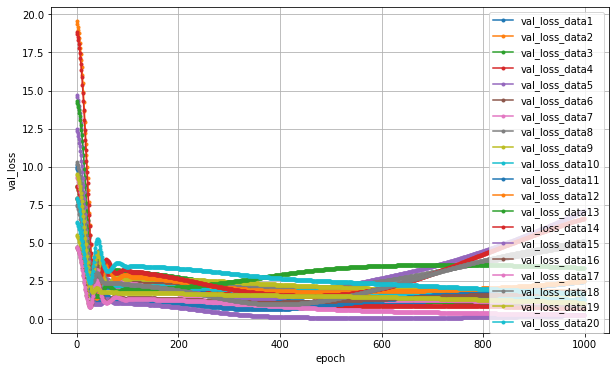

In [24]:
# 学習経過の可視化(大きさ)(validation)

val_loss_array = []
for i in range(len(history_size_array)):
    val_loss_array.append(history_size_array[i].history['val_loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(val_loss_array[i])
for i in range(len(val_loss_array)):
    plt.plot(range(nb_epoch), val_loss_array[i], marker='.', label='val_loss_data%d'%((i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.show()

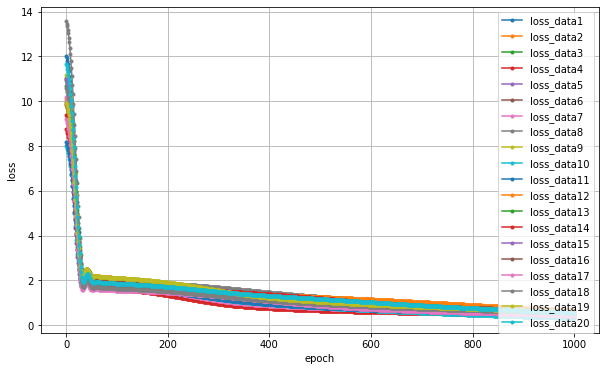

In [25]:
# 学習経過の可視化(大きさ)(train)

loss_array = []
for i in range(len(history_size_array)):
    loss_array.append(history_size_array[i].history['loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(loss_array[i])
for i in range(len(loss_array)):
    plt.plot(range(nb_epoch), loss_array[i], marker='.', label='loss_data%d'%((i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [26]:
min_val_loss_array = []
for i in range(len(val_loss_array)):
    min_val_loss_array.append(min(val_loss_array[i]))

In [27]:
print(min_val_loss_array)

[1.0781192779541016, 1.817509651184082, 0.6889952421188354, 0.6905659437179565, 1.355747103691101, 0.9215861558914185, 0.8249608278274536, 1.7900623083114624, 1.5755871534347534, 1.240764856338501, 0.6301314234733582, 1.3554706573486328, 1.4888522624969482, 1.528399109840393, 0.06839275360107422, 0.7830208539962769, 0.28171101212501526, 0.9535098075866699, 1.069067358970642, 1.6658904552459717]


In [28]:
min_loss_array = []
for i in range(len(loss_array)):
    min_loss_array.append(min(loss_array[i]))

In [29]:
print(min_loss_array)

[0.6032206416130066, 0.6005638241767883, 0.5167773962020874, 0.41867074370384216, 0.6642414331436157, 0.6014885902404785, 0.388962060213089, 0.6287843585014343, 0.6117545366287231, 0.31884530186653137, 0.4390263557434082, 0.6599685549736023, 0.5501179099082947, 0.4826396405696869, 0.41463202238082886, 0.6205753087997437, 0.4417741894721985, 0.5586273074150085, 0.5777664184570312, 0.544512152671814]


In [30]:
# 平均と標準偏差
import statistics
import math
average = statistics.mean(min_val_loss_array)
stdev = statistics.pstdev(min_val_loss_array)

In [31]:
print(average)
print(stdev)

1.0904172107577323
0.4765920641706691
